In [1]:
import sys
import os
from timeit import default_timer as timer
import torch
from transformers import RobertaTokenizer, RobertaModel, RobertaForMaskedLM, RobertaConfig
import matplotlib.pyplot as plt
# % matplotlib inline
from scipy.spatial.distance import cosine

In [2]:
# Make sure we're in the transformers directory with fine-tuned model output.
os.chdir('/home/jupyter/Notebooks/crystal/NLP/transformers/examples/')
os.getcwd()

'/home/jupyter/Notebooks/crystal/NLP/transformers/examples'

In [3]:
# Adapted from the tutorial at https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/
# and Transformers documentation: https://huggingface.co/transformers/model_doc/roberta.html#robertaformaskedlm

In [ ]:
################################### BEGIN TESTING #####################################################

In [3]:
vocab_file = '/home/jupyter/Notebooks/crystal/NLP/MiFace/Python/data/vocab_files/vocab_checked.txt'
vocab = make_vocab(vocab_file)
print(vocab[:10])
print(len(vocab))

NameError: name 'make_vocab' is not defined

In [10]:
tokenizer = RobertaTokenizer.from_pretrained('./output_synonyms_lg2/')
config = RobertaConfig.from_pretrained('./output_synonyms_lg2/')
model = RobertaForMaskedLM.from_pretrained('./output_synonyms_lg2/', config=config)
# Outputting hidden states allows direct access to hidden layers of the model.
# Outputting hidden states must be set to "true" in the config file during fine-tuning.
# config.output_hidden_states = True
model.eval()

RobertaForMaskedLM(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((

In [30]:
# Define a new example sentence with multiple contexts for the word "abhorred"
test_text = "She made an abhorred expression as he began making excuses. He wanted to keep playing, but abhorred the poor sportsmanship of his fellows."

# Split the sentence into tokens.
tokenized_test_text = tokenizer.encode(test_text, add_special_tokens=True)

# Display the words with their indeces.
for t in tokenized_test_text[1:-1]:
        print('{:<12} {:>6,}'.format(tokenizer.decode(t).strip(), t))
        
print(tokenizer.decode(tokenized_test_text))

She             264
made            156
an               41
abhor        35,350
red           2,050
expression    8,151
as               25
he               37
began           880
making          442
excuses      19,791
.                 4
He               91
wanted          770
to                7
keep            489
playing         816
,                 6
but              53
abhor        35,350
red           2,050
the               5
poor          2,129
sports        1,612
manship      17,187
of                9
his              39
fellows      36,304
.                 4
<s> She made an abhorred expression as he began making excuses. He wanted to keep playing, but abhorred the poor sportsmanship of his fellows.</s>


In [26]:
# tokens_tensor = torch.tensor([tokenized_test_text])

In [33]:
input_ids = torch.tensor(tokenized_test_text).unsqueeze(0)  # Batch size 1
with torch.no_grad():
    outputs = model(input_ids, masked_lm_labels=input_ids)
    # Documentation for the "forward" method of RobertaForMaskedLM
    # details what is returned for each index of "outputs."
    print(len(outputs))
    print(outputs[0])  # masked_lm_loss
    print(outputs[1])  # prediction_scores
    print(outputs[2])  # hidden_states

3
tensor(1.7705)
tensor([[[ 7.5622, -6.5695,  7.1052,  ..., -0.4609, -0.3673,  2.0783],
         [ 0.1524, -6.5327,  0.7621,  ..., -4.3035, -2.9045,  0.0805],
         [-3.1635, -4.4289,  5.9348,  ...,  0.1579, -0.5408, -0.8563],
         ...,
         [ 0.4510, -4.8339,  0.3958,  ..., -0.3920, -3.4539, -2.0414],
         [ 3.5524, -6.6096,  7.0987,  ..., -1.0119, -0.9505,  0.7903],
         [ 9.0676, -5.9170,  7.8096,  ..., -0.8526, -2.6835,  3.2866]]])
(tensor([[[ 1.8019e-01, -1.1417e-04, -6.6993e-03,  ..., -1.6295e-01,
           1.0452e-01,  5.8282e-02],
         [-1.0831e-01, -6.4354e-02,  1.7192e-01,  ...,  3.5061e-03,
           1.8987e-01,  2.1542e-01],
         [-1.2822e-01, -2.1817e-01,  6.4316e-01,  ..., -4.8211e-02,
          -6.1839e-01,  3.5666e-02],
         ...,
         [-9.0066e-03, -5.7980e-01,  2.9104e-01,  ..., -2.0536e-01,
          -1.5077e-01,  4.3876e-01],
         [ 2.1391e-01,  2.3605e-01,  2.8134e-01,  ..., -9.9283e-01,
           7.0846e-02, -2.6021e-02],
 

In [34]:
print ("Number of layers:", len(outputs[2]))
layer_i = 0

print ("Number of batches:", len(outputs[2][layer_i]))
batch_i = 0

print ("Number of tokens:", len(outputs[2][layer_i][batch_i]))
token_i = 0

print ("Number of hidden units:", len(outputs[2][layer_i][batch_i][token_i]))

Number of layers: 13
Number of batches: 1
Number of tokens: 31
Number of hidden units: 768


In [86]:
encoded_layers = outputs[2]

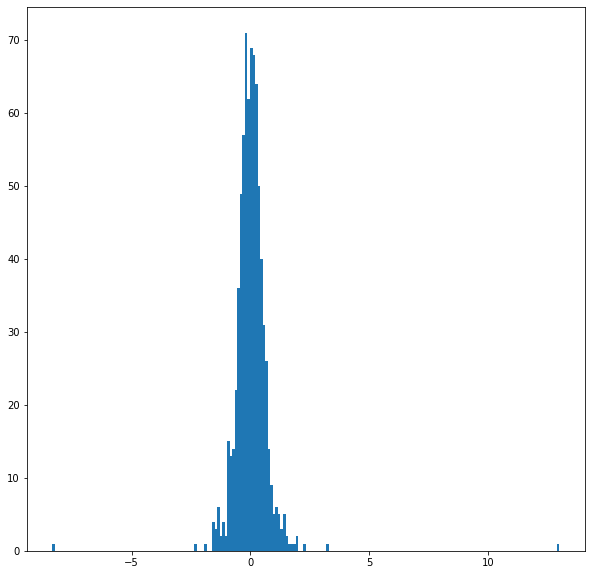

In [91]:
# For our token, select its feature values from layer 5.
token_i = 4
layer_i = 5
vec = encoded_layers[layer_i][batch_i][token_i]
# print(vec)

# Plot the values as a histogram to show their distribution.
plt.figure(figsize=(10,10))
plt.hist(vec, bins=200)
plt.show()

In [74]:
# `encoded_layers` is a tuple.
print('     Type of encoded_layers: ', type(list(encoded_layers)))

# Each layer in the list is a torch tensor.
print('Tensor shape for each layer: ', encoded_layers[0].size())

     Type of encoded_layers:  <class 'list'>
Tensor shape for each layer:  torch.Size([1, 32, 768])


In [75]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(encoded_layers, dim=0)

token_embeddings.size()

torch.Size([13, 1, 32, 768])

In [76]:
# Remove dimension 1, the "batches".
token_embeddings = torch.squeeze(token_embeddings, dim=1)

token_embeddings.size()

torch.Size([13, 32, 768])

In [94]:
# Swap dimensions 0 and 1.
token_embeddings = token_embeddings.permute(1,0,2)

token_embeddings.size()

torch.Size([32, 13, 768])

In [103]:
for i, token_str in enumerate(tokenized_test_text):
      if tokenizer.decode(token_str).strip() == "disgusted":
        print (i, tokenizer.decode(token_str))

4  disgusted
21  disgusted


In [97]:
# Create token vectors by summing the last 4 layers of the model.
# Stores the token vectors, with shape [32 x 768]
token_vecs_sum = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Sum the vectors from the last four layers.
    sum_vec = torch.sum(token[-4:], dim=0)
    
    # Use `sum_vec` to represent `token`.
    token_vecs_sum.append(sum_vec)

print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [99]:
# Extract the last layer's features
token_vecs_last = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Extract the vector from the last layer.
    last_vec = token[-1]
    
    # Use `sum_vec` to represent `token`.
    token_vecs_last.append(last_vec)

print ('Shape is: %d x %d' % (len(token_vecs_last), len(token_vecs_last[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [109]:
# Extract the embedding layer's features (layer 0 is the embedding layer)
token_vecs_embed = []
# `token_embeddings` is a [32 x 12 x 768] tensor.

# For each token in the sentence...
for token in token_embeddings:
    # `token` is a [13 x 768] tensor
    # Extract the vector from the last layer.
    embed_vec = token[0]
    
    # Use `sum_vec` to represent `token`.
    token_vecs_embed.append(last_vec)

print ('Shape is: %d x %d' % (len(token_vecs_embed), len(token_vecs_embed[0])))
# Shape is: 32 x 768

Shape is: 32 x 768


In [129]:
indices = []
for i, token_str in enumerate(tokenized_test_text):
      if tokenizer.decode(token_str).strip() == "disgusted":
        indices.append(i)
print(indices)

[4, 21]


In [130]:
token_vecs_sum_last_four = sum_last_four_token_vecs(token_embeddings)
for i in range(len(indices)):
    print(f'disgusted at index {indices[i]}: {str(token_vecs_sum_last_four[indices[i]][:5])}')

Shape is: 32 x 768
disgusted at index 4: tensor([-0.7637, -1.0375, -0.4840, -0.2251, -0.1792])
disgusted at index 21: tensor([-0.8459, -0.2973, -0.3336, -0.6372, -0.7399])


In [224]:
for i, v in enumerate(vocab):
    print(i, v)

0 open
1 openness
2 opposed
3 oppositional
4 oppressed
5 optimism
6 optimistic
7 ordering
8 orgasmic
9 ornery
10 ouch
11 out
12 outburst
13 outcry
14 outed
15 outlandish
16 outrage
17 outraged
18 outspoken
19 overbearing
20 overexcited
21 overjoyed
22 overshadowed
23 overstrung
24 overwhelmed
25 overworked
26 overwrought
27 pain
28 pained
29 painful
30 painfully
31 panic
32 panicked
33 panicky
34 paralyzed
35 paranoid
36 passionate
37 passive
38 patience
39 patient
40 patronizing
41 pause
42 pausing
43 peaceful
44 peculiar
45 peering
46 peeved
47 peevish
48 pensive
49 peppy
50 perceptive
51 perfidious
52 perky
53 perplexed
54 perplexing
55 persistent
56 personable
57 perturbed
58 perverse
59 pesky
60 pessimism
61 pessimistic
62 pestered
63 petitioning
64 petrified
65 petty
66 petulant
67 picked
68 piercing
69 pinched
70 pious
71 piqued
72 pissed
73 pitiable
74 pitiful
75 pity
76 pitying
77 placated
78 placation
79 placid
80 plain
81 plaintive
82 planning
83 playful
84 playfully
85 plea

In [229]:
v_indices = (102, 145, 309, 316, 410, 698)

start = 12
sections = []
for end in v_indices:
    for i in range(start, end):
#         print(i)
        sections.append(vocab[i])
        start = end + 1
for i in range(start, len(vocab)):
    sections.append(vocab[i])
#     print(i)

for i, v in enumerate(sections):
    print(i, v)

0 outburst
1 outcry
2 outed
3 outlandish
4 outrage
5 outraged
6 outspoken
7 overbearing
8 overexcited
9 overjoyed
10 overshadowed
11 overstrung
12 overwhelmed
13 overworked
14 overwrought
15 pain
16 pained
17 painful
18 painfully
19 panic
20 panicked
21 panicky
22 paralyzed
23 paranoid
24 passionate
25 passive
26 patience
27 patient
28 patronizing
29 pause
30 pausing
31 peaceful
32 peculiar
33 peering
34 peeved
35 peevish
36 pensive
37 peppy
38 perceptive
39 perfidious
40 perky
41 perplexed
42 perplexing
43 persistent
44 personable
45 perturbed
46 perverse
47 pesky
48 pessimism
49 pessimistic
50 pestered
51 petitioning
52 petrified
53 petty
54 petulant
55 picked
56 piercing
57 pinched
58 pious
59 piqued
60 pissed
61 pitiable
62 pitiful
63 pity
64 pitying
65 placated
66 placation
67 placid
68 plain
69 plaintive
70 planning
71 playful
72 playfully
73 pleading
74 pleasant
75 pleased
76 pleasing
77 pleasurable
78 pleasure
79 pleasured
80 pliant
81 plotting
82 poignant
83 pointed
84 poised


In [230]:
vocab = sections

In [111]:
# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the last layer of the model.
diff_disgusted_last = 1 - cosine(token_vecs_last[4], token_vecs_last[21])

# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the embed layer of the model.
diff_disgusted_embed = 1 - cosine(token_vecs_embed[4], token_vecs_embed[21])

# Calculate the cosine similarity between the word disgusted 
# in "disgusted expression" vs "too disgusted" (different contexts)
# using the sum of the last 4 layers of the model.
diff_disgusted_sum = 1 - cosine(token_vecs_sum_last_four[4], token_vecs_sum_last_four[21])

print('Vector similarity at the last layer:  %.2f' % diff_disgusted_last)
print('Vector similarity at the embed layer:  %.2f' % diff_disgusted_embed)
print('Vector similarity at the embed layer:  %.2f' % diff_disgusted_sum)

Vector similarity at the last layer:  0.91
Vector similarity at the embed layer:  1.00
Vector similarity at the embed layer:  0.89


In [ ]:
############################ END TESTING ##############################################################################

In [10]:
############################ START PRODUCTION: GET CONTEXTUAL EMBEDDINGS ##############################################

In [8]:
tokenizer = RobertaTokenizer.from_pretrained('./output_CC-ab/')
config = RobertaConfig.from_pretrained('./output_CC-ab/')
model = RobertaForMaskedLM.from_pretrained('./output_CC-ab/', config=config)
# Outputting hidden states allows direct access to hidden layers of the model.
# Outputting hidden states must be set to "true" in the config file during fine-tuning.
# config.output_hidden_states = True
model.eval()

context_file = "/home/jupyter/Notebooks/crystal/NLP/transformers/examples/CC_WET_test_ab"
output_file = '/home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/roberta_lastfour_CC_ab_testvocab.txt'
count_file = '/home/jupyter/Notebooks/crystal/NLP/nlp_testing/embeddings_context_vocab/roberta_lastfour_CC_ab_testvocab_counts.txt'
# vocab_file = '/home/jupyter/Notebooks/crystal/NLP/MiFace/Python/data/vocab_files/vocab_checked.txt'
# vocab = make_vocab(vocab_file)
vocab = ["car", "fluent", "donut", "triangular", "jumping", "forever"]

FEATURE_COUNT = 768

In [9]:
# Process vocabulary words in the outer loop.
for v in vocab:
    start = timer()
    with open(context_file, 'r') as lines:
        v_sum = torch.zeros([1, FEATURE_COUNT])
        v_tokens = tokenizer.encode(v)
        print(f'\nThere are {len(v_tokens) - 2} tokens in tokenized vocabulary word:')
        for t in v_tokens[1:-1]:
            print(tokenizer.decode(t).strip())
        count_sentence = 0
        count_tensor = 0
        
        # Process all lines in the context file in the inner loop.
        for line in lines:
            # Check for this vocab word in this line; if found, split the line into individual sentences.
            if v in line.lower().split():
                for sentence in line.split('.'):
                    if v in sentence.lower():
                        line = sentence
                        count_sentence += 1
                        print(f'\nInstance {count_sentence} of {tokenizer.decode(v_tokens[1:-1]).strip()}.')
                        break
                # Split the new sentence-based line into tokens.
                # Use max_length to avoid overflowing the maximum sequence length for the model.
                tokenized_text = tokenizer.encode(line, add_special_tokens=True, max_length=512)
#                 print(f'The decoded sentence has {len(tokenized_text)} tokens and is: {tokenizer.decode(tokenized_text)}')
                indices = []              

                # Check to see whether the vocab word is found in this particular line.
                # Initially, some lines may have comprised multiple sentences, which were
                # broken out individually above.
                for t in v_tokens[1:-1]:
                    print(f'Looking for vocab token: {tokenizer.decode(t).strip()}')
                    for i, token_str in enumerate(tokenized_text):
#                         print(f'Next sentence token: {tokenizer.decode(token_str).strip()}')
#                         print(tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip())
                        if tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip():
                            indices.append(i)               

                ###################################################################################
                # If the vocabulary word was found, process the containing line.
                if indices:

                    # The vocab word was found in this line/sentence, at the locations in indices.
                    print(f'Indices are {indices}')
                    # Get the feature vectors for all tokens in the line/sentence.
                    token_embeddings = create_token_embeddings(tokenized_text)
                    # Sum the last four layers to get embeddings for the line/sentence.
#                         for t in v_tokens[1:-1]:
#                             for i, token_str in enumerate(tokenized_text):
#                                 if (tokenizer.decode(token_str).strip() == tokenizer.decode(t).strip()):
#                                     print(f'{tokenizer.decode(token_str).strip()} is index {i} in the sentence and {token_str} in the vocabulary.')
                    token_vecs_layer = sum_last_four_token_vecs(token_embeddings)

                    # Get the vocab word's contextual embedding for this line.
                    tensor_layer = torch.zeros([1, FEATURE_COUNT])
                    for i in range(len(indices)):
                        v_index = i % len(v_tokens[1:-1])
                        print(f'{tokenizer.decode(v_tokens[v_index + 1]).strip()} at index {indices[i]}: {token_vecs_layer[indices[i]][:5].tolist()}')
                        tensor_layer += token_vecs_layer[indices[i]]
#                         print(f'Sum of tensors is: {tensor_layer[0][:5].tolist()} before taking the mean.')

                    # If our vocab word is broken into more than one token, we need to get the mean of the token embeddings.
                    tensor_layer /= len(indices)
#                     print(f'Sum of tensors is: {tensor_layer[0][:5].tolist()} after taking the mean.')

                    # Add the embedding distilled from this line to the sum of embeddings for all lines.
                    v_sum += tensor_layer
                    count_tensor += 1
                    print(f'Grand sum of {count_tensor} tensor sets is: {v_sum[0][:5].tolist()}')
                ###################################################################################
            # Stop processing lines once we've found 2000 instances of our vocab word.
            if count_tensor >= 2000:
                break
        
        # We're done processing all lines of 512 tokens or less containing our vocab word.
        # Get the mean embedding for the word.
        v_mean = v_sum / count_tensor
        print(f'Mean of tensors is: {v_mean[0][:5]} ({len(v_mean[0])} features in tensor)')
        write_embedding(output_file, v, v_mean)
        try:
            with open(count_file, 'a') as counts:
                counts.write(v + ', ' + str(count_tensor) + '\n')
            print(f'Saved the count of sentences used to create {v} embedding')
        except:
            print('Wha?! Could not write the sentence count.')
    end = timer()
    print(f'Run time for {v} was {end - start} seconds.')


There are 1 tokens in tokenized vocabulary word:
car

Instance 1 of car.
Looking for vocab token: car
Indices are [11]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 11: [-0.11239327490329742, 2.276723623275757, 0.23585066199302673, -0.7831698656082153, -0.4414422810077667]
Grand sum of 1 tensor sets is: [-0.11239327490329742, 2.276723623275757, 0.23585066199302673, -0.7831698656082153, -0.4414422810077667]

Instance 2 of car.
Looking for vocab token: car
Indices are [20]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 20: [0.2089410126209259, 1.297297716140747, -1.2435903549194336, -0.076203852891922, -0.047389835119247437]
Grand sum of 2 tensor sets is: [0.09654773771762848, 3.574021339416504, -1.0077396631240845, -0.8593736886978149, -0.48883211612701416]

Instance 3 of car.
Looking for vocab token: car
Indices are [17]
Size of token embeddings is torch.Size([27, 13, 768])

Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
car at index 16: [0.20254574716091156, 0.3577185273170471, 0.15442126989364624, -2.2251803874969482, -1.3704707622528076]
Grand sum of 22 tensor sets is: [4.563699245452881, 31.49938201904297, -2.5240039825439453, -10.559344291687012, -6.433213233947754]

Instance 27 of car.
Looking for vocab token: car
Indices are [9]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 9: [-0.3140302896499634, 3.9240407943725586, 0.9464907646179199, -0.40138566493988037, -4.314627170562744]
Grand sum of 23 tensor sets is: [4.249669075012207, 35.423423767089844, -1.5775132179260254, -10.960729598999023, -10.747840881347656]

Instance 28 of car.
Looking for vocab token: car

Instance 29 of car.
Looking for vocab token: car

Instance 30 of car.
Looking for vocab token: car
Indices are [18, 36, 39]
Size of token embeddings is torch.Size([54, 13, 768])
Shape of summed

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
car at index 18: [-0.6860682964324951, 0.691684365272522, -0.47195255756378174, 3.4746522903442383, -1.68611478805542]
Grand sum of 43 tensor sets is: [16.2247257232666, 67.95027923583984, -7.336184024810791, -16.19417953491211, -22.023481369018555]

Instance 52 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
car at index 8: [0.35196545720100403, 2.9589993953704834, -0.40783417224884033, 0.894097626209259, -2.5660059452056885]
Grand sum of 44 tensor sets is: [16.576690673828125, 70.9092788696289, -7.744018077850342, -15.300082206726074, -24.589487075805664]

Instance 53 of car.
Looking for vocab token: car
Indices are [17, 23]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 17: [0.7382417917251587, 2.378593921661377, -1.007306694984436, -0.0274254567

Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
car at index 9: [0.036373063921928406, 2.2592785358428955, -0.7512549757957458, -2.8557443618774414, -0.8759498596191406]
Grand sum of 62 tensor sets is: [22.312633514404297, 102.68736267089844, -14.7905855178833, -16.954904556274414, -34.23951721191406]

Instance 75 of car.
Looking for vocab token: car
Indices are [6]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
car at index 6: [1.1078126430511475, 2.3231468200683594, -0.16220815479755402, -0.1313980221748352, -2.806844711303711]
Grand sum of 63 tensor sets is: [23.420446395874023, 105.01051330566406, -14.952794075012207, -17.086301803588867, -37.046363830566406]

Instance 76 of car.
Looking for vocab token: car

Instance 77 of car.
Looking for vocab token: car
Indices are [43]
Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
car at index 43: [-0.233662113547325

Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
car at index 24: [0.19029879570007324, 0.5861178040504456, -0.9271973967552185, 0.6874502897262573, 2.9167819023132324]
Grand sum of 81 tensor sets is: [32.9075927734375, 133.4571075439453, -18.136707305908203, -22.178834915161133, -33.773799896240234]

Instance 100 of car.
Looking for vocab token: car
Indices are [17, 20, 25, 30]
Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
car at index 17: [0.7242787480354309, 1.222398042678833, -0.19793209433555603, -1.2858877182006836, -2.2380378246307373]
car at index 20: [0.4404619336128235, 1.8278440237045288, 0.2716705799102783, -0.8880179524421692, -1.6394338607788086]
car at index 25: [0.02067974954843521, 1.470453143119812, 0.07614052295684814, -1.6293517351150513, -2.8649094104766846]
car at index 30: [0.08886465430259705, 1.290534257888794, 0.08438226580619812, -1.7489922046661377, -2.898124933242798]
Grand

Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
car at index 47: [0.5102503299713135, -0.18840710818767548, 0.9525222182273865, 1.0520069599151611, 0.1822492629289627]
Grand sum of 99 tensor sets is: [37.371803283691406, 158.06594848632812, -24.059938430786133, -32.94915008544922, -45.094703674316406]

Instance 121 of car.
Looking for vocab token: car
Indices are [5]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
car at index 5: [0.4409579038619995, 1.4016839265823364, -0.875424325466156, -2.3400635719299316, 0.38653138279914856]
Grand sum of 100 tensor sets is: [37.81275939941406, 159.46763610839844, -24.935361862182617, -35.289215087890625, -44.70817184448242]

Instance 122 of car.
Looking for vocab token: car
Indices are [12]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 12: [0.8344154357910156, 1.264846682548523, -0.6905739307403564, 0.591717

Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
car at index 31: [1.1906914710998535, 0.9529949426651001, -0.3479090929031372, -1.3917882442474365, -1.4549565315246582]
car at index 41: [-0.2535417079925537, 0.7503781914710999, 1.8482145071029663, -0.03764127939939499, 0.20022112131118774]
Grand sum of 118 tensor sets is: [46.6395263671875, 185.2960968017578, -27.217613220214844, -36.9832763671875, -55.260223388671875]

Instance 148 of car.
Looking for vocab token: car
Indices are [18]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
car at index 18: [-0.031218647956848145, 4.545552730560303, 0.10483325272798538, -1.922903060913086, -2.2534618377685547]
Grand sum of 119 tensor sets is: [46.608306884765625, 189.84164428710938, -27.11277961730957, -38.90618133544922, -57.51368713378906]

Instance 149 of car.
Looking for vocab token: car
Indices are [15]
Size of token embeddings is torch.Size([19, 13, 768])

Size of token embeddings is torch.Size([477, 13, 768])
Shape of summed layers is: 477 x 768
car at index 181: [0.6160955429077148, 0.7458405494689941, -0.36355793476104736, -1.132871150970459, 1.9463517665863037]
Grand sum of 138 tensor sets is: [57.06882858276367, 228.88165283203125, -32.54941940307617, -52.98660659790039, -66.60293579101562]

Instance 170 of car.
Looking for vocab token: car
Indices are [16]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
car at index 16: [0.95624840259552, 2.3375775814056396, -0.1807548999786377, -1.3380558490753174, -2.215815544128418]
Grand sum of 139 tensor sets is: [58.02507781982422, 231.21922302246094, -32.73017501831055, -54.32466125488281, -68.8187484741211]

Instance 171 of car.
Looking for vocab token: car
Indices are [56]
Size of token embeddings is torch.Size([70, 13, 768])
Shape of summed layers is: 70 x 768
car at index 56: [-0.3336373269557953, 2.3345236778259277, -1.0388747453689575, -1.55378

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
car at index 29: [1.375557541847229, 1.9839088916778564, 0.2842656373977661, -0.4154740273952484, -1.4022001028060913]
Grand sum of 158 tensor sets is: [63.5106315612793, 273.4649963378906, -33.988895416259766, -77.19688415527344, -91.56373596191406]

Instance 201 of car.
Looking for vocab token: car
Indices are [16]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
car at index 16: [-0.9107468128204346, 2.7630138397216797, 0.29974138736724854, -0.1552421599626541, -2.155397415161133]
Grand sum of 159 tensor sets is: [62.599884033203125, 276.2279968261719, -33.68915557861328, -77.35212707519531, -93.71913146972656]

Instance 202 of car.
Looking for vocab token: car
Indices are [182]
Size of token embeddings is torch.Size([241, 13, 768])
Shape of summed layers is: 241 x 768
car at index 182: [-0.010292544960975647, 3.8563098907470703, -0.18100973963737488, -1

Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
car at index 10: [0.8655958771705627, 1.569597601890564, -1.0724458694458008, 0.1356285959482193, 1.9962475299835205]
Grand sum of 178 tensor sets is: [71.98312377929688, 299.3990173339844, -39.46898651123047, -85.45792388916016, -87.90064239501953]

Instance 228 of car.
Looking for vocab token: car
Indices are [16]
Size of token embeddings is torch.Size([122, 13, 768])
Shape of summed layers is: 122 x 768
car at index 16: [-0.2016315758228302, 1.2222708463668823, -0.6591224074363708, -1.2548673152923584, 0.2008773535490036]
Grand sum of 179 tensor sets is: [71.781494140625, 300.62127685546875, -40.128108978271484, -86.7127914428711, -87.69976806640625]

Instance 229 of car.
Looking for vocab token: car
Indices are [27]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
car at index 27: [1.6140352487564087, 2.2673165798187256, -0.23487745225429535, -1.3970918

Size of token embeddings is torch.Size([58, 13, 768])
Shape of summed layers is: 58 x 768
car at index 35: [0.7926640510559082, 1.5923269987106323, -0.07397492974996567, -1.133849859237671, -3.5022013187408447]
Grand sum of 198 tensor sets is: [80.33013153076172, 328.2865295410156, -42.62887191772461, -98.421142578125, -96.53976440429688]

Instance 252 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
car at index 8: [-0.5315588116645813, 1.275542974472046, -0.40824317932128906, -0.5729978084564209, -1.4242758750915527]
Grand sum of 199 tensor sets is: [79.79857635498047, 329.56207275390625, -43.03711700439453, -98.994140625, -97.96404266357422]

Instance 253 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 8: [0.8916155099868774, 2.0862231254577637, -0.2866131067276001, -0.034406170248985

Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
car at index 4: [0.31239256262779236, 2.0490715503692627, -0.1573771983385086, -0.34427452087402344, -1.4335768222808838]
Grand sum of 217 tensor sets is: [88.2894287109375, 350.9112854003906, -49.331180572509766, -107.68315124511719, -94.38006591796875]

Instance 277 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
car at index 8: [1.3421818017959595, 1.9344258308410645, -0.8507840037345886, -2.473397731781006, 0.07962249219417572]
Grand sum of 218 tensor sets is: [89.63160705566406, 352.845703125, -50.18196487426758, -110.15654754638672, -94.30044555664062]

Instance 278 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 10: [2.117654800415039, 1.6763826608657837, -1.2342777252197266, -1.66552293300

Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
car at index 6: [0.6512176990509033, 1.5687395334243774, -0.7039967179298401, -1.5962258577346802, -1.0541187524795532]
Grand sum of 237 tensor sets is: [97.74329376220703, 384.661865234375, -59.15538024902344, -123.58319854736328, -108.3041000366211]

Instance 304 of car.
Looking for vocab token: car
Indices are [36]
Size of token embeddings is torch.Size([101, 13, 768])
Shape of summed layers is: 101 x 768
car at index 36: [-0.35194462537765503, 0.008183911442756653, 0.916136622428894, -1.6283725500106812, -1.881239414215088]
Grand sum of 238 tensor sets is: [97.39134979248047, 384.6700439453125, -58.23924255371094, -125.2115707397461, -110.18534088134766]

Instance 305 of car.
Looking for vocab token: car

Instance 306 of car.
Looking for vocab token: car
Indices are [4]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
car at index 4: [-0.143178462982177

Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
car at index 28: [1.0577956438064575, -0.8027135133743286, -0.49346429109573364, 0.6223074793815613, 0.03674500435590744]
Grand sum of 257 tensor sets is: [102.41661071777344, 422.6245422363281, -64.57642364501953, -126.6810531616211, -126.11600494384766]

Instance 328 of car.
Looking for vocab token: car
Indices are [29]
Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
car at index 29: [0.45255374908447266, 1.7113795280456543, 0.6195990443229675, -2.3364622592926025, -1.2957873344421387]
Grand sum of 258 tensor sets is: [102.8691635131836, 424.3359069824219, -63.956825256347656, -129.01751708984375, -127.41178894042969]

Instance 329 of car.
Looking for vocab token: car
Indices are [3]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
car at index 3: [0.19727209210395813, 1.6136974096298218, 0.3720413148403168, -0.95

Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
car at index 14: [0.2504769563674927, 2.348339557647705, -0.4740675091743469, -2.041555881500244, -0.12447374314069748]
Grand sum of 276 tensor sets is: [108.26566314697266, 454.7248840332031, -67.75364685058594, -142.15248107910156, -144.0501708984375]

Instance 359 of car.
Looking for vocab token: car
Indices are [5]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
car at index 5: [-0.3461233377456665, 4.587497234344482, -0.2787996232509613, 0.596646785736084, -0.3264232277870178]
Grand sum of 277 tensor sets is: [107.91954040527344, 459.3123779296875, -68.0324478149414, -141.5558319091797, -144.3765869140625]

Instance 360 of car.
Looking for vocab token: car
Indices are [28]
Size of token embeddings is torch.Size([63, 13, 768])
Shape of summed layers is: 63 x 768
car at index 28: [1.2071598768234253, 0.36139315366744995, -1.2531672716140747, -1.8531054258

Size of token embeddings is torch.Size([60, 13, 768])
Shape of summed layers is: 60 x 768
car at index 34: [1.1340982913970947, -0.9922190308570862, -0.8673510551452637, 2.0625600814819336, 1.311204195022583]
Grand sum of 297 tensor sets is: [113.1318130493164, 486.67840576171875, -77.48969268798828, -146.36346435546875, -153.6003875732422]

Instance 384 of car.
Looking for vocab token: car
Indices are [4]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 4: [-0.6838325262069702, 1.655768871307373, 0.044221460819244385, -1.0215929746627808, -0.937497079372406]
Grand sum of 298 tensor sets is: [112.44798278808594, 488.33416748046875, -77.44547271728516, -147.3850555419922, -154.5378875732422]

Instance 385 of car.
Looking for vocab token: car
Indices are [19]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 19: [0.49311715364456177, 1.144973635673523, -1.1675302982330322, -0.133601

Size of token embeddings is torch.Size([110, 13, 768])
Shape of summed layers is: 110 x 768
car at index 93: [0.1246965080499649, -1.391373634338379, -0.6454691886901855, 0.6377633213996887, 3.6895134449005127]
Grand sum of 317 tensor sets is: [124.55667877197266, 515.8889770507812, -86.0841293334961, -161.05252075195312, -153.5375213623047]

Instance 408 of car.
Looking for vocab token: car

Instance 409 of car.
Looking for vocab token: car

Instance 410 of car.
Looking for vocab token: car
Indices are [6]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
car at index 6: [0.4739779233932495, 1.7066333293914795, -1.0934429168701172, -0.0930216833949089, -0.17024904489517212]
Grand sum of 318 tensor sets is: [125.03065490722656, 517.5955810546875, -87.17757415771484, -161.14553833007812, -153.707763671875]

Instance 411 of car.
Looking for vocab token: car
Indices are [9]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers

Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
car at index 8: [0.26028314232826233, 0.6491790413856506, -0.6574479341506958, -0.810054361820221, -0.9034333825111389]
Grand sum of 339 tensor sets is: [135.83233642578125, 554.9295654296875, -95.14823150634766, -177.70851135253906, -165.643798828125]

Instance 435 of car.
Looking for vocab token: car
Indices are [5]
Size of token embeddings is torch.Size([8, 13, 768])
Shape of summed layers is: 8 x 768
car at index 5: [0.5070884823799133, 0.6364556550979614, -0.600834310054779, 0.9662835001945496, 0.27908235788345337]
Grand sum of 340 tensor sets is: [136.3394317626953, 555.5660400390625, -95.74906921386719, -176.7422332763672, -165.36471557617188]

Instance 436 of car.
Looking for vocab token: car
Indices are [10, 29, 34]
Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
car at index 10: [0.06379257142543793, 2.715104579925537, 0.1826101839542389, -2.0023

Size of token embeddings is torch.Size([77, 13, 768])
Shape of summed layers is: 77 x 768
car at index 30: [0.2855684459209442, 0.744084894657135, -0.9314594268798828, 1.1044799089431763, 0.3495582342147827]
Grand sum of 358 tensor sets is: [141.0605010986328, 578.9118041992188, -103.7183609008789, -175.21026611328125, -168.86972045898438]

Instance 457 of car.
Looking for vocab token: car
Indices are [4]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
car at index 4: [0.9677586555480957, 2.2568700313568115, -0.5572208166122437, -0.9860966205596924, -0.3638218939304352]
Grand sum of 359 tensor sets is: [142.02825927734375, 581.168701171875, -104.27558135986328, -176.1963653564453, -169.23353576660156]

Instance 458 of car.
Looking for vocab token: car
Indices are [28]
Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 28: [0.26821786165237427, 1.0432816743850708, -0.21907195448875427, -1.25410

Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
car at index 39: [0.18504676222801208, 2.2615065574645996, -0.9813490509986877, -0.7828158140182495, -0.7942208647727966]
Grand sum of 377 tensor sets is: [147.2512664794922, 613.8599243164062, -109.19523620605469, -181.92933654785156, -180.1177978515625]

Instance 485 of car.
Looking for vocab token: car

Instance 486 of car.
Looking for vocab token: car
Indices are [23]
Size of token embeddings is torch.Size([88, 13, 768])
Shape of summed layers is: 88 x 768
car at index 23: [0.48948949575424194, 0.9472306966781616, -1.006411075592041, -0.13037174940109253, 2.240997314453125]
Grand sum of 378 tensor sets is: [147.74075317382812, 614.80712890625, -110.20164489746094, -182.05970764160156, -177.87680053710938]

Instance 487 of car.
Looking for vocab token: car

Instance 488 of car.
Looking for vocab token: car

Instance 489 of car.
Looking for vocab token: car
Indices are [33]
Size of token embeddi

Shape of summed layers is: 29 x 768
car at index 9: [0.9632831811904907, 1.932384729385376, -0.17724575102329254, 0.4109402894973755, 1.4906935691833496]
car at index 15: [0.5347787141799927, 2.005988359451294, -0.11364760994911194, -0.20806507766246796, 1.259199619293213]
Grand sum of 397 tensor sets is: [152.3527069091797, 649.6785278320312, -114.40007019042969, -190.17181396484375, -197.43911743164062]

Instance 513 of car.
Looking for vocab token: car

Instance 514 of car.
Looking for vocab token: car
Indices are [11]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
car at index 11: [0.11484791338443756, 0.11328140646219254, -0.5895557403564453, -0.6117208003997803, 1.0949852466583252]
Grand sum of 398 tensor sets is: [152.46755981445312, 649.7918090820312, -114.9896240234375, -190.78353881835938, -196.34413146972656]

Instance 515 of car.
Looking for vocab token: car
Indices are [3, 17]
Size of token embeddings is torch.Size([47, 13, 768])


Size of token embeddings is torch.Size([62, 13, 768])
Shape of summed layers is: 62 x 768
car at index 13: [0.12920592725276947, 1.259018898010254, -0.27367350459098816, -1.4303935766220093, -1.0446326732635498]
Grand sum of 415 tensor sets is: [155.8391876220703, 670.5968017578125, -121.60792541503906, -213.1970977783203, -205.39122009277344]

Instance 537 of car.
Looking for vocab token: car
Indices are [14, 32]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
car at index 14: [-0.028741423040628433, 2.6669607162475586, -0.4537283182144165, -0.4470214247703552, -2.0245518684387207]
car at index 32: [-1.0330157279968262, 2.6409780979156494, 1.1550147533416748, -0.42903220653533936, -2.314284086227417]
Grand sum of 416 tensor sets is: [155.3083038330078, 673.2507934570312, -121.25727844238281, -213.6351318359375, -207.56063842773438]

Instance 538 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([19, 1

Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
car at index 29: [-0.05906020104885101, 3.3108887672424316, 0.9607949256896973, 1.2531485557556152, -1.4364572763442993]
Grand sum of 434 tensor sets is: [161.8780517578125, 695.2310180664062, -121.2373046875, -214.32101440429688, -202.99281311035156]

Instance 562 of car.
Looking for vocab token: car
Indices are [18]
Size of token embeddings is torch.Size([56, 13, 768])
Shape of summed layers is: 56 x 768
car at index 18: [0.5444456934928894, -0.37898167967796326, 0.7440263032913208, 2.4872515201568604, 0.9466641545295715]
Grand sum of 435 tensor sets is: [162.42250061035156, 694.85205078125, -120.49327850341797, -211.83375549316406, -202.046142578125]

Instance 563 of car.
Looking for vocab token: car
Indices are [3]
Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
car at index 3: [1.0338411331176758, 2.0618643760681152, -1.0974833965301514, -0.4071721434

Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 9: [0.8256231546401978, 1.5452812910079956, -1.3581942319869995, -0.7057311534881592, -1.415822982788086]
Grand sum of 454 tensor sets is: [175.5302734375, 735.5127563476562, -128.84376525878906, -216.9509735107422, -209.26258850097656]

Instance 586 of car.
Looking for vocab token: car

Instance 587 of car.
Looking for vocab token: car
Indices are [23]
Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
car at index 23: [1.4639137983322144, 1.3161334991455078, 0.10234138369560242, 1.0238252878189087, -1.214837908744812]
Grand sum of 455 tensor sets is: [176.9941864013672, 736.8289184570312, -128.74142456054688, -215.92715454101562, -210.47743225097656]

Instance 588 of car.
Looking for vocab token: car

Instance 589 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is

Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
car at index 14: [0.47925981879234314, 1.0221582651138306, -0.6787846088409424, -0.11922379583120346, -2.5155277252197266]
Grand sum of 474 tensor sets is: [184.91200256347656, 768.9373779296875, -133.20655822753906, -225.55331420898438, -219.67288208007812]

Instance 611 of car.
Looking for vocab token: car
Indices are [5]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
car at index 5: [-0.6512193083763123, 1.562031626701355, 0.09609468281269073, 1.343556523323059, -3.361367702484131]
Grand sum of 475 tensor sets is: [184.2607879638672, 770.4993896484375, -133.11045837402344, -224.2097625732422, -223.0342559814453]

Instance 612 of car.
Looking for vocab token: car

Instance 613 of car.
Looking for vocab token: car
Indices are [19]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
car at index 19: [0.208645105361938

Size of token embeddings is torch.Size([71, 13, 768])
Shape of summed layers is: 71 x 768
car at index 27: [-0.09060084819793701, 2.9299252033233643, -0.7520326375961304, -1.1667709350585938, -1.928722858428955]
Grand sum of 494 tensor sets is: [190.1097412109375, 805.5307006835938, -132.91590881347656, -230.9033203125, -229.96710205078125]

Instance 642 of car.
Looking for vocab token: car
Indices are [16, 28]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed layers is: 40 x 768
car at index 16: [0.24288912117481232, 1.6066820621490479, -0.3249158263206482, -1.3882222175598145, -1.2676911354064941]
car at index 28: [-0.3484705984592438, 2.3084545135498047, -0.1747998595237732, -0.44403839111328125, -2.2450900077819824]
Grand sum of 495 tensor sets is: [190.05694580078125, 807.48828125, -133.165771484375, -231.8194580078125, -231.72349548339844]

Instance 643 of car.
Looking for vocab token: car
Indices are [3, 18]
Size of token embeddings is torch.Size([45, 13, 768

Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
car at index 15: [0.26406288146972656, 1.4098763465881348, -0.22390681505203247, -1.6382091045379639, -1.9407070875167847]
car at index 31: [0.10873191803693771, 1.4211125373840332, -0.07013298571109772, -2.245872735977173, -0.8031834363937378]
Grand sum of 512 tensor sets is: [197.10171508789062, 837.1648559570312, -137.36170959472656, -244.78602600097656, -236.80746459960938]

Instance 669 of car.
Looking for vocab token: car
Indices are [29]
Size of token embeddings is torch.Size([55, 13, 768])
Shape of summed layers is: 55 x 768
car at index 29: [0.6044973134994507, 0.42732346057891846, -0.3366888761520386, 2.9751505851745605, 2.8035669326782227]
Grand sum of 513 tensor sets is: [197.70620727539062, 837.5921630859375, -137.69839477539062, -241.81088256835938, -234.00389099121094]

Instance 670 of car.
Looking for vocab token: car
Indices are [17]
Size of token embeddings is torch.Size([26, 13,

Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
car at index 3: [0.013328376226127148, 1.1377696990966797, -0.6229856014251709, -2.2075939178466797, 0.7457956075668335]
Grand sum of 531 tensor sets is: [206.32752990722656, 873.5094604492188, -144.47872924804688, -247.39999389648438, -246.5580596923828]

Instance 695 of car.
Looking for vocab token: car
Indices are [461]
Size of token embeddings is torch.Size([495, 13, 768])
Shape of summed layers is: 495 x 768
car at index 461: [1.2267630100250244, 0.6817327737808228, 1.4326261281967163, 1.692652702331543, -0.21697737276554108]
Grand sum of 532 tensor sets is: [207.55429077148438, 874.1912231445312, -143.0460968017578, -245.70733642578125, -246.77503967285156]

Instance 696 of car.
Looking for vocab token: car
Indices are [19]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
car at index 19: [0.693023145198822, 2.189836025238037, -0.7049984335899353, -0.

Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
car at index 6: [0.04515044391155243, 2.4475371837615967, -0.10422657430171967, 0.40515437722206116, -2.2934868335723877]
car at index 18: [1.1231262683868408, 2.428551435470581, 0.003045007586479187, 1.475013256072998, -3.262284278869629]
Grand sum of 552 tensor sets is: [211.91519165039062, 919.4727172851562, -145.2276611328125, -251.73077392578125, -274.8764343261719]

Instance 721 of car.
Looking for vocab token: car

Instance 722 of car.
Looking for vocab token: car

Instance 723 of car.
Looking for vocab token: car
Indices are [18]
Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
car at index 18: [0.5813166499137878, 1.4811255931854248, -0.566653311252594, -3.5653762817382812, -1.3518714904785156]
Grand sum of 553 tensor sets is: [212.4965057373047, 920.953857421875, -145.7943115234375, -255.296142578125, -276.2283020019531]

Instance 724 of car.
Look

Size of token embeddings is torch.Size([37, 13, 768])
Shape of summed layers is: 37 x 768
car at index 20: [0.5511884093284607, -0.9895195960998535, -0.5331336259841919, 2.2166926860809326, 3.699995517730713]
Grand sum of 571 tensor sets is: [217.17318725585938, 949.1295166015625, -149.2398223876953, -258.2628479003906, -282.4960021972656]

Instance 757 of car.
Looking for vocab token: car

Instance 758 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
car at index 13: [1.3109315633773804, 2.179347038269043, -0.5346620678901672, -0.07471401244401932, 1.2910770177841187]
Grand sum of 572 tensor sets is: [218.48411560058594, 951.308837890625, -149.7744903564453, -258.3375549316406, -281.2049255371094]

Instance 759 of car.
Looking for vocab token: car
Indices are [18]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 18: [-0.8229405879974365, 

Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
car at index 13: [0.389599084854126, 1.259628415107727, -0.27556583285331726, -0.3295323848724365, -0.10948444902896881]
Grand sum of 590 tensor sets is: [223.5464630126953, 975.4699096679688, -150.7829132080078, -253.41258239746094, -282.0130310058594]

Instance 784 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 7: [1.164119005203247, 3.1059114933013916, 0.006632208824157715, 0.19680702686309814, -2.0566813945770264]
Grand sum of 591 tensor sets is: [224.71058654785156, 978.5758056640625, -150.77627563476562, -253.2157745361328, -284.0697021484375]

Instance 785 of car.
Looking for vocab token: car

Instance 786 of car.
Looking for vocab token: car
Indices are [27]
Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
car at index 27: [0.0748453289270401

Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
car at index 6: [0.6954249143600464, 2.84995174407959, -1.2888883352279663, -0.999531626701355, 0.15807244181632996]
car at index 15: [0.7523280382156372, 3.2437963485717773, -0.772942304611206, -0.05275876820087433, -2.1808204650878906]
car at index 27: [1.2711628675460815, 4.035166263580322, -0.8013771772384644, -1.488896369934082, -2.0943026542663574]
car at index 38: [0.8968866467475891, 4.225948810577393, -1.2052953243255615, -1.055738091468811, 0.7644641995429993]
Grand sum of 609 tensor sets is: [233.26974487304688, 1009.1981201171875, -155.96292114257812, -260.5616149902344, -292.1614685058594]

Instance 816 of car.
Looking for vocab token: car
Indices are [26]
Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
car at index 26: [1.070615291595459, -0.6029699444770813, -0.7993477582931519, 1.622521162033081, 1.835673213005066]
Grand sum of 610 tensor s

Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 15: [-0.9194604158401489, 0.6618155241012573, -0.38445255160331726, 0.04982329532504082, -2.4462342262268066]
Grand sum of 629 tensor sets is: [243.418701171875, 1030.0748291015625, -158.93624877929688, -266.3541564941406, -295.1373291015625]

Instance 843 of car.
Looking for vocab token: car
Indices are [2]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
car at index 2: [0.5054959654808044, 1.3924981355667114, 0.44301319122314453, -1.3699108362197876, 0.6656923890113831]
Grand sum of 630 tensor sets is: [243.9241943359375, 1031.46728515625, -158.4932403564453, -267.72406005859375, -294.4716491699219]

Instance 844 of car.
Looking for vocab token: car

Instance 845 of car.
Looking for vocab token: car
Indices are [9]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
car at index 9: [0.6954032778739929, 3

Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
car at index 12: [0.2551746368408203, 2.2352635860443115, -0.7588742971420288, 1.7764467000961304, -0.3613584041595459]
Grand sum of 646 tensor sets is: [249.1857147216797, 1057.057373046875, -162.6867218017578, -274.6918640136719, -300.8417053222656]

Instance 866 of car.
Looking for vocab token: car

Instance 867 of car.
Looking for vocab token: car
Indices are [29]
Size of token embeddings is torch.Size([71, 13, 768])
Shape of summed layers is: 71 x 768
car at index 29: [0.5877522230148315, 0.40183666348457336, -1.035367727279663, 0.34483617544174194, 2.892930030822754]
Grand sum of 647 tensor sets is: [249.77346801757812, 1057.459228515625, -163.7220916748047, -274.3470153808594, -297.9487609863281]

Instance 868 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([62, 13, 768])
Shape of summed layers is: 62 x 768
car at index 8: [0.475509375333786, 1.98

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
car at index 131: [0.23582568764686584, 1.6909043788909912, -0.25876644253730774, -1.1283290386199951, -0.12899576127529144]
Grand sum of 665 tensor sets is: [254.24456787109375, 1085.880126953125, -172.44830322265625, -288.0882263183594, -299.0412902832031]

Instance 891 of car.
Looking for vocab token: car
Indices are [17]
Size of token embeddings is torch.Size([74, 13, 768])
Shape of summed layers is: 74 x 768
car at index 17: [0.7825833559036255, -0.665968656539917, -0.02541375160217285, 0.9710811376571655, 1.5269471406936646]
Grand sum of 666 tensor sets is: [255.0271453857422, 1085.214111328125, -172.47372436523438, -287.1171569824219, -297.51434326171875]

Instance 892 of car.
Looking for vocab token: car
Indices are [18]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
car at index 18: [0.6018051505088806, 2.935736894607544, -0.9934250116348267, 0

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
car at index 38: [1.100177526473999, 3.248154401779175, -0.29698705673217773, -2.169959545135498, -0.46613895893096924]
Grand sum of 686 tensor sets is: [262.1112365722656, 1122.5675048828125, -181.23744201660156, -306.0854797363281, -309.935546875]

Instance 915 of car.
Looking for vocab token: car
Indices are [129, 136]
Size of token embeddings is torch.Size([397, 13, 768])
Shape of summed layers is: 397 x 768
car at index 129: [0.9031996726989746, 1.8111693859100342, 0.1260238140821457, 0.24954237043857574, -0.2954513728618622]
car at index 136: [0.8173167109489441, 1.4433810710906982, -0.6057784557342529, -0.87981116771698, 0.8632596135139465]
Grand sum of 687 tensor sets is: [262.97149658203125, 1124.19482421875, -181.47732543945312, -306.4006042480469, -309.6516418457031]

Instance 916 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([9, 13, 768])
S

Size of token embeddings is torch.Size([5, 13, 768])
Shape of summed layers is: 5 x 768
car at index 2: [-0.5565102696418762, 1.4755359888076782, -0.39782649278640747, 0.0991508886218071, 0.2940862774848938]
Grand sum of 705 tensor sets is: [268.8106384277344, 1163.2421875, -189.30018615722656, -310.8082275390625, -320.6589660644531]

Instance 939 of car.
Looking for vocab token: car
Indices are [16]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
car at index 16: [0.20999431610107422, 1.6573562622070312, -0.49977052211761475, -2.2879748344421387, -1.8302005529403687]
Grand sum of 706 tensor sets is: [269.0206298828125, 1164.8995361328125, -189.79995727539062, -313.09619140625, -322.4891662597656]

Instance 940 of car.
Looking for vocab token: car
Indices are [17]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 17: [1.0022732019424438, 1.4734182357788086, -0.06453973799943924, -0.7506327629

Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 14: [-0.2080678641796112, 2.3473644256591797, -0.6097249388694763, -0.10927148163318634, -2.3311243057250977]
Grand sum of 724 tensor sets is: [278.978759765625, 1190.6776123046875, -193.72076416015625, -319.1822204589844, -334.8069763183594]

Instance 968 of car.
Looking for vocab token: car
Indices are [318]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
car at index 318: [0.18047203123569489, 2.3846688270568848, -0.5309341549873352, -1.0608117580413818, 1.8781602382659912]
Grand sum of 725 tensor sets is: [279.15924072265625, 1193.062255859375, -194.25169372558594, -320.2430419921875, -332.9288024902344]

Instance 969 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([62, 13, 768])
Shape of summed layers is: 62 x 768
car at index 7: [0.8466371297836304, -1.0580922365188599, -0.047322750091552734,

Size of token embeddings is torch.Size([175, 13, 768])
Shape of summed layers is: 175 x 768
car at index 42: [0.05606823414564133, -0.4788869321346283, -0.7205262780189514, 1.090325117111206, 0.5285754203796387]
car at index 44: [-0.07784322649240494, 0.025381848216056824, 0.10027061402797699, -0.5371129512786865, -2.2005465030670166]
Grand sum of 744 tensor sets is: [287.870361328125, 1216.000244140625, -202.08291625976562, -318.22216796875, -329.6745910644531]

Instance 996 of car.
Looking for vocab token: car
Indices are [38]
Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
car at index 38: [0.5135715007781982, 1.0346862077713013, 0.8111996054649353, 0.25117868185043335, -1.350477933883667]
Grand sum of 745 tensor sets is: [288.3839416503906, 1217.034912109375, -201.27171325683594, -317.9709777832031, -331.0250549316406]

Instance 997 of car.
Looking for vocab token: car

Instance 998 of car.
Looking for vocab token: car
Indices are [19]
Size

Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
car at index 6: [0.6243773698806763, 1.3885111808776855, -0.48635926842689514, 0.04490445554256439, 0.3521992564201355]
Grand sum of 765 tensor sets is: [293.47418212890625, 1241.75244140625, -205.51544189453125, -334.4079895019531, -343.9509582519531]

Instance 1022 of car.
Looking for vocab token: car
Indices are [42]
Size of token embeddings is torch.Size([77, 13, 768])
Shape of summed layers is: 77 x 768
car at index 42: [1.4123419523239136, -1.4974327087402344, -0.5254272222518921, 1.5234460830688477, 2.6648051738739014]
Grand sum of 766 tensor sets is: [294.88653564453125, 1240.2550048828125, -206.04086303710938, -332.8845520019531, -341.2861633300781]

Instance 1023 of car.
Looking for vocab token: car

Instance 1024 of car.
Looking for vocab token: car
Indices are [15]
Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
car at index 15: [0.433863848447

Size of token embeddings is torch.Size([85, 13, 768])
Shape of summed layers is: 85 x 768
car at index 5: [0.7093641757965088, 1.6342977285385132, -0.3366720974445343, -1.059912919998169, -1.2560056447982788]
Grand sum of 784 tensor sets is: [300.5259704589844, 1269.5643310546875, -211.9647674560547, -332.4929504394531, -343.0625915527344]

Instance 1049 of car.
Looking for vocab token: car
Indices are [22]
Size of token embeddings is torch.Size([72, 13, 768])
Shape of summed layers is: 72 x 768
car at index 22: [0.3787365257740021, 3.0956180095672607, 0.19755396246910095, -1.8524229526519775, 0.6015352606773376]
Grand sum of 785 tensor sets is: [300.9046936035156, 1272.659912109375, -211.7672119140625, -334.3453674316406, -342.4610595703125]

Instance 1050 of car.
Looking for vocab token: car
Indices are [4]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 4: [0.5290701985359192, 2.738157272338867, -0.4710829555988312, -2.546147584

Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
car at index 4: [0.07368601858615875, 2.194857120513916, -0.7414173483848572, -1.7068345546722412, -0.9747359752655029]
Grand sum of 804 tensor sets is: [308.9870910644531, 1309.420654296875, -220.96775817871094, -344.0537414550781, -347.6438293457031]

Instance 1071 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
car at index 13: [1.0702153444290161, 1.6451973915100098, -0.8035396337509155, -1.4347954988479614, -0.9162076711654663]
Grand sum of 805 tensor sets is: [310.05731201171875, 1311.0657958984375, -221.77130126953125, -345.488525390625, -348.5600280761719]

Instance 1072 of car.
Looking for vocab token: car

Instance 1073 of car.
Looking for vocab token: car

Instance 1074 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed la

Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
car at index 4: [-0.09752657264471054, 0.5821897983551025, 0.0027724504470825195, 0.05264207720756531, 0.05677124857902527]
Grand sum of 823 tensor sets is: [315.0658264160156, 1340.0770263671875, -229.1803436279297, -352.89886474609375, -361.4237060546875]

Instance 1095 of car.
Looking for vocab token: car
Indices are [19]
Size of token embeddings is torch.Size([55, 13, 768])
Shape of summed layers is: 55 x 768
car at index 19: [0.31700387597084045, 2.753800868988037, 1.4164977073669434, -1.0118368864059448, -2.2430648803710938]
Grand sum of 824 tensor sets is: [315.3828430175781, 1342.830810546875, -227.7638397216797, -353.91070556640625, -363.6667785644531]

Instance 1096 of car.
Looking for vocab token: car

Instance 1097 of car.
Looking for vocab token: car

Instance 1098 of car.
Looking for vocab token: car
Indices are [40]
Size of token embeddings is torch.Size([62, 13, 768])
Shape of summ

Looking for vocab token: car

Instance 1123 of car.
Looking for vocab token: car
Indices are [17]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
car at index 17: [-0.404757022857666, 1.9926183223724365, -0.7610992789268494, -1.5280863046646118, -2.539263963699341]
Grand sum of 845 tensor sets is: [323.69573974609375, 1374.6104736328125, -236.36724853515625, -358.1441345214844, -363.2791748046875]

Instance 1124 of car.
Looking for vocab token: car
Indices are [30]
Size of token embeddings is torch.Size([72, 13, 768])
Shape of summed layers is: 72 x 768
car at index 30: [0.12682494521141052, 2.4403181076049805, 0.8881158828735352, -0.0076575614511966705, -2.0222833156585693]
Grand sum of 846 tensor sets is: [323.82257080078125, 1377.05078125, -235.4791259765625, -358.15179443359375, -365.30145263671875]

Instance 1125 of car.
Looking for vocab token: car

Instance 1126 of car.
Looking for vocab token: car
Indices are [2]
Size of token embedding

Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
car at index 14: [0.6310820579528809, 1.435206651687622, -0.55325847864151, -0.04243689030408859, -0.47183147072792053]
Grand sum of 867 tensor sets is: [335.837646484375, 1408.763671875, -241.6204833984375, -362.75042724609375, -369.7979736328125]

Instance 1151 of car.
Looking for vocab token: car
Indices are [44]
Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
car at index 44: [0.15537072718143463, 3.111154079437256, -1.0361799001693726, -0.11480734497308731, 0.11322516202926636]
Grand sum of 868 tensor sets is: [335.9930114746094, 1411.8748779296875, -242.6566619873047, -362.865234375, -369.68475341796875]

Instance 1152 of car.
Looking for vocab token: car
Indices are [11]
Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 11: [0.8200631141662598, 1.5581774711608887, -0.8402517437934875, 0.5598620176

Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
car at index 8: [0.9070099592208862, 0.43070781230926514, -0.023425675928592682, -1.1248202323913574, 0.4188031852245331]
Grand sum of 887 tensor sets is: [345.68402099609375, 1446.9969482421875, -247.86343383789062, -362.8155822753906, -381.33026123046875]

Instance 1175 of car.
Looking for vocab token: car
Indices are [65]
Size of token embeddings is torch.Size([121, 13, 768])
Shape of summed layers is: 121 x 768
car at index 65: [0.38430583477020264, -1.5665233135223389, 0.3341633975505829, 2.664991855621338, 1.9120317697525024]
Grand sum of 888 tensor sets is: [346.0683288574219, 1445.430419921875, -247.52926635742188, -360.1506042480469, -379.4182434082031]

Instance 1176 of car.
Looking for vocab token: car

Instance 1177 of car.
Looking for vocab token: car

Instance 1178 of car.
Looking for vocab token: car

Instance 1179 of car.
Looking for vocab token: car

Instance 1180 of car.
Looking 

Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
car at index 15: [0.4250984489917755, 2.1309335231781006, -0.10244004428386688, -2.0996878147125244, -0.05611182749271393]
Grand sum of 907 tensor sets is: [355.5101318359375, 1477.6844482421875, -252.7456512451172, -370.3305358886719, -380.378662109375]

Instance 1202 of car.
Looking for vocab token: car
Indices are [12]
Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 12: [0.848359227180481, 0.48604726791381836, -0.3300594389438629, -0.7471178770065308, 2.2588489055633545]
Grand sum of 908 tensor sets is: [356.3584899902344, 1478.1705322265625, -253.07571411132812, -371.0776672363281, -378.11981201171875]

Instance 1203 of car.
Looking for vocab token: car
Indices are [2]
Size of token embeddings is torch.Size([61, 13, 768])
Shape of summed layers is: 61 x 768
car at index 2: [0.11213020980358124, 1.2035027742385864, -1.1420414447784424, -2.3

Size of token embeddings is torch.Size([69, 13, 768])
Shape of summed layers is: 69 x 768
car at index 14: [0.8667258024215698, 2.440070390701294, -0.866095244884491, -1.9173023700714111, -0.7433925271034241]
car at index 35: [0.96771240234375, 3.096869945526123, -0.9534326791763306, -0.5397730469703674, -0.24831032752990723]
car at index 57: [0.5007349848747253, 2.3811779022216797, -1.9833295345306396, -0.7163136601448059, -0.31738489866256714]
Grand sum of 928 tensor sets is: [362.19110107421875, 1516.89794921875, -261.0630798339844, -377.696044921875, -388.5675354003906]

Instance 1228 of car.
Looking for vocab token: car

Instance 1229 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
car at index 7: [0.2417399287223816, 1.4599905014038086, -1.1284949779510498, -0.9666518568992615, 2.3006725311279297]
Grand sum of 929 tensor sets is: [362.4328308105469, 1518.35791015625, -262.19158935546875

Size of token embeddings is torch.Size([113, 13, 768])
Shape of summed layers is: 113 x 768
car at index 74: [0.2534654438495636, -1.4752908945083618, -0.6703392267227173, 1.896620273590088, 1.6126724481582642]
Grand sum of 946 tensor sets is: [371.292724609375, 1546.4742431640625, -269.55108642578125, -387.3212585449219, -390.0635681152344]

Instance 1256 of car.
Looking for vocab token: car

Instance 1257 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
car at index 10: [0.33926844596862793, -0.4132936894893646, 0.6150557994842529, 0.31619542837142944, -0.33855369687080383]
Grand sum of 947 tensor sets is: [371.6319885253906, 1546.0609130859375, -268.93603515625, -387.00506591796875, -390.4021301269531]

Instance 1258 of car.
Looking for vocab token: car

Instance 1259 of car.
Looking for vocab token: car

Instance 1260 of car.
Looking for vocab token: car

Instance 1261 of car.
Looking for

Size of token embeddings is torch.Size([274, 13, 768])
Shape of summed layers is: 274 x 768
car at index 80: [0.5025431513786316, -1.0273724794387817, -0.09257329255342484, -0.04367198795080185, 1.973146915435791]
car at index 94: [1.3985908031463623, -0.7751449346542358, 1.606404423713684, -1.0461769104003906, 0.5909720659255981]
Grand sum of 966 tensor sets is: [382.55169677734375, 1570.6981201171875, -278.9103088378906, -400.5867004394531, -397.1667175292969]

Instance 1288 of car.
Looking for vocab token: car
Indices are [4]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
car at index 4: [0.06975339353084564, 1.6700036525726318, -1.2648662328720093, 0.5316555500030518, -1.0308880805969238]
Grand sum of 967 tensor sets is: [382.6214599609375, 1572.3681640625, -280.1751708984375, -400.0550537109375, -398.1976013183594]

Instance 1289 of car.
Looking for vocab token: car
Indices are [2]
Size of token embeddings is torch.Size([13, 13, 768])
Shape

Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
car at index 6: [0.5329548716545105, 1.3844490051269531, -1.123403787612915, -1.6522526741027832, 1.1459019184112549]
car at index 26: [-0.5000650882720947, 2.840832471847534, 0.3368627429008484, -2.9779772758483887, -2.018280029296875]
Grand sum of 987 tensor sets is: [389.0833740234375, 1608.780517578125, -284.36370849609375, -411.8258361816406, -411.17535400390625]

Instance 1314 of car.
Looking for vocab token: car

Instance 1315 of car.
Looking for vocab token: car
Indices are [127]
Size of token embeddings is torch.Size([302, 13, 768])
Shape of summed layers is: 302 x 768
car at index 127: [0.035781241953372955, 0.8230722546577454, 0.03700625151395798, 0.5959447622299194, -2.459000587463379]
Grand sum of 988 tensor sets is: [389.119140625, 1609.6036376953125, -284.3266906738281, -411.2298889160156, -413.6343688964844]

Instance 1316 of car.
Looking for vocab token: car
Indices are [19]
Size 

Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 17: [0.8090295195579529, 3.061614513397217, 0.41918936371803284, -0.9864220023155212, -2.20747971534729]
Grand sum of 1006 tensor sets is: [397.84210205078125, 1635.654541015625, -288.1905517578125, -423.0570373535156, -420.23870849609375]

Instance 1340 of car.
Looking for vocab token: car
Indices are [49]
Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
car at index 49: [0.9499427080154419, 2.375368356704712, -0.7383880615234375, -1.7949724197387695, 1.4898103475570679]
Grand sum of 1007 tensor sets is: [398.79205322265625, 1638.0299072265625, -288.928955078125, -424.8520202636719, -418.7489013671875]

Instance 1341 of car.
Looking for vocab token: car
Indices are [81]
Size of token embeddings is torch.Size([86, 13, 768])
Shape of summed layers is: 86 x 768
car at index 81: [0.7483681440353394, 1.3843562602996826, -0.8579389452934265, -2.5240

Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 23: [0.38698744773864746, 1.363505244255066, -0.9206731915473938, -0.4651380479335785, -0.10253225266933441]
Grand sum of 1026 tensor sets is: [406.20355224609375, 1666.041748046875, -294.8478088378906, -431.5600280761719, -435.5081481933594]

Instance 1364 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
car at index 8: [0.08101996779441833, 2.3075382709503174, -0.48983171582221985, 0.3566422462463379, -1.4253809452056885]
Grand sum of 1027 tensor sets is: [406.2845764160156, 1668.3492431640625, -295.337646484375, -431.2033996582031, -436.93353271484375]

Instance 1365 of car.
Looking for vocab token: car
Indices are [90]
Size of token embeddings is torch.Size([115, 13, 768])
Shape of summed layers is: 115 x 768
car at index 90: [0.16143934428691864, 0.10513054579496384, -1.1478967666625977,

Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
car at index 5: [0.17165660858154297, 0.8535754680633545, 0.1754821538925171, -3.254220724105835, -0.570440411567688]
Grand sum of 1047 tensor sets is: [410.7981872558594, 1700.2215576171875, -302.949951171875, -447.3318786621094, -451.45391845703125]

Instance 1389 of car.
Looking for vocab token: car
Indices are [25]
Size of token embeddings is torch.Size([58, 13, 768])
Shape of summed layers is: 58 x 768
car at index 25: [0.940932035446167, 2.5493602752685547, -0.33026137948036194, -2.5766963958740234, -2.5944998264312744]
Grand sum of 1048 tensor sets is: [411.7391052246094, 1702.7708740234375, -303.28021240234375, -449.9085693359375, -454.0484313964844]

Instance 1390 of car.
Looking for vocab token: car
Indices are [9]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
car at index 9: [1.049821376800537, 3.1345512866973877, -0.43558356165885925, -1.3329

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
car at index 459: [-0.4652632772922516, 2.773749828338623, 1.3511382341384888, -0.04579386115074158, -0.5501638650894165]
Grand sum of 1065 tensor sets is: [414.1899108886719, 1738.6324462890625, -306.7606506347656, -457.6701354980469, -468.94366455078125]

Instance 1422 of car.
Looking for vocab token: car

Instance 1423 of car.
Looking for vocab token: car
Indices are [72]
Size of token embeddings is torch.Size([75, 13, 768])
Shape of summed layers is: 75 x 768
car at index 72: [0.33823543787002563, 0.626387357711792, -0.525968611240387, 1.22672438621521, 2.551112651824951]
Grand sum of 1066 tensor sets is: [414.52813720703125, 1739.2587890625, -307.28662109375, -456.44342041015625, -466.3925476074219]

Instance 1424 of car.
Looking for vocab token: car

Instance 1425 of car.
Looking for vocab token: car
Indices are [49]
Size of token embeddings is torch.Size([57, 13, 768])
Shape of summed lay

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
car at index 12: [0.3841753900051117, 1.6386327743530273, -0.14944973587989807, -1.0005924701690674, 0.5171059370040894]
Grand sum of 1085 tensor sets is: [422.7103271484375, 1767.701171875, -314.2100830078125, -467.2450866699219, -476.5264892578125]

Instance 1450 of car.
Looking for vocab token: car

Instance 1451 of car.
Looking for vocab token: car

Instance 1452 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
car at index 7: [0.1593928039073944, 2.0497043132781982, -0.5016520619392395, 1.537293791770935, -4.069248676300049]
Grand sum of 1086 tensor sets is: [422.8697204589844, 1769.7508544921875, -314.71173095703125, -465.7077941894531, -480.5957336425781]

Instance 1453 of car.
Looking for vocab token: car
Indices are [10, 29]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed 

Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
car at index 4: [0.20266585052013397, 1.817635178565979, -0.4191519021987915, -1.447068214416504, 0.03199945390224457]
Grand sum of 1105 tensor sets is: [431.11041259765625, 1789.8392333984375, -323.98736572265625, -466.7566833496094, -488.72802734375]

Instance 1478 of car.
Looking for vocab token: car
Indices are [36]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed layers is: 40 x 768
car at index 36: [0.383561372756958, 1.9685941934585571, 0.5448733568191528, -2.426558494567871, -1.1485029458999634]
Grand sum of 1106 tensor sets is: [431.4939880371094, 1791.807861328125, -323.4425048828125, -469.1832275390625, -489.87652587890625]

Instance 1479 of car.
Looking for vocab token: car
Indices are [46]
Size of token embeddings is torch.Size([138, 13, 768])
Shape of summed layers is: 138 x 768
car at index 46: [0.26758188009262085, 1.0013271570205688, 1.5575612783432007, -0.880

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
car at index 40: [0.4974491000175476, 1.464829921722412, -0.02411922812461853, -0.5746864080429077, -1.0142091512680054]
Grand sum of 1125 tensor sets is: [438.7398986816406, 1819.0926513671875, -334.35797119140625, -480.9920349121094, -507.4194641113281]

Instance 1504 of car.
Looking for vocab token: car
Indices are [28]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
car at index 28: [0.1436108648777008, 1.0054374933242798, -0.08675280213356018, -0.7029435634613037, -0.24037696421146393]
Grand sum of 1126 tensor sets is: [438.8835144042969, 1820.09814453125, -334.4447326660156, -481.6949768066406, -507.65985107421875]

Instance 1505 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 13: [0.6068465709686279, 1.9618035554885864, -0.057720016688108444,


Instance 1532 of car.
Looking for vocab token: car

Instance 1533 of car.
Looking for vocab token: car
Indices are [36, 46]
Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
car at index 36: [-0.19233198463916779, 1.9305931329727173, -0.8666231036186218, -1.0006709098815918, -1.8625242710113525]
car at index 46: [0.4320848286151886, 1.5076696872711182, -0.6097153425216675, -1.5789165496826172, -1.3051002025604248]
Grand sum of 1146 tensor sets is: [444.941162109375, 1856.2496337890625, -340.50189208984375, -497.5831604003906, -519.0401611328125]

Instance 1534 of car.
Looking for vocab token: car

Instance 1535 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
car at index 10: [-0.23423828184604645, 1.7951310873031616, -0.11515160650014877, 2.090881824493408, -3.6260859966278076]
Grand sum of 1147 tensor sets is: [444.7069091796875, 1858.0447998046875, 

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
car at index 13: [0.2504124045372009, 1.1240999698638916, -0.6211676001548767, -0.06268028169870377, -2.6511125564575195]
Grand sum of 1167 tensor sets is: [453.01202392578125, 1892.6112060546875, -349.297119140625, -510.06732177734375, -539.7570190429688]

Instance 1562 of car.
Looking for vocab token: car
Indices are [40]
Size of token embeddings is torch.Size([131, 13, 768])
Shape of summed layers is: 131 x 768
car at index 40: [2.0078952312469482, -1.8596456050872803, -0.8745448589324951, 0.27914926409721375, 1.3407132625579834]
Grand sum of 1168 tensor sets is: [455.0199279785156, 1890.7515869140625, -350.1716613769531, -509.7881774902344, -538.4163208007812]

Instance 1563 of car.
Looking for vocab token: car
Indices are [30]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 30: [0.12345433980226517, 1.9095232486724854, 0.5111628174781799,

Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
car at index 13: [0.411440372467041, 2.3337562084198, -0.36634209752082825, -1.5666674375534058, 3.0067787170410156]
Grand sum of 1187 tensor sets is: [460.51263427734375, 1924.543212890625, -353.9924011230469, -514.7306518554688, -526.8164672851562]

Instance 1587 of car.
Looking for vocab token: car

Instance 1588 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
car at index 10: [0.4448973536491394, 2.836730480194092, 0.5980661511421204, -1.0228602886199951, -2.4308385848999023]
Grand sum of 1188 tensor sets is: [460.95751953125, 1927.3798828125, -353.39434814453125, -515.7535400390625, -529.247314453125]

Instance 1589 of car.
Looking for vocab token: car

Instance 1590 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is:

Looking for vocab token: car

Instance 1612 of car.
Looking for vocab token: car
Indices are [37]
Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
car at index 37: [0.8388009071350098, 2.612922191619873, -1.2474427223205566, -2.1574041843414307, -0.49036920070648193]
Grand sum of 1207 tensor sets is: [470.8063659667969, 1947.723876953125, -355.4404602050781, -514.7786254882812, -538.0289916992188]

Instance 1613 of car.
Looking for vocab token: car
Indices are [22]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
car at index 22: [-0.1643073707818985, 0.6610088348388672, -0.4196251928806305, -1.4899158477783203, 0.352272629737854]
Grand sum of 1208 tensor sets is: [470.6420593261719, 1948.3848876953125, -355.8600769042969, -516.2685546875, -537.6766967773438]

Instance 1614 of car.
Looking for vocab token: car

Instance 1615 of car.
Looking for vocab token: car
Indices are [349]
Size of token embeddings i

Looking for vocab token: car

Instance 1640 of car.
Looking for vocab token: car

Instance 1641 of car.
Looking for vocab token: car
Indices are [19]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
car at index 19: [0.2880852222442627, 3.666043519973755, 0.49473467469215393, -0.35583359003067017, 0.29037296772003174]
Grand sum of 1227 tensor sets is: [477.53326416015625, 1976.615234375, -360.7218322753906, -525.68310546875, -536.8406372070312]

Instance 1642 of car.
Looking for vocab token: car

Instance 1643 of car.
Looking for vocab token: car
Indices are [33]
Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
car at index 33: [0.3325096368789673, 1.660369873046875, 0.8558371067047119, -0.8347465991973877, 1.527486801147461]
Grand sum of 1228 tensor sets is: [477.86578369140625, 1978.275634765625, -359.8659973144531, -526.517822265625, -535.3131713867188]

Instance 1644 of car.
Looking for vocab token: c

Looking for vocab token: car

Instance 1666 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 13: [-0.14639347791671753, 1.2056900262832642, 0.7493655681610107, 1.3969345092773438, -2.2804718017578125]
Grand sum of 1247 tensor sets is: [486.33673095703125, 1995.5284423828125, -368.6993408203125, -525.7278442382812, -534.6123046875]

Instance 1667 of car.
Looking for vocab token: car
Indices are [28]
Size of token embeddings is torch.Size([105, 13, 768])
Shape of summed layers is: 105 x 768
car at index 28: [2.3687167167663574, -1.1898947954177856, 0.9271491169929504, 0.4055589735507965, 0.7192715406417847]
Grand sum of 1248 tensor sets is: [488.7054443359375, 1994.3385009765625, -367.7721862792969, -525.322265625, -533.8930053710938]

Instance 1668 of car.
Looking for vocab token: car
Indices are [15]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is:

Size of token embeddings is torch.Size([67, 13, 768])
Shape of summed layers is: 67 x 768
car at index 10: [0.6206629276275635, 1.5356405973434448, -0.012764845043420792, -1.7647953033447266, -1.1937345266342163]
Grand sum of 1266 tensor sets is: [497.67755126953125, 2025.3018798828125, -376.4057922363281, -532.869140625, -551.1757202148438]

Instance 1689 of car.
Looking for vocab token: car
Indices are [6]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
car at index 6: [-0.3386300504207611, 2.8244903087615967, 0.13431505858898163, 0.03412340581417084, -1.3696280717849731]
Grand sum of 1267 tensor sets is: [497.33892822265625, 2028.1263427734375, -376.271484375, -532.8350219726562, -552.5453491210938]

Instance 1690 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 10: [2.117654800415039, 1.6763826608657837, -1.2342777252197266, -1.665522

Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
car at index 8: [0.10200188308954239, 1.841710090637207, 0.7030806541442871, -0.42346715927124023, -1.1145870685577393]
Grand sum of 1286 tensor sets is: [506.3269348144531, 2063.91650390625, -379.5127258300781, -540.2633056640625, -564.8239135742188]

Instance 1711 of car.
Looking for vocab token: car

Instance 1712 of car.
Looking for vocab token: car
Indices are [32]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
car at index 32: [0.6634145379066467, 0.7446624636650085, -0.477547824382782, -0.07870423048734665, -0.8047734498977661]
Grand sum of 1287 tensor sets is: [506.9903564453125, 2064.6611328125, -379.9902648925781, -540.3419799804688, -565.628662109375]

Instance 1713 of car.
Looking for vocab token: car

Instance 1714 of car.
Looking for vocab token: car
Indices are [15]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed lay

Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 8: [0.7193893790245056, 3.339106559753418, -0.41662999987602234, -1.5099234580993652, -1.5677615404129028]
car at index 14: [0.8644391298294067, 1.7849681377410889, -0.6053488254547119, -0.5757601261138916, -0.3247172236442566]
Grand sum of 1307 tensor sets is: [510.913818359375, 2101.700439453125, -385.40899658203125, -552.2671508789062, -582.001953125]

Instance 1740 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
car at index 7: [0.5359987020492554, 3.73435378074646, -0.8664228320121765, 1.3211289644241333, -3.7753124237060547]
Grand sum of 1308 tensor sets is: [511.4498291015625, 2105.434814453125, -386.2754211425781, -550.946044921875, -585.7772827148438]

Instance 1741 of car.
Looking for vocab token: car
Indices are [2, 27]
Size of token embeddings is torch.Size([32, 13, 768])
Shape o

Size of token embeddings is torch.Size([7, 13, 768])
Shape of summed layers is: 7 x 768
car at index 5: [0.34705686569213867, 0.8237831592559814, -0.9739100337028503, -1.201111078262329, 0.5348206758499146]
Grand sum of 1328 tensor sets is: [525.0355224609375, 2137.47216796875, -392.2381286621094, -561.9495849609375, -592.8589477539062]

Instance 1768 of car.
Looking for vocab token: car
Indices are [2, 8]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
car at index 2: [0.8706681728363037, 3.271397829055786, -0.5447748899459839, -1.063900351524353, -0.34072622656822205]
car at index 8: [0.21532118320465088, 3.343280076980591, 1.0236990451812744, -0.9845895767211914, -3.775111198425293]
Grand sum of 1329 tensor sets is: [525.5784912109375, 2140.779541015625, -391.9986572265625, -562.9738159179688, -594.9168701171875]

Instance 1769 of car.
Looking for vocab token: car
Indices are [21]
Size of token embeddings is torch.Size([32, 13, 768])
Shape o

Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
car at index 26: [1.0415836572647095, 2.015671968460083, -0.06174086779356003, -1.1496520042419434, -2.042900323867798]
Grand sum of 1349 tensor sets is: [532.8623046875, 2188.63037109375, -394.6884460449219, -567.8505859375, -601.1332397460938]

Instance 1794 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([54, 13, 768])
Shape of summed layers is: 54 x 768
car at index 10: [0.005714005790650845, 2.459869861602783, -0.7626628875732422, -1.5531013011932373, 2.296844482421875]
Grand sum of 1350 tensor sets is: [532.8680419921875, 2191.09033203125, -395.45111083984375, -569.4036865234375, -598.83642578125]

Instance 1795 of car.
Looking for vocab token: car
Indices are [11]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
car at index 11: [-0.809104859828949, 1.8444573879241943, 0.41723382472991943, -1.2228592634201

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
car at index 20: [0.29008227586746216, 1.9970579147338867, 0.16272954642772675, 0.9235777854919434, 1.501127004623413]
Grand sum of 1368 tensor sets is: [538.1234130859375, 2221.453369140625, -399.6429138183594, -577.8847045898438, -603.0217895507812]

Instance 1821 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
car at index 13: [0.913756251335144, 1.4556212425231934, -0.25893542170524597, -0.8000431656837463, -0.1768912374973297]
Grand sum of 1369 tensor sets is: [539.0371704101562, 2222.908935546875, -399.90185546875, -578.6847534179688, -603.1986694335938]

Instance 1822 of car.
Looking for vocab token: car

Instance 1823 of car.
Looking for vocab token: car
Indices are [9]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 9: [-0.5279299020767212,

Size of token embeddings is torch.Size([74, 13, 768])
Shape of summed layers is: 74 x 768
car at index 48: [0.19696711003780365, -0.4367152452468872, -1.6965967416763306, 1.2814249992370605, 2.090348482131958]
Grand sum of 1387 tensor sets is: [544.3768920898438, 2250.881591796875, -407.404541015625, -578.9595947265625, -624.0017700195312]

Instance 1848 of car.
Looking for vocab token: car
Indices are [19]
Size of token embeddings is torch.Size([58, 13, 768])
Shape of summed layers is: 58 x 768
car at index 19: [0.5624754428863525, 2.6260647773742676, -1.1239607334136963, -1.774344801902771, -0.16545741260051727]
Grand sum of 1388 tensor sets is: [544.9393920898438, 2253.507568359375, -408.52850341796875, -580.7339477539062, -624.167236328125]

Instance 1849 of car.
Looking for vocab token: car
Indices are [14]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 14: [0.3401907682418823, 2.171011447906494, -0.7774637937545776, -0.20795

Size of token embeddings is torch.Size([53, 13, 768])
Shape of summed layers is: 53 x 768
car at index 6: [1.109812617301941, 1.000185251235962, -1.1382689476013184, -0.4711992144584656, -1.019654631614685]
Grand sum of 1407 tensor sets is: [551.6193237304688, 2285.141357421875, -413.051513671875, -586.39501953125, -639.3732299804688]

Instance 1874 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
car at index 8: [0.6272561550140381, 2.4196128845214844, -0.9196394085884094, 0.3255048096179962, -0.5400972962379456]
Grand sum of 1408 tensor sets is: [552.24658203125, 2287.56103515625, -413.9711608886719, -586.0695190429688, -639.913330078125]

Instance 1875 of car.
Looking for vocab token: car
Indices are [17]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
car at index 17: [-0.16176417469978333, 0.7896863222122192, 1.1143985986709595, 2.3862202167510986

Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
car at index 31: [0.6407320499420166, 2.6260948181152344, -0.5516409873962402, -1.6144014596939087, -0.6937705874443054]
Grand sum of 1427 tensor sets is: [555.8876342773438, 2316.904296875, -412.4533996582031, -581.3675537109375, -658.0791015625]

Instance 1896 of car.
Looking for vocab token: car

Instance 1897 of car.
Looking for vocab token: car
Indices are [9]
Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
car at index 9: [0.8688203692436218, 1.986860752105713, 0.3887818455696106, -1.001659870147705, -1.34639310836792]
Grand sum of 1428 tensor sets is: [556.7564697265625, 2318.89111328125, -412.0646057128906, -582.3692016601562, -659.4254760742188]

Instance 1898 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
car at index 8: [-0.5132115483283997, 1.7653850

Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
car at index 20: [0.2316894829273224, 1.1776000261306763, -0.45897218585014343, 1.791783094406128, -0.31438973546028137]
Grand sum of 1448 tensor sets is: [557.977294921875, 2361.124755859375, -417.98651123046875, -592.4319458007812, -679.5746459960938]

Instance 1921 of car.
Looking for vocab token: car
Indices are [23]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 23: [0.308824360370636, 1.186735987663269, 0.041418664157390594, 0.2788686454296112, 0.09456801414489746]
Grand sum of 1449 tensor sets is: [558.2861328125, 2362.3115234375, -417.9450988769531, -592.153076171875, -679.4801025390625]

Instance 1922 of car.
Looking for vocab token: car
Indices are [3, 33]
Size of token embeddings is torch.Size([53, 13, 768])
Shape of summed layers is: 53 x 768
car at index 3: [0.3782065510749817, 2.2572765350341797, -0.1683565229177475, 0.379157930

Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
car at index 8: [0.5226955413818359, 2.177264451980591, 0.3205935060977936, -1.1147310733795166, -0.6414032578468323]
Grand sum of 1469 tensor sets is: [567.9436645507812, 2385.185791015625, -427.1349182128906, -602.5796508789062, -686.2435302734375]

Instance 1945 of car.
Looking for vocab token: car

Instance 1946 of car.
Looking for vocab token: car
Indices are [38]
Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
car at index 38: [0.8617132902145386, 2.225079298019409, 0.24254131317138672, -2.8120789527893066, -2.301851272583008]
Grand sum of 1470 tensor sets is: [568.8053588867188, 2387.410888671875, -426.8923645019531, -605.3917236328125, -688.54541015625]

Instance 1947 of car.
Looking for vocab token: car
Indices are [83]
Size of token embeddings is torch.Size([146, 13, 768])
Shape of summed layers is: 146 x 768
car at index 83: [0.7842099666595459,

Size of token embeddings is torch.Size([80, 13, 768])
Shape of summed layers is: 80 x 768
car at index 19: [0.3360101580619812, 0.9218423962593079, -1.7845200300216675, 0.030263729393482208, 2.8870041370391846]
car at index 70: [0.28961220383644104, 1.3288538455963135, -1.5914201736450195, 0.47924354672431946, 2.2458488941192627]
Grand sum of 1489 tensor sets is: [575.79638671875, 2411.81103515625, -433.6995544433594, -624.7296142578125, -681.4732055664062]

Instance 1970 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
car at index 7: [-9.971298277378082e-05, 1.6470420360565186, -1.1461912393569946, -1.835148811340332, -1.8937243223190308]
Grand sum of 1490 tensor sets is: [575.7962646484375, 2413.4580078125, -434.8457336425781, -626.5647583007812, -683.366943359375]

Instance 1971 of car.
Looking for vocab token: car
Indices are [18]
Size of token embeddings is torch.Size([36, 13, 768])
Shap

Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
car at index 7: [0.302795946598053, 1.6260290145874023, -0.9463202357292175, 0.011254459619522095, 1.834433913230896]
car at index 19: [-0.18377476930618286, 1.6436315774917603, -1.091164469718933, 0.4272432327270508, -1.9473673105239868]
Grand sum of 1511 tensor sets is: [579.721923828125, 2452.60888671875, -438.053955078125, -647.9619140625, -705.4242553710938]

Instance 1995 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
car at index 13: [0.16179008781909943, 1.5807340145111084, -0.6210787296295166, -0.9942111968994141, -1.464756965637207]
Grand sum of 1512 tensor sets is: [579.8837280273438, 2454.189697265625, -438.675048828125, -648.9561157226562, -706.8890380859375]

Instance 1996 of car.
Looking for vocab token: car
Indices are [132]
Size of token embeddings is torch.Size([209, 13, 768])
Shape o

Size of token embeddings is torch.Size([227, 13, 768])
Shape of summed layers is: 227 x 768
car at index 47: [1.106095552444458, 0.669709324836731, -0.019730476662516594, 3.7895376682281494, -1.760806918144226]
car at index 97: [-0.03928358107805252, -0.2148306667804718, -0.27802759408950806, 1.0847949981689453, 3.2923262119293213]
car at index 189: [-0.17931994795799255, -1.0953190326690674, -0.29395997524261475, -0.2584114074707031, 4.407750129699707]
Grand sum of 1530 tensor sets is: [588.6268920898438, 2471.883056640625, -450.6479187011719, -644.4214477539062, -703.2420654296875]

Instance 2020 of car.
Looking for vocab token: car

Instance 2021 of car.
Looking for vocab token: car

Instance 2022 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
car at index 10: [2.117654800415039, 1.6763826608657837, -1.2342777252197266, -1.6655229330062866, -0.1445026844739914]
Grand sum of 1531 tensor s

Size of token embeddings is torch.Size([75, 13, 768])
Shape of summed layers is: 75 x 768
car at index 46: [0.1323995441198349, 0.744743824005127, -0.6942113637924194, -0.8366369009017944, 0.7050557136535645]
Grand sum of 1548 tensor sets is: [596.799072265625, 2504.234130859375, -454.552001953125, -660.614013671875, -714.6879272460938]

Instance 2054 of car.
Looking for vocab token: car
Indices are [46]
Size of token embeddings is torch.Size([62, 13, 768])
Shape of summed layers is: 62 x 768
car at index 46: [-0.6695523262023926, 0.6001327037811279, -1.043607234954834, 2.63687801361084, 2.626648426055908]
Grand sum of 1549 tensor sets is: [596.1295166015625, 2504.834228515625, -455.5956115722656, -657.9771118164062, -712.061279296875]

Instance 2055 of car.
Looking for vocab token: car

Instance 2056 of car.
Looking for vocab token: car

Instance 2057 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 

Size of token embeddings is torch.Size([402, 13, 768])
Shape of summed layers is: 402 x 768
car at index 383: [-0.11610588431358337, 0.19914761185646057, -1.1755744218826294, 0.8213372826576233, 1.4826987981796265]
Grand sum of 1567 tensor sets is: [598.8748168945312, 2539.425048828125, -460.86639404296875, -664.4425659179688, -729.45751953125]

Instance 2080 of car.
Looking for vocab token: car
Indices are [25]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
car at index 25: [0.27503639459609985, -0.07150432467460632, -0.17235976457595825, -1.7617324590682983, -1.057305932044983]
Grand sum of 1568 tensor sets is: [599.1498413085938, 2539.353515625, -461.03875732421875, -666.2042846679688, -730.5148315429688]

Instance 2081 of car.
Looking for vocab token: car

Instance 2082 of car.
Looking for vocab token: car
Indices are [36]
Size of token embeddings is torch.Size([72, 13, 768])
Shape of summed layers is: 72 x 768
car at index 36: [1.04304957

Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
car at index 21: [-0.08849446475505829, 1.0694198608398438, -0.4670460820198059, -1.2476474046707153, -1.6272852420806885]
Grand sum of 1586 tensor sets is: [606.5423583984375, 2572.906494140625, -469.60015869140625, -672.722900390625, -752.73291015625]

Instance 2104 of car.
Looking for vocab token: car
Indices are [9]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
car at index 9: [0.913994550704956, 2.2500112056732178, -0.5951656103134155, -1.0253777503967285, 0.4955972731113434]
Grand sum of 1587 tensor sets is: [607.4563598632812, 2575.156494140625, -470.1953125, -673.748291015625, -752.2373046875]

Instance 2105 of car.
Looking for vocab token: car
Indices are [7]
Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
car at index 7: [-0.6419509649276733, 2.2223453521728516, 0.08452729880809784, 2.1967878341674805, 

Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
car at index 16: [0.09871140122413635, 2.1802165508270264, 0.5384813547134399, -0.019171766936779022, 0.35582074522972107]
Grand sum of 1606 tensor sets is: [618.1525268554688, 2603.335205078125, -476.3772277832031, -683.1261596679688, -746.0355224609375]

Instance 2132 of car.
Looking for vocab token: car
Indices are [12]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
car at index 12: [0.5588098764419556, 2.768159866333008, 0.13813400268554688, 0.44885215163230896, 0.2501557469367981]
Grand sum of 1607 tensor sets is: [618.7113647460938, 2606.103271484375, -476.2391052246094, -682.6773071289062, -745.7853393554688]

Instance 2133 of car.
Looking for vocab token: car
Indices are [17]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
car at index 17: [0.4958459138870239, 1.9606860876083374, -0.5798646211624146, 0.330

Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 11: [-0.08909805119037628, 3.063128709793091, 0.616165816783905, -1.6761860847473145, -1.3691496849060059]
Grand sum of 1625 tensor sets is: [624.1112670898438, 2638.392578125, -484.0361022949219, -692.4310913085938, -753.3955078125]

Instance 2158 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
car at index 13: [0.3151713013648987, 1.9749592542648315, 0.33679187297821045, 1.741910696029663, -1.161426067352295]
Grand sum of 1626 tensor sets is: [624.4264526367188, 2640.367431640625, -483.6993103027344, -690.689208984375, -754.5569458007812]

Instance 2159 of car.
Looking for vocab token: car
Indices are [48]
Size of token embeddings is torch.Size([98, 13, 768])
Shape of summed layers is: 98 x 768
car at index 48: [0.9441468715667725, 3.0408527851104736, 0.5510377287864685, -1.38761472702026

Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
car at index 62: [0.17647884786128998, 1.0212446451187134, -0.5728802680969238, -1.4559520483016968, -1.5542563199996948]
Grand sum of 1645 tensor sets is: [633.2632446289062, 2664.4873046875, -490.3588562011719, -695.7000732421875, -762.7005615234375]

Instance 2183 of car.
Looking for vocab token: car
Indices are [23]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
car at index 23: [1.6555002927780151, 1.308961272239685, -0.44714581966400146, -1.469138264656067, -2.3813159465789795]
Grand sum of 1646 tensor sets is: [634.9187622070312, 2665.79638671875, -490.8059997558594, -697.169189453125, -765.0818481445312]

Instance 2184 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
car at index 13: [-0.26934152841567993, 2.1536502838134766, 0.40068888664245605, 1.05211

Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
car at index 12: [0.5436354875564575, 2.484530448913574, 0.14408721029758453, 0.531075119972229, 0.6357536315917969]
Grand sum of 1665 tensor sets is: [643.5795288085938, 2691.289306640625, -496.07696533203125, -708.3499755859375, -774.9674682617188]

Instance 2207 of car.
Looking for vocab token: car
Indices are [38]
Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
car at index 38: [0.8696686029434204, 1.7524439096450806, -0.9689851403236389, -0.007860809564590454, 1.7109417915344238]
Grand sum of 1666 tensor sets is: [644.44921875, 2693.041748046875, -497.04595947265625, -708.3578491210938, -773.2565307617188]

Instance 2208 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
car at index 10: [0.26686328649520874, 0.3383328318595886, 0.21936215460300446, -2.7534689

Size of token embeddings is torch.Size([37, 13, 768])
Shape of summed layers is: 37 x 768
car at index 19: [-0.348611980676651, 1.1770132780075073, 0.8827509880065918, 3.7965266704559326, -3.282640218734741]
Grand sum of 1686 tensor sets is: [650.8751220703125, 2720.153076171875, -503.2056884765625, -717.7593994140625, -797.1055297851562]

Instance 2231 of car.
Looking for vocab token: car
Indices are [4]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
car at index 4: [0.09293654561042786, 1.1274241209030151, -0.4998161196708679, -2.7867672443389893, -0.388904869556427]
Grand sum of 1687 tensor sets is: [650.9680786132812, 2721.280517578125, -503.70550537109375, -720.546142578125, -797.4944458007812]

Instance 2232 of car.
Looking for vocab token: car

Instance 2233 of car.
Looking for vocab token: car
Indices are [33]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
car at index 33: [0.17145350575447083

Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
car at index 5: [0.519068717956543, 1.6557345390319824, -1.1002228260040283, -1.6637369394302368, -2.1679205894470215]
Grand sum of 1708 tensor sets is: [657.654296875, 2767.0986328125, -511.3213806152344, -732.9816284179688, -817.5852661132812]

Instance 2257 of car.
Looking for vocab token: car

Instance 2258 of car.
Looking for vocab token: car

Instance 2259 of car.
Looking for vocab token: car

Instance 2260 of car.
Looking for vocab token: car
Indices are [8]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 8: [-0.2839396595954895, 2.329324960708618, -1.7658090591430664, -1.9591736793518066, -1.2794009447097778]
Grand sum of 1709 tensor sets is: [657.370361328125, 2769.427978515625, -513.0872192382812, -734.9407958984375, -818.8646850585938]

Instance 2261 of car.
Looking for vocab token: car

Instance 2262 of car.
Looking for vocab token


Instance 2286 of car.
Looking for vocab token: car
Indices are [111]
Size of token embeddings is torch.Size([261, 13, 768])
Shape of summed layers is: 261 x 768
car at index 111: [0.601767897605896, -1.229949712753296, -1.0881457328796387, -0.1500876545906067, 4.48917293548584]
Grand sum of 1727 tensor sets is: [661.9758911132812, 2798.55517578125, -518.3126831054688, -756.6968994140625, -830.876953125]

Instance 2287 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
car at index 13: [0.9340450763702393, 0.16214580833911896, -1.0036752223968506, -1.2336138486862183, 1.0784233808517456]
Grand sum of 1728 tensor sets is: [662.909912109375, 2798.71728515625, -519.3163452148438, -757.9305419921875, -829.7985229492188]

Instance 2288 of car.
Looking for vocab token: car
Indices are [16]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 16: [0.50

Size of token embeddings is torch.Size([74, 13, 768])
Shape of summed layers is: 74 x 768
car at index 22: [-0.3507293462753296, 2.8257460594177246, -0.07131098955869675, -3.650763988494873, 0.06006672978401184]
car at index 25: [-0.04204617068171501, 0.982154905796051, 0.7381594777107239, -3.040466785430908, -0.1220388412475586]
car at index 49: [0.29441937804222107, 2.391993999481201, -0.022932350635528564, -4.277101039886475, -0.23348462581634521]
Grand sum of 1748 tensor sets is: [669.4913940429688, 2833.7734375, -526.306640625, -769.9993286132812, -838.3734741210938]

Instance 2313 of car.
Looking for vocab token: car
Indices are [6]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 6: [0.768073558807373, -0.16524666547775269, -0.4214218854904175, -0.3235166668891907, -1.813096284866333]
Grand sum of 1749 tensor sets is: [670.2594604492188, 2833.608154296875, -526.7280883789062, -770.3228149414062, -840.1865844726562]

Instance 

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
car at index 13: [0.8614962697029114, 1.6708143949508667, -0.6954786777496338, -2.2230536937713623, 0.4190799295902252]
Grand sum of 1766 tensor sets is: [675.2544555664062, 2860.07177734375, -534.2859497070312, -783.598388671875, -848.654296875]

Instance 2336 of car.
Looking for vocab token: car
Indices are [6]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
car at index 6: [1.0670583248138428, 0.75867760181427, 0.04355586692690849, -1.7809141874313354, 1.0877233743667603]
Grand sum of 1767 tensor sets is: [676.321533203125, 2860.83056640625, -534.2423706054688, -785.3792724609375, -847.5665893554688]

Instance 2337 of car.
Looking for vocab token: car
Indices are [14]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
car at index 14: [0.9490557909011841, 2.7152912616729736, -1.8337366580963135, -0.6312738060951233

Size of token embeddings is torch.Size([102, 13, 768])
Shape of summed layers is: 102 x 768
car at index 94: [2.0562686920166016, -1.6993740797042847, -1.9171077013015747, 0.3336646854877472, 1.3676304817199707]
Grand sum of 1785 tensor sets is: [688.6487426757812, 2889.65625, -542.599853515625, -785.9240112304688, -848.6066284179688]

Instance 2360 of car.
Looking for vocab token: car
Indices are [14]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
car at index 14: [-0.6843618154525757, 2.5247974395751953, 0.021325580775737762, -1.1987266540527344, -2.4011619091033936]
Grand sum of 1786 tensor sets is: [687.96435546875, 2892.18115234375, -542.5785522460938, -787.1227416992188, -851.0078125]

Instance 2361 of car.
Looking for vocab token: car

Instance 2362 of car.
Looking for vocab token: car
Indices are [14, 21]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 14: [0.13290444016456604, 2.0

Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
car at index 5: [0.5756725072860718, 1.3532520532608032, -1.3438135385513306, -2.431385040283203, -0.6614287495613098]
Grand sum of 1804 tensor sets is: [695.8893432617188, 2928.61083984375, -548.8419799804688, -805.0565795898438, -863.1846313476562]

Instance 2382 of car.
Looking for vocab token: car
Indices are [11]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
car at index 11: [0.965718150138855, 2.5734035968780518, -0.10324250161647797, -1.1514395475387573, -2.621535301208496]
Grand sum of 1805 tensor sets is: [696.8550415039062, 2931.184326171875, -548.9452514648438, -806.2080078125, -865.80615234375]

Instance 2383 of car.
Looking for vocab token: car
Indices are [13]
Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 13: [0.5414742231369019, 1.4919064044952393, -1.347314715385437, -2.120491981506

Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
car at index 3: [0.43303483724594116, 2.4837450981140137, -0.3014421761035919, -3.262566089630127, -1.3925317525863647]
Grand sum of 1825 tensor sets is: [707.8649291992188, 2970.994140625, -559.9526977539062, -829.6959838867188, -876.033935546875]

Instance 2406 of car.
Looking for vocab token: car
Indices are [31]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
car at index 31: [-0.5433061122894287, 1.644169807434082, 0.4670715034008026, -0.6613966822624207, -1.2630610466003418]
Grand sum of 1826 tensor sets is: [707.3215942382812, 2972.638427734375, -559.4856567382812, -830.3573608398438, -877.2969970703125]

Instance 2407 of car.
Looking for vocab token: car
Indices are [25]
Size of token embeddings is torch.Size([63, 13, 768])
Shape of summed layers is: 63 x 768
car at index 25: [1.8526489734649658, -1.3631353378295898, -0.16820955276489258, 1.7766793

Looking for vocab token: car

Instance 2429 of car.
Looking for vocab token: car
Indices are [19]
Size of token embeddings is torch.Size([61, 13, 768])
Shape of summed layers is: 61 x 768
car at index 19: [0.16362281143665314, 1.254760980606079, 1.0245654582977295, 2.5590603351593018, -2.516730308532715]
Grand sum of 1846 tensor sets is: [715.0399169921875, 2999.45654296875, -560.25048828125, -825.746826171875, -890.2853393554688]

Instance 2430 of car.
Looking for vocab token: car
Indices are [28]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
car at index 28: [0.6445776224136353, 1.1245591640472412, -0.7465119957923889, -0.5999858975410461, 0.09959502518177032]
Grand sum of 1847 tensor sets is: [715.6845092773438, 3000.5810546875, -560.9970092773438, -826.3468017578125, -890.1857299804688]

Instance 2431 of car.
Looking for vocab token: car
Indices are [11]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
car at index 29: [1.490838646888733, 2.0305562019348145, -0.9401968121528625, 0.6321548223495483, -1.7064261436462402]
Grand sum of 1866 tensor sets is: [725.7344970703125, 3027.423095703125, -564.1478881835938, -833.651123046875, -910.6525268554688]

Instance 2463 of car.
Looking for vocab token: car
Indices are [23]
Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
car at index 23: [0.5897663235664368, 3.740399122238159, -0.2993948757648468, -1.4972736835479736, 1.0816001892089844]
Grand sum of 1867 tensor sets is: [726.3242797851562, 3031.16357421875, -564.447265625, -835.1483764648438, -909.5709228515625]

Instance 2464 of car.
Looking for vocab token: car
Indices are [28]
Size of token embeddings is torch.Size([73, 13, 768])
Shape of summed layers is: 73 x 768
car at index 28: [0.5832555294036865, 1.071787714958191, -0.9669443368911743, 1.52020454406738

Size of token embeddings is torch.Size([82, 13, 768])
Shape of summed layers is: 82 x 768
car at index 48: [1.8160284757614136, -2.4207260608673096, -0.6987699270248413, 0.8241002559661865, 0.5926706194877625]
Grand sum of 1885 tensor sets is: [737.28515625, 3051.302734375, -570.8411865234375, -843.3285522460938, -917.2296752929688]

Instance 2488 of car.
Looking for vocab token: car

Instance 2489 of car.
Looking for vocab token: car

Instance 2490 of car.
Looking for vocab token: car

Instance 2491 of car.
Looking for vocab token: car
Indices are [10]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
car at index 10: [-0.08801424503326416, 1.8941677808761597, -0.5958227515220642, -0.20391859114170074, -2.74419903755188]
Grand sum of 1886 tensor sets is: [737.1971435546875, 3053.197021484375, -571.43701171875, -843.532470703125, -919.973876953125]

Instance 2492 of car.
Looking for vocab token: car
Indices are [47]
Size of token embeddings is to

Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
car at index 2: [0.5495949983596802, 1.7639418840408325, -0.8952964544296265, -0.8613556623458862, 1.958221673965454]
car at index 10: [0.19300565123558044, 2.4209089279174805, -0.11946100741624832, -0.3386797606945038, -0.036009281873703]
car at index 23: [0.4885624051094055, 2.804844379425049, -0.1133693978190422, -1.2443581819534302, -0.10606468468904495]
Grand sum of 1904 tensor sets is: [742.8250732421875, 3084.71826171875, -577.8571166992188, -854.90576171875, -927.3403930664062]

Instance 2514 of car.
Looking for vocab token: car
Indices are [3]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
car at index 3: [0.5166381597518921, 1.4211171865463257, -0.6619726419448853, -2.6284594535827637, 0.062359198927879333]
Grand sum of 1905 tensor sets is: [743.3417358398438, 3086.139404296875, -578.5191040039062, -857.5342407226562, -927.2780151367188]

Instan

Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
car at index 21: [0.05010836571455002, 1.5902729034423828, -0.8700929880142212, 0.9505292177200317, -1.568291187286377]
Grand sum of 1923 tensor sets is: [751.1354370117188, 3114.488037109375, -582.6218872070312, -867.8179931640625, -937.3818969726562]

Instance 2538 of car.
Looking for vocab token: car
Indices are [13, 39]
Size of token embeddings is torch.Size([57, 13, 768])
Shape of summed layers is: 57 x 768
car at index 13: [-0.38895246386528015, 3.583082437515259, -1.2876977920532227, -1.197303295135498, -0.6692112684249878]
car at index 39: [0.15252868831157684, 2.236306667327881, -0.9158656597137451, 0.17239636182785034, 0.6237689256668091]
Grand sum of 1924 tensor sets is: [751.0172119140625, 3117.397705078125, -583.7236938476562, -868.3304443359375, -937.4046020507812]

Instance 2539 of car.
Looking for vocab token: car
Indices are [3]
Size of token embeddings is torch.Size([24, 13, 768]

Size of token embeddings is torch.Size([107, 13, 768])
Shape of summed layers is: 107 x 768
car at index 79: [0.25172361731529236, 0.8743430376052856, -0.5363035798072815, 0.4715039134025574, 0.3054425120353699]
car at index 88: [0.46087539196014404, 2.871586322784424, 0.7301235198974609, 0.9663454294204712, -2.277212619781494]
car at index 91: [0.48874449729919434, 2.691603899002075, -0.3546059727668762, -1.4764149188995361, 1.7580100297927856]
Grand sum of 1943 tensor sets is: [760.0978393554688, 3153.44482421875, -594.2661743164062, -877.334228515625, -940.1678466796875]

Instance 2569 of car.
Looking for vocab token: car

Instance 2570 of car.
Looking for vocab token: car
Indices are [24]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
car at index 24: [-1.1964848041534424, 2.123687982559204, -0.24973464012145996, -1.9018795490264893, 0.6094409227371216]
Grand sum of 1944 tensor sets is: [758.9013671875, 3155.568603515625, -594.515930175781

Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
car at index 12: [0.2379034459590912, 0.7329530715942383, 0.27124282717704773, -3.101332902908325, -0.5846772789955139]
Grand sum of 1962 tensor sets is: [762.510498046875, 3186.4951171875, -598.8217163085938, -888.6908569335938, -949.7945556640625]

Instance 2596 of car.
Looking for vocab token: car
Indices are [34]
Size of token embeddings is torch.Size([81, 13, 768])
Shape of summed layers is: 81 x 768
car at index 34: [1.118664026260376, -1.4973515272140503, -0.2987854480743408, -0.20829343795776367, 3.2802319526672363]
Grand sum of 1963 tensor sets is: [763.629150390625, 3184.997802734375, -599.1204833984375, -888.899169921875, -946.5143432617188]

Instance 2597 of car.
Looking for vocab token: car

Instance 2598 of car.
Looking for vocab token: car
Indices are [52]
Size of token embeddings is torch.Size([77, 13, 768])
Shape of summed layers is: 77 x 768
car at index 52: [0.33701446652412415,

Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
car at index 22: [-0.20223744213581085, 1.228338599205017, -0.4833741784095764, 0.7149882316589355, 2.8508100509643555]
Grand sum of 1981 tensor sets is: [771.3425903320312, 3211.905029296875, -601.767333984375, -889.8179931640625, -948.4862670898438]

Instance 2620 of car.
Looking for vocab token: car

Instance 2621 of car.
Looking for vocab token: car
Indices are [161, 166]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
car at index 161: [0.7976619005203247, -1.576216459274292, -0.7544938325881958, -0.4981543719768524, -1.3478929996490479]
car at index 166: [0.50649493932724, -1.883012056350708, 0.2835734188556671, -2.009866952896118, -3.001314878463745]
Grand sum of 1982 tensor sets is: [771.9946899414062, 3210.17529296875, -602.0028076171875, -891.072021484375, -950.660888671875]

Instance 2622 of car.
Looking for vocab token: car

Instance 2623 of 

Looking for vocab token: car

Instance 2647 of car.
Looking for vocab token: car

Instance 2648 of car.
Looking for vocab token: car
Indices are [17, 31]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
car at index 17: [0.9637019634246826, 4.030816078186035, -1.0064305067062378, -1.3718016147613525, -2.486605167388916]
car at index 31: [0.22843937575817108, 3.2816288471221924, -0.4710523784160614, -1.9643092155456543, -0.9887767434120178]
Grand sum of 2000 tensor sets is: [777.5399169921875, 3247.2822265625, -612.2297973632812, -911.1625366210938, -960.6864624023438]
Mean of tensors is: tensor([ 0.3888,  1.6236, -0.3061, -0.4556, -0.4803]) (768 features in tensor)
Saved the embedding for car.
Saved the count of sentences used to create car embedding
Run time for car was 254.24286235775799 seconds.

There are 1 tokens in tokenized vocabulary word:
fluent

Instance 1 of fluent.
Looking for vocab token: fluent
Indices are [3]
Size of token embeddi


Instance 23 of fluent.
Looking for vocab token: fluent
Indices are [8]
Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
fluent at index 8: [0.3229967951774597, -0.02279762178659439, 2.063123941421509, -0.15906713902950287, 2.2405009269714355]
Grand sum of 19 tensor sets is: [-5.406376838684082, 25.93016242980957, 15.19046401977539, 12.615629196166992, 12.903223037719727]

Instance 24 of fluent.
Looking for vocab token: fluent
Indices are [10]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
fluent at index 10: [-0.31170859932899475, 2.2781474590301514, 1.7930864095687866, 1.1040540933609009, 1.5407817363739014]
Grand sum of 20 tensor sets is: [-5.718085289001465, 28.208309173583984, 16.983551025390625, 13.719683647155762, 14.444005012512207]

Instance 25 of fluent.
Looking for vocab token: fluent
Indices are [32]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
fl

Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
fluent at index 4: [0.1675255298614502, 0.5916377305984497, -0.3450886011123657, 0.473846971988678, 2.259190320968628]
Grand sum of 38 tensor sets is: [-10.479692459106445, 54.31609344482422, 25.606109619140625, 29.074325561523438, 31.603240966796875]

Instance 47 of fluent.
Looking for vocab token: fluent

Instance 48 of fluent.
Looking for vocab token: fluent
Indices are [10]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
fluent at index 10: [0.062036290764808655, 1.8690439462661743, 0.8209178447723389, 0.5355299115180969, -0.2638755440711975]
Grand sum of 39 tensor sets is: [-10.417655944824219, 56.18513870239258, 26.427026748657227, 29.60985565185547, 31.339365005493164]

Instance 49 of fluent.
Looking for vocab token: fluent
Indices are [8]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
fluent at index 8: [-

Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
fluent at index 21: [-0.9031456708908081, 3.5205960273742676, 2.2717273235321045, 1.2135846614837646, 2.2761261463165283]
Grand sum of 58 tensor sets is: [-18.656225204467773, 85.93326568603516, 41.143157958984375, 47.47357940673828, 48.24485778808594]

Instance 71 of fluent.
Looking for vocab token: fluent
Indices are [11]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
fluent at index 11: [-0.33716198801994324, 2.1476266384124756, 1.252699613571167, 1.387398600578308, 2.5478012561798096]
Grand sum of 59 tensor sets is: [-18.99338722229004, 88.08089447021484, 42.39585876464844, 48.86097717285156, 50.792659759521484]

Instance 72 of fluent.
Looking for vocab token: fluent
Indices are [32]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed layers is: 40 x 768
fluent at index 32: [-0.10650872439146042, 0.3474048972129822, 0.917709827423095

Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
fluent at index 14: [-0.4963478744029999, 1.0539634227752686, 0.4980071783065796, 0.04173959419131279, -0.4332398474216461]
Grand sum of 78 tensor sets is: [-23.9180908203125, 111.34015655517578, 54.63471603393555, 56.9955940246582, 61.86343002319336]

Instance 94 of fluent.
Looking for vocab token: fluent
Indices are [9]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
fluent at index 9: [-1.405198574066162, 2.6640868186950684, 0.6089712381362915, 2.045961380004883, 0.3487541675567627]
Grand sum of 79 tensor sets is: [-25.32328987121582, 114.00424194335938, 55.24368667602539, 59.04155731201172, 62.21218490600586]

Instance 95 of fluent.
Looking for vocab token: fluent
Indices are [37]
Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
fluent at index 37: [-0.07620850205421448, 2.732729911804199, 1.8514399528503418, 2.

Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
fluent at index 14: [-0.724473237991333, 2.3976733684539795, -0.12382659316062927, 2.731417179107666, 2.005963087081909]
Grand sum of 98 tensor sets is: [-31.360610961914062, 151.89987182617188, 74.90313720703125, 78.61824035644531, 85.80838012695312]

Instance 115 of fluent.
Looking for vocab token: fluent
Indices are [11]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
fluent at index 11: [-1.6058967113494873, 3.1375234127044678, 1.458402395248413, 1.633338212966919, 1.5393911600112915]
Grand sum of 99 tensor sets is: [-32.96650695800781, 155.0373992919922, 76.36154174804688, 80.25157928466797, 87.34777069091797]

Instance 116 of fluent.
Looking for vocab token: fluent
Indices are [14]
Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
fluent at index 14: [-1.0993092060089111, 2.8122732639312744, 2.175287961959839, 

Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
fluent at index 5: [-0.2095697969198227, 1.6003130674362183, 0.5689906477928162, 0.724713146686554, -1.1927614212036133]
Grand sum of 118 tensor sets is: [-39.16136169433594, 180.43922424316406, 91.79106140136719, 89.17262268066406, 89.4738998413086]

Instance 136 of fluent.
Looking for vocab token: fluent
Indices are [6]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
fluent at index 6: [-0.815117597579956, 1.0887919664382935, 0.9104069471359253, -0.33367472887039185, 0.6033973693847656]
Grand sum of 119 tensor sets is: [-39.976478576660156, 181.52801513671875, 92.70146942138672, 88.83895111083984, 90.07730102539062]

Instance 137 of fluent.
Looking for vocab token: fluent
Indices are [33]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
fluent at index 33: [-1.044844627380371, 2.447918653488159, 0.5147659778594971


Instance 152 of fluent.
Looking for vocab token: fluent
Indices are [28]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
fluent at index 28: [0.2846338748931885, 1.3612931966781616, 1.9480708837509155, -0.7731233835220337, -1.4045027494430542]
Grand sum of 134 tensor sets is: [-47.35304260253906, 203.90240478515625, 110.23421478271484, 91.9473876953125, 83.20868682861328]

Instance 153 of fluent.
Looking for vocab token: fluent
Indices are [27]
Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
fluent at index 27: [-0.9347012639045715, 2.114551305770874, 1.9283465147018433, -0.7281702756881714, -3.2033321857452393]
Grand sum of 135 tensor sets is: [-48.287742614746094, 206.01695251464844, 112.16255950927734, 91.2192153930664, 80.00535583496094]

Instance 154 of fluent.
Looking for vocab token: fluent
Indices are [11]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768

Size of token embeddings is torch.Size([239, 13, 768])
Shape of summed layers is: 239 x 768
fluent at index 135: [-0.5130208730697632, 0.8297559022903442, 1.6240720748901367, 0.039376333355903625, -2.2294552326202393]
Grand sum of 154 tensor sets is: [-57.70998764038086, 237.7595672607422, 128.2993927001953, 117.01798248291016, 94.22542572021484]

Instance 175 of fluent.
Looking for vocab token: fluent
Indices are [20]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
fluent at index 20: [-0.8725026845932007, 2.797415018081665, 0.2305719554424286, 0.9236805438995361, -0.1794048249721527]
Grand sum of 155 tensor sets is: [-58.582489013671875, 240.55697631835938, 128.52996826171875, 117.94166564941406, 94.0460205078125]

Instance 176 of fluent.
Looking for vocab token: fluent
Indices are [16]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
fluent at index 16: [-1.1254351139068604, 2.4702813625335693, 1.4200


Instance 198 of fluent.
Looking for vocab token: fluent

Instance 199 of fluent.
Looking for vocab token: fluent
Indices are [10]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
fluent at index 10: [0.062036290764808655, 1.8690439462661743, 0.8209178447723389, 0.5355299115180969, -0.2638755440711975]
Grand sum of 175 tensor sets is: [-69.7608642578125, 277.6609191894531, 146.60560607910156, 134.3309326171875, 95.72797393798828]

Instance 200 of fluent.
Looking for vocab token: fluent
Indices are [39]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
fluent at index 39: [0.04264812916517258, 2.202641248703003, 1.8462371826171875, -0.2981390953063965, -0.4149801731109619]
Grand sum of 176 tensor sets is: [-69.71821594238281, 279.8635559082031, 148.45184326171875, 134.0327911376953, 95.31299591064453]

Instance 201 of fluent.
Looking for vocab token: fluent
Indices are [14]
Size of token embeddings is torch


Instance 221 of fluent.
Looking for vocab token: fluent
Indices are [6]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
fluent at index 6: [0.2222270369529724, 1.3280861377716064, 1.1462061405181885, -0.1737176477909088, -1.0523606538772583]
Grand sum of 195 tensor sets is: [-79.03573608398438, 310.67449951171875, 163.08700561523438, 147.84341430664062, 99.94039154052734]

Instance 222 of fluent.
Looking for vocab token: fluent
Indices are [21]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
fluent at index 21: [-0.43938687443733215, 2.023350715637207, 0.023818209767341614, 1.07766592502594, -0.6382115483283997]
Grand sum of 196 tensor sets is: [-79.4751205444336, 312.6978454589844, 163.11082458496094, 148.92108154296875, 99.30217742919922]

Instance 223 of fluent.
Looking for vocab token: fluent
Indices are [4]
Size of token embeddings is torch.Size([8, 13, 768])
Shape of summed layers is: 8 x 768
flu

Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
fluent at index 56: [-0.7443333864212036, 2.822413206100464, 0.739888072013855, 1.0621095895767212, -0.2773439586162567]
Grand sum of 215 tensor sets is: [-89.73503112792969, 346.70648193359375, 184.3616943359375, 160.88780212402344, 110.14823150634766]

Instance 246 of fluent.
Looking for vocab token: fluent
Indices are [14]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
fluent at index 14: [-0.233007550239563, 1.7410961389541626, 1.4315876960754395, 1.0955243110656738, 1.4279992580413818]
Grand sum of 216 tensor sets is: [-89.9680404663086, 348.44757080078125, 185.7932891845703, 161.9833221435547, 111.57623291015625]

Instance 247 of fluent.
Looking for vocab token: fluent
Indices are [31]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
fluent at index 31: [-0.14999398589134216, 0.9665215015411377, 0.99017572402


Instance 269 of fluent.
Looking for vocab token: fluent
Indices are [6]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
fluent at index 6: [-0.018595576286315918, 1.5094243288040161, 0.14475467801094055, 1.1539905071258545, 1.8806277513504028]
Grand sum of 236 tensor sets is: [-99.80182647705078, 376.7624816894531, 197.39108276367188, 185.86265563964844, 127.2798080444336]

Instance 270 of fluent.
Looking for vocab token: fluent
Indices are [4]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
fluent at index 4: [0.1675255298614502, 0.5916377305984497, -0.3450886011123657, 0.473846971988678, 2.259190320968628]
Grand sum of 237 tensor sets is: [-99.6343002319336, 377.3541259765625, 197.04598999023438, 186.3365020751953, 129.53900146484375]

Instance 271 of fluent.
Looking for vocab token: fluent
Indices are [9]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
fluen

Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
fluent at index 4: [0.1675255298614502, 0.5916377305984497, -0.3450886011123657, 0.473846971988678, 2.259190320968628]
Grand sum of 255 tensor sets is: [-102.36033630371094, 392.31378173828125, 203.26536560058594, 198.7488555908203, 137.41920471191406]

Instance 293 of fluent.
Looking for vocab token: fluent
Indices are [17]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
fluent at index 17: [-1.7082555294036865, -0.5132997632026672, -0.1937340348958969, -0.12609833478927612, 2.2378149032592773]
Grand sum of 256 tensor sets is: [-104.06858825683594, 391.80047607421875, 203.07162475585938, 198.6227569580078, 139.65701293945312]

Instance 294 of fluent.
Looking for vocab token: fluent

Instance 295 of fluent.
Looking for vocab token: fluent
Indices are [14]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
fluent at in

Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
fluent at index 20: [-0.013586113229393959, 0.270305335521698, 0.8982506990432739, -0.11722353100776672, 0.6659053564071655]
Grand sum of 275 tensor sets is: [-110.62126922607422, 420.8554382324219, 220.72854614257812, 209.5636444091797, 143.65660095214844]
Mean of tensors is: tensor([-0.4023,  1.5304,  0.8026,  0.7620,  0.5224]) (768 features in tensor)
Saved the embedding for fluent.
Saved the count of sentences used to create fluent embedding
Run time for fluent was 51.4174487804994 seconds.

There are 2 tokens in tokenized vocabulary word:
don
ut

Instance 1 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [6, 7]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
don at index 6: [1.06541907787323, -2.6380362510681152, -0.20763221383094788, -2.06862211227417, -1.424448847770691]
ut at index 7: [0.08790595829486847, -1.77612388

Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
don at index 9: [-0.030975572764873505, -1.217968463897705, 1.1836826801300049, 1.8730345964431763, 2.3838274478912354]
ut at index 10: [1.2340714931488037, -2.6703057289123535, 0.7767378687858582, 1.9703564643859863, 3.1201024055480957]
Grand sum of 16 tensor sets is: [-0.15815889835357666, -19.79296875, -3.6072330474853516, -1.4661839008331299, 17.234621047973633]

Instance 19 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [12]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
don at index 12: [1.197250485420227, -1.8904184103012085, -0.922147274017334, 0.6673644781112671, 3.604978322982788]
Grand sum of 17 tensor sets is: [1.0390915870666504, -21.683387756347656, -4.5293803215026855, -0.7988194227218628, 20.839599609375]

Instance 20 of donut.
Looking for vocab token: don
Looking for vocab token: ut

Instance 21 of donut.
L

Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
don at index 25: [0.7152900099754333, -2.4662952423095703, 0.3588000535964966, -3.377166509628296, -0.608244776725769]
ut at index 26: [0.3562658429145813, -2.224231481552124, 0.29723793268203735, 0.1782415211200714, 1.2691740989685059]
Grand sum of 32 tensor sets is: [4.493366241455078, -50.078338623046875, -10.129459381103516, -9.266724586486816, 31.933012008666992]

Instance 37 of donut.
Looking for vocab token: don
Looking for vocab token: ut

Instance 38 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [5]
Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
don at index 5: [0.47951775789260864, 0.8331218361854553, -1.7062050104141235, 0.5116692185401917, 1.413386344909668]
Grand sum of 33 tensor sets is: [4.972884178161621, -49.245216369628906, -11.835664749145508, -8.75505542755127, 33.346397399902344]

Instance 39 of donut.

Size of token embeddings is torch.Size([116, 13, 768])
Shape of summed layers is: 116 x 768
don at index 111: [-0.5407661199569702, -1.5664860010147095, -1.1712671518325806, 1.1351816654205322, 3.481750965118408]
Grand sum of 48 tensor sets is: [7.375667572021484, -62.98956298828125, -18.260217666625977, -6.891046524047852, 45.597900390625]

Instance 57 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [2, 3]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
don at index 2: [0.5782493948936462, -2.9345664978027344, 0.25326859951019287, -0.9970138072967529, 1.024877905845642]
ut at index 3: [0.26609790325164795, -3.282137393951416, -0.7203695178031921, 1.1379865407943726, 2.1874780654907227]
Grand sum of 49 tensor sets is: [7.7978410720825195, -66.09791564941406, -18.4937686920166, -6.820559978485107, 47.204078674316406]

Instance 58 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [55]
Size


Instance 74 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [25, 38, 26]
Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
don at index 25: [0.12865662574768066, -0.43028172850608826, -0.07577422261238098, -0.7645759582519531, -1.105894923210144]
ut at index 38: [0.8227853178977966, -0.013210296630859375, -0.8709388971328735, -0.9281275868415833, -2.9063570499420166]
don at index 26: [0.989797055721283, -1.6185613870620728, -0.5203119516372681, 1.0635144710540771, 2.3602135181427]
Grand sum of 66 tensor sets is: [12.708329200744629, -95.7503662109375, -25.016963958740234, -1.2103421688079834, 64.8965072631836]

Instance 75 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [9, 10]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
don at index 9: [0.7483184933662415, -1.119639277458191, 0.6062742471694946, -1.1775404214859009, -0.7735169529914856]
u

Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
don at index 13: [0.48936039209365845, -1.0544302463531494, -0.5302718877792358, -1.4980175495147705, -1.2134044170379639]
Grand sum of 82 tensor sets is: [17.195756912231445, -121.41610717773438, -30.219655990600586, 1.6202304363250732, 71.8193588256836]

Instance 92 of donut.
Looking for vocab token: don
Looking for vocab token: ut

Instance 93 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [9, 10]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
don at index 9: [-0.1388152539730072, -2.773141622543335, 0.34635278582572937, -3.0922908782958984, -1.4951828718185425]
ut at index 10: [-0.9595798850059509, -2.3768739700317383, -0.18115335702896118, 0.03767520934343338, 0.49459296464920044]
Grand sum of 83 tensor sets is: [16.64655876159668, -123.9911117553711, -30.137056350708008, 0.09292256832122803, 71.31906127929688]

Instan

Size of token embeddings is torch.Size([84, 13, 768])
Shape of summed layers is: 84 x 768
don at index 6: [0.08097970485687256, -2.8403947353363037, 0.7373778820037842, -2.053750991821289, -1.5287296772003174]
ut at index 35: [0.09113740175962448, -1.934160590171814, 0.3183201849460602, -1.678196907043457, -2.142035484313965]
don at index 54: [-0.17813795804977417, -2.1451539993286133, 0.26895493268966675, -2.3349504470825195, -1.9847946166992188]
ut at index 25: [0.6837242841720581, -1.4941788911819458, -0.6055026650428772, 0.6169036030769348, 2.544800281524658]
Grand sum of 98 tensor sets is: [22.545164108276367, -141.75547790527344, -37.016239166259766, 1.6765540838241577, 85.05191802978516]

Instance 112 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [4]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
don at index 4: [0.23941382765769958, -0.5954461693763733, -1.192845344543457, 0.5829442739486694, 0.45186430


Instance 130 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [6]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
don at index 6: [-0.13467931747436523, 0.2830005884170532, -1.1367989778518677, 0.9941291809082031, -0.4078046679496765]
Grand sum of 114 tensor sets is: [27.274593353271484, -168.00445556640625, -44.76084899902344, 4.964399337768555, 98.75593566894531]

Instance 131 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [4]
Size of token embeddings is torch.Size([6, 13, 768])
Shape of summed layers is: 6 x 768
don at index 4: [-0.42498382925987244, -0.671596348285675, -1.1852537393569946, 1.129318118095398, 3.0815110206604004]
Grand sum of 115 tensor sets is: [26.849609375, -168.67605590820312, -45.946102142333984, 6.093717575073242, 101.83744812011719]

Instance 132 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [33, 34]
Size of token embeddings

Size of token embeddings is torch.Size([7, 13, 768])
Shape of summed layers is: 7 x 768
don at index 2: [-0.14172697067260742, 0.47182098031044006, -0.3521590828895569, 0.37289056181907654, 2.5498294830322266]
Grand sum of 130 tensor sets is: [33.33572006225586, -194.68902587890625, -48.80731964111328, 0.5714552402496338, 110.45182037353516]

Instance 148 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [12, 13]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
don at index 12: [0.09079264849424362, -1.8884586095809937, -0.168696790933609, -1.867480993270874, -1.8230175971984863]
ut at index 13: [0.8844726085662842, -2.0048933029174805, -0.9877229928970337, 0.7465624809265137, 0.6857075691223145]
Grand sum of 131 tensor sets is: [33.8233528137207, -196.6356964111328, -49.385528564453125, 0.010995984077453613, 109.88316345214844]

Instance 149 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices 


Instance 165 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [17, 48, 18]
Size of token embeddings is torch.Size([60, 13, 768])
Shape of summed layers is: 60 x 768
don at index 17: [0.7156343460083008, -2.8311758041381836, 0.5119290947914124, -2.5858240127563477, -2.117389440536499]
ut at index 48: [0.34373247623443604, -3.3603177070617676, -1.0746221542358398, -3.823596954345703, -1.869837760925293]
don at index 18: [0.055920008569955826, -2.565570116043091, -0.3032285273075104, -1.034118890762329, 2.4623634815216064]
Grand sum of 146 tensor sets is: [38.651119232177734, -224.2152557373047, -55.3231086730957, -5.563055992126465, 123.53712463378906]

Instance 166 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [6, 7]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
don at index 6: [0.7280679941177368, -2.292299747467041, -0.2815035581588745, -1.7646896839141846, -0.29935893416404724]


Instance 182 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [9, 10]
Size of token embeddings is torch.Size([61, 13, 768])
Shape of summed layers is: 61 x 768
don at index 9: [-0.009678229689598083, -0.6380492448806763, -0.49665921926498413, -1.6329911947250366, -3.669311046600342]
ut at index 10: [0.26262176036834717, -0.3501674234867096, -2.0900285243988037, -1.738567590713501, 0.8266617059707642]
Grand sum of 161 tensor sets is: [42.468788146972656, -247.73582458496094, -62.06940460205078, -4.182440757751465, 136.55712890625]

Instance 183 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [2]
Size of token embeddings is torch.Size([7, 13, 768])
Shape of summed layers is: 7 x 768
don at index 2: [-0.14172697067260742, 0.47182098031044006, -0.3521590828895569, 0.37289056181907654, 2.5498294830322266]
Grand sum of 162 tensor sets is: [42.32706069946289, -247.26400756835938, -62.42156219482422, -3.8095502853393555, 139.1069641

Size of token embeddings is torch.Size([84, 13, 768])
Shape of summed layers is: 84 x 768
don at index 6: [0.08097970485687256, -2.8403947353363037, 0.7373778820037842, -2.053750991821289, -1.5287296772003174]
ut at index 35: [0.09113740175962448, -1.934160590171814, 0.3183201849460602, -1.678196907043457, -2.142035484313965]
don at index 54: [-0.17813795804977417, -2.1451539993286133, 0.26895493268966675, -2.3349504470825195, -1.9847946166992188]
ut at index 25: [0.6837242841720581, -1.4941788911819458, -0.6055026650428772, 0.6169036030769348, 2.544800281524658]
Grand sum of 178 tensor sets is: [44.528202056884766, -271.7523193359375, -69.3568115234375, -0.5290534496307373, 145.94308471679688]

Instance 201 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [12, 13]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
don at index 12: [0.09079264849424362, -1.8884586095809937, -0.168696790933609, -1.867480993270874, -1.8

Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
don at index 33: [0.7487749457359314, -1.8746854066848755, 0.5082172155380249, -3.068044900894165, -1.285144567489624]
ut at index 34: [-0.0329873189330101, -2.1389975547790527, -0.47448840737342834, -0.5864568948745728, 1.0990371704101562]
Grand sum of 192 tensor sets is: [48.34738540649414, -302.6703186035156, -75.56271362304688, -3.174710273742676, 151.18858337402344]

Instance 218 of donut.
Looking for vocab token: don
Looking for vocab token: ut

Instance 219 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [20]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
don at index 20: [-0.1403857320547104, 0.5773478150367737, -1.7884016036987305, -0.1453612595796585, 0.43986842036247253]
Grand sum of 193 tensor sets is: [48.207000732421875, -302.09295654296875, -77.35111236572266, -3.3200714588165283, 151.62844848632812]

Instance


Instance 234 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [1, 20, 29, 2, 21, 30]
Size of token embeddings is torch.Size([37, 13, 768])
Shape of summed layers is: 37 x 768
don at index 1: [0.49008291959762573, -2.443756580352783, 0.6835604906082153, -0.7390517592430115, -1.1947332620620728]
ut at index 20: [0.9484843611717224, -2.050811767578125, 1.7871983051300049, 0.462886244058609, -1.589501976966858]
don at index 29: [0.8837560415267944, -1.873544692993164, 1.9696608781814575, 0.4524229168891907, -1.8475282192230225]
ut at index 2: [0.6672121286392212, -1.841200828552246, -0.44127923250198364, 1.9692953824996948, 0.9398894309997559]
don at index 21: [0.9598469138145447, -0.9113637208938599, 0.9838619232177734, 1.7180838584899902, 0.3423491418361664]
ut at index 30: [0.861038863658905, -0.9360331892967224, 1.238556146621704, 1.6102821826934814, 0.13517823815345764]
Grand sum of 206 tensor sets is: [54.30381774902344, -322.1661376953125, -77.22685241

Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
don at index 12: [-0.12353476881980896, -2.1288933753967285, -0.2351672649383545, -0.14689642190933228, -1.2823121547698975]
ut at index 13: [-0.7348330020904541, -0.4971764087677002, 0.856066107749939, 1.407426357269287, 2.007988452911377]
Grand sum of 221 tensor sets is: [59.283973693847656, -353.3924255371094, -82.1628646850586, -4.592302322387695, 162.9874725341797]

Instance 250 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [11, 12]
Size of token embeddings is torch.Size([58, 13, 768])
Shape of summed layers is: 58 x 768
don at index 11: [0.5743941068649292, -1.8554964065551758, 0.18992146849632263, -1.275678038597107, -0.12369228899478912]
ut at index 12: [1.1313304901123047, -2.1788766384124756, -0.652736485004425, 1.6353429555892944, 2.1657450199127197]
Grand sum of 222 tensor sets is: [60.136837005615234, -355.40960693359375, -82.39427185058594, -4.4124698


Instance 266 of donut.
Looking for vocab token: don
Looking for vocab token: ut

Instance 267 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [477, 480]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
don at index 477: [-0.17488613724708557, -0.9500951170921326, 0.6378838419914246, 0.6924277544021606, -0.21533790230751038]
ut at index 480: [-0.6395050287246704, -0.07959727197885513, 1.0472100973129272, -0.8083470463752747, -1.445960521697998]
Grand sum of 236 tensor sets is: [63.9515380859375, -379.19793701171875, -83.42678833007812, -8.213292121887207, 173.25608825683594]

Instance 268 of donut.
Looking for vocab token: don
Looking for vocab token: ut
Indices are [40, 41]
Size of token embeddings is torch.Size([54, 13, 768])
Shape of summed layers is: 54 x 768
don at index 40: [0.3357926905155182, -1.2932593822479248, -0.6651858687400818, -1.7221393585205078, 0.419634610414505]
ut at index 41: [0.1490983664989

Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
triangular at index 30: [0.4665536880493164, 0.07564886659383774, 0.2879261076450348, 0.5423416495323181, 3.684621572494507]
Grand sum of 14 tensor sets is: [3.366804838180542, 4.936158180236816, -3.196455955505371, 3.301694869995117, 39.92314147949219]

Instance 21 of triangular.
Looking for vocab token: triangular
Indices are [178]
Size of token embeddings is torch.Size([372, 13, 768])
Shape of summed layers is: 372 x 768
triangular at index 178: [0.8380002379417419, 2.15647554397583, -0.04370000958442688, 1.1494063138961792, 0.47584837675094604]
Grand sum of 15 tensor sets is: [4.20480489730835, 7.0926337242126465, -3.2401559352874756, 4.451101303100586, 40.398990631103516]

Instance 22 of triangular.
Looking for vocab token: triangular
Indices are [27]
Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
triangular at index 27: [-0.2553118169307709, -0.9843

Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
triangular at index 15: [1.0859161615371704, -0.8923108577728271, -1.1672399044036865, 1.2036503553390503, 1.1766464710235596]
Grand sum of 32 tensor sets is: [10.906916618347168, 10.726789474487305, -10.751687049865723, 6.610121726989746, 81.12525939941406]

Instance 44 of triangular.
Looking for vocab token: triangular
Indices are [9]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
triangular at index 9: [0.04289593547582626, 0.024339057505130768, -1.3651493787765503, 0.08049830794334412, 1.8615827560424805]
Grand sum of 33 tensor sets is: [10.949812889099121, 10.751128196716309, -12.116836547851562, 6.690619945526123, 82.9868392944336]

Instance 45 of triangular.
Looking for vocab token: triangular
Indices are [5]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
triangular at index 5: [-0.10824078321456909, 0.198


Instance 65 of triangular.
Looking for vocab token: triangular
Indices are [17]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
triangular at index 17: [-0.6687009334564209, 1.3138468265533447, -1.1893693208694458, 1.065585970878601, 2.289466619491577]
Grand sum of 51 tensor sets is: [18.13855743408203, 17.442317962646484, -19.794713973999023, 14.00344181060791, 115.17878723144531]

Instance 66 of triangular.
Looking for vocab token: triangular
Indices are [7]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
triangular at index 7: [0.008947528898715973, 0.018686708062887192, -0.5437599420547485, 1.7020134925842285, 0.9271041750907898]
Grand sum of 52 tensor sets is: [18.147504806518555, 17.46100425720215, -20.33847427368164, 15.705455780029297, 116.10588836669922]

Instance 67 of triangular.
Looking for vocab token: triangular
Indices are [6]
Size of token embeddings is torch.Size([26, 13, 768])
Shape o


Instance 90 of triangular.
Looking for vocab token: triangular
Indices are [20]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
triangular at index 20: [-0.5715634822845459, -0.6303589344024658, 0.2849917709827423, 0.7768264412879944, 2.184788942337036]
Grand sum of 70 tensor sets is: [23.15597152709961, 20.47531509399414, -27.52073097229004, 22.26824378967285, 158.35049438476562]

Instance 91 of triangular.
Looking for vocab token: triangular
Indices are [14]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
triangular at index 14: [0.03619369864463806, 1.588854432106018, -0.5139371752738953, 1.7720428705215454, 1.6980743408203125]
Grand sum of 71 tensor sets is: [23.19216537475586, 22.06416893005371, -28.03466796875, 24.040287017822266, 160.04856872558594]

Instance 92 of triangular.
Looking for vocab token: triangular

Instance 93 of triangular.
Looking for vocab token: triangular
Indices are [31]
Siz

Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
triangular at index 18: [-0.4286268949508667, 2.69063138961792, 1.4431523084640503, -0.4911562502384186, 3.1360738277435303]
Grand sum of 88 tensor sets is: [25.53392791748047, 32.577720642089844, -28.776506423950195, 32.79018783569336, 202.82089233398438]

Instance 115 of triangular.
Looking for vocab token: triangular
Indices are [38]
Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
triangular at index 38: [-0.1971329152584076, 0.5481020212173462, -0.9453508257865906, -1.4041551351547241, 6.003443717956543]
Grand sum of 89 tensor sets is: [25.336795806884766, 33.125823974609375, -29.72185707092285, 31.386032104492188, 208.8243408203125]

Instance 116 of triangular.
Looking for vocab token: triangular
Indices are [52]
Size of token embeddings is torch.Size([58, 13, 768])
Shape of summed layers is: 58 x 768
triangular at index 52: [0.8791459798812866, -0.73

Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
triangular at index 9: [0.6541860103607178, 0.38713687658309937, -0.47237977385520935, -0.7435468435287476, 3.8852624893188477]
Grand sum of 108 tensor sets is: [32.98428726196289, 40.36769485473633, -36.11991500854492, 42.425987243652344, 261.7405090332031]

Instance 139 of triangular.
Looking for vocab token: triangular
Indices are [6]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
triangular at index 6: [0.5218700170516968, 1.9932998418807983, -1.1480023860931396, 0.6339601874351501, 1.828546166419983]
Grand sum of 109 tensor sets is: [33.50615692138672, 42.36099624633789, -37.26791763305664, 43.0599479675293, 263.5690612792969]

Instance 140 of triangular.
Looking for vocab token: triangular
Indices are [4]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
triangular at index 4: [1.1200504302978516, -0.565249383


Instance 159 of triangular.
Looking for vocab token: triangular
Indices are [35]
Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
triangular at index 35: [0.03678636625409126, 0.6465833187103271, -0.860395610332489, 0.08023275434970856, 1.1526246070861816]
Grand sum of 127 tensor sets is: [40.47871780395508, 49.904319763183594, -39.94363784790039, 45.635169982910156, 300.3174743652344]

Instance 160 of triangular.
Looking for vocab token: triangular
Indices are [2]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
triangular at index 2: [0.28204023838043213, 1.2646836042404175, -0.7129592895507812, 0.31068000197410583, 1.4323824644088745]
Grand sum of 128 tensor sets is: [40.76075744628906, 51.169002532958984, -40.65659713745117, 45.94585037231445, 301.7498474121094]

Instance 161 of triangular.
Looking for vocab token: triangular

Instance 162 of triangular.
Looking for vocab token: triangular
Indices ar

Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
triangular at index 19: [0.36408960819244385, 0.8785044550895691, -0.19358393549919128, -0.8860582709312439, 2.365731716156006]
Grand sum of 145 tensor sets is: [44.7009162902832, 62.444740295410156, -44.94343566894531, 43.72566223144531, 345.8404846191406]

Instance 184 of triangular.
Looking for vocab token: triangular
Indices are [18]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
triangular at index 18: [-0.14953723549842834, 0.422778844833374, -0.012078627943992615, 0.5550790429115295, 2.6493606567382812]
Grand sum of 146 tensor sets is: [44.5513801574707, 62.86751937866211, -44.95551300048828, 44.28074264526367, 348.4898376464844]

Instance 185 of triangular.
Looking for vocab token: triangular
Indices are [6]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
triangular at index 6: [-0.4750414490699768, 0.7147

Looking for vocab token: jumping
Indices are [31]
Size of token embeddings is torch.Size([37, 13, 768])
Shape of summed layers is: 37 x 768
jumping at index 31: [-0.007205277681350708, 1.0726356506347656, -0.6527242660522461, -1.6997889280319214, 0.5011343955993652]
Grand sum of 10 tensor sets is: [0.7786529064178467, 10.751823425292969, -7.807465076446533, -8.701849937438965, 15.400644302368164]

Instance 12 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
jumping at index 6: [0.06544824689626694, 1.4440839290618896, 0.6749966740608215, -1.6313462257385254, 2.187748908996582]
Grand sum of 11 tensor sets is: [0.8441011309623718, 12.195907592773438, -7.132468223571777, -10.333196640014648, 17.588394165039062]

Instance 13 of jumping.
Looking for vocab token: jumping
Indices are [3]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
jumping at index

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
jumping at index 16: [-0.5653939247131348, 2.123201370239258, -0.0965069979429245, -1.9013254642486572, 3.1319475173950195]
Grand sum of 31 tensor sets is: [4.303953647613525, 34.97825622558594, -4.903665542602539, -23.09618377685547, 66.988525390625]

Instance 34 of jumping.
Looking for vocab token: jumping
Indices are [18]
Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
jumping at index 18: [1.4917160272598267, 2.554391860961914, -0.6392304301261902, -0.48336631059646606, 1.3659656047821045]
Grand sum of 32 tensor sets is: [5.7956695556640625, 37.53264617919922, -5.542895793914795, -23.57954978942871, 68.3544921875]

Instance 35 of jumping.
Looking for vocab token: jumping
Indices are [54]
Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
jumping at index 54: [0.1787436604499817, -0.8351538181304932, 0.207803547382

Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
jumping at index 16: [-0.0748460665345192, 0.7877259850502014, 1.0045288801193237, -2.404214859008789, 1.0948781967163086]
Grand sum of 51 tensor sets is: [7.675655364990234, 58.13714599609375, -7.823762893676758, -47.437217712402344, 88.51531219482422]

Instance 58 of jumping.
Looking for vocab token: jumping
Indices are [12]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
jumping at index 12: [-0.6962324976921082, 1.6388288736343384, 0.25388118624687195, -1.6404521465301514, 1.3081507682800293]
Grand sum of 52 tensor sets is: [6.9794230461120605, 59.77597427368164, -7.569881916046143, -49.07767105102539, 89.8234634399414]

Instance 59 of jumping.
Looking for vocab token: jumping

Instance 60 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at ind

Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
jumping at index 24: [1.26104736328125, 2.3113796710968018, -0.2855009436607361, -1.8827667236328125, 1.0226706266403198]
Grand sum of 72 tensor sets is: [11.820394515991211, 80.07456970214844, -7.675921440124512, -71.970947265625, 116.72826385498047]

Instance 81 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
jumping at index 6: [0.06544824689626694, 1.4440839290618896, 0.6749966740608215, -1.6313462257385254, 2.187748908996582]
Grand sum of 73 tensor sets is: [11.885842323303223, 81.5186538696289, -7.000924587249756, -73.602294921875, 118.916015625]

Instance 82 of jumping.
Looking for vocab token: jumping
Indices are [5]
Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
jumping at index 5: [0.6109642386436462, -0.9422043561935425, 1.4636837244033813, -2

Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 17: [0.15006336569786072, 1.4632740020751953, 0.288159042596817, -0.3081951141357422, 1.6607553958892822]
Grand sum of 93 tensor sets is: [14.216875076293945, 105.56278228759766, -3.01104998588562, -90.923828125, 138.5495147705078]

Instance 104 of jumping.
Looking for vocab token: jumping
Indices are [24]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 24: [-0.0017863381654024124, 2.5134410858154297, 0.10022083669900894, -0.5900221467018127, 2.378202199935913]
Grand sum of 94 tensor sets is: [14.215088844299316, 108.07622528076172, -2.9108290672302246, -91.51384735107422, 140.92771911621094]

Instance 105 of jumping.
Looking for vocab token: jumping
Indices are [3]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
jumping at index 3: [-0.32126089930534363, 3.5600180625915527, -0.453

Size of token embeddings is torch.Size([62, 13, 768])
Shape of summed layers is: 62 x 768
jumping at index 13: [0.19530701637268066, -0.2875779867172241, 0.30430787801742554, -0.6332203149795532, 1.6073148250579834]
Grand sum of 113 tensor sets is: [14.052538871765137, 128.7273712158203, -5.363654613494873, -109.05535888671875, 175.75291442871094]

Instance 126 of jumping.
Looking for vocab token: jumping
Indices are [29]
Size of token embeddings is torch.Size([56, 13, 768])
Shape of summed layers is: 56 x 768
jumping at index 29: [0.5149160623550415, 1.8001139163970947, 0.07961207628250122, 0.5757966041564941, -1.2400494813919067]
Grand sum of 114 tensor sets is: [14.567455291748047, 130.52748107910156, -5.2840423583984375, -108.47956085205078, 174.5128631591797]

Instance 127 of jumping.
Looking for vocab token: jumping
Indices are [40]
Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
jumping at index 40: [-0.4805834889411926, 2.14640903472900

Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
jumping at index 33: [0.9813221096992493, 0.4732794761657715, -0.8393315076828003, -0.016215525567531586, 2.882002353668213]
Grand sum of 132 tensor sets is: [18.184049606323242, 153.55918884277344, -11.610196113586426, -117.86650085449219, 199.48997497558594]

Instance 149 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
jumping at index 2: [0.9722787141799927, 2.9546611309051514, -0.6150832772254944, 0.039239875972270966, 1.5624899864196777]
Grand sum of 133 tensor sets is: [19.156328201293945, 156.51385498046875, -12.225279808044434, -117.82726287841797, 201.05245971679688]

Instance 150 of jumping.
Looking for vocab token: jumping
Indices are [4]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
jumping at index 4: [-0.5077928900718689, 1.815060257911682


Instance 170 of jumping.
Looking for vocab token: jumping
Indices are [22, 368]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 22: [-0.20570963621139526, 2.138561964035034, 1.0356311798095703, -1.6269596815109253, 3.897801399230957]
jumping at index 368: [-0.39903581142425537, 2.2914578914642334, 0.5616462230682373, -0.8992323279380798, 5.037720203399658]
Grand sum of 153 tensor sets is: [19.39672088623047, 183.09356689453125, -16.963674545288086, -125.31529235839844, 227.40480041503906]

Instance 171 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
jumping at index 9: [0.8075505495071411, 1.7592334747314453, -0.18597471714019775, 0.8553537726402283, 1.677126407623291]
Grand sum of 154 tensor sets is: [20.20427131652832, 184.85279846191406, -17.149648666381836, -124.4599380493164, 229.08192443847656]

Instance 172 of jumpin

Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
jumping at index 38: [-0.6348196268081665, 1.5799990892410278, -0.6289281845092773, -2.0646324157714844, 2.4352383613586426]
Grand sum of 172 tensor sets is: [18.600915908813477, 202.78271484375, -15.444968223571777, -145.3446044921875, 261.3363037109375]

Instance 196 of jumping.
Looking for vocab token: jumping
Indices are [15]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
jumping at index 15: [-0.6905327439308167, 0.829268217086792, 0.014935581013560295, -0.7797529697418213, 0.029058843851089478]
Grand sum of 173 tensor sets is: [17.910383224487305, 203.6119842529297, -15.430032730102539, -146.12435913085938, 261.3653564453125]

Instance 197 of jumping.
Looking for vocab token: jumping

Instance 198 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
jum

Size of token embeddings is torch.Size([510, 13, 768])
Shape of summed layers is: 510 x 768
jumping at index 179: [0.017274722456932068, -1.2504990100860596, 0.0063507407903671265, 0.6808996796607971, 2.0948965549468994]
Grand sum of 193 tensor sets is: [18.110126495361328, 225.61746215820312, -17.966293334960938, -157.0003204345703, 287.2646179199219]

Instance 219 of jumping.
Looking for vocab token: jumping

Instance 220 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
jumping at index 9: [1.4413654804229736, 1.2944469451904297, -0.4670338034629822, 0.06064808368682861, 0.14609447121620178]
Grand sum of 194 tensor sets is: [19.55149269104004, 226.9119110107422, -18.433326721191406, -156.93966674804688, 287.41070556640625]

Instance 221 of jumping.
Looking for vocab token: jumping
Indices are [20]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 7

Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
jumping at index 5: [0.865239143371582, 1.8325697183609009, -1.0863181352615356, 1.0887845754623413, 3.883211135864258]
Grand sum of 212 tensor sets is: [22.335872650146484, 247.99488830566406, -19.508398056030273, -174.5034637451172, 324.75408935546875]

Instance 242 of jumping.
Looking for vocab token: jumping
Indices are [19]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
jumping at index 19: [-0.6447800993919373, 1.8102850914001465, -0.8399112820625305, 0.09740263223648071, 3.1582157611846924]
Grand sum of 213 tensor sets is: [21.69109344482422, 249.80517578125, -20.348308563232422, -174.40606689453125, 327.91229248046875]

Instance 243 of jumping.
Looking for vocab token: jumping
Indices are [37]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
jumping at index 37: [0.3139370381832123, 1.38559091091156, -0.773

Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
jumping at index 29: [-0.3421928882598877, 0.11100958287715912, 0.5914461016654968, -0.009703859686851501, -0.47926098108291626]
Grand sum of 232 tensor sets is: [27.60451889038086, 274.4960632324219, -23.22199821472168, -191.7096405029297, 351.73138427734375]

Instance 266 of jumping.
Looking for vocab token: jumping
Indices are [26]
Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
jumping at index 26: [0.7614971399307251, 0.796021044254303, 0.1561165153980255, -1.489020586013794, 0.6708604693412781]
Grand sum of 233 tensor sets is: [28.366016387939453, 275.2920837402344, -23.065881729125977, -193.1986541748047, 352.4022521972656]

Instance 267 of jumping.
Looking for vocab token: jumping
Indices are [28]
Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
jumping at index 28: [-0.1708115041255951, 0.6239558458328247, 


Instance 291 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
jumping at index 9: [0.3173485994338989, 0.4030633568763733, 0.2037791609764099, -2.3856143951416016, 2.06575608253479]
Grand sum of 251 tensor sets is: [29.026941299438477, 290.072021484375, -24.57133674621582, -216.64990234375, 374.6451110839844]

Instance 292 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 2: [-0.3164072334766388, 1.7057174444198608, -0.2652356028556824, -1.1034669876098633, 4.375460147857666]
Grand sum of 252 tensor sets is: [28.710533142089844, 291.7777404785156, -24.836572647094727, -217.7533721923828, 379.02056884765625]

Instance 293 of jumping.
Looking for vocab token: jumping
Indices are [44]
Size of token embeddings is torch.Size([60, 13, 768])
Shape of summed layers is: 60 x 76

Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
jumping at index 11: [0.5164148807525635, 0.3055945932865143, -0.1220366582274437, -0.8410702347755432, 2.997211217880249]
Grand sum of 270 tensor sets is: [30.81053924560547, 309.5784912109375, -25.589218139648438, -231.1017303466797, 400.83197021484375]

Instance 315 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
jumping at index 6: [0.3713620901107788, 2.2174668312072754, 0.2864765524864197, -1.212193489074707, 0.8455988168716431]
Grand sum of 271 tensor sets is: [31.181901931762695, 311.79595947265625, -25.30274200439453, -232.3139190673828, 401.6775817871094]

Instance 316 of jumping.
Looking for vocab token: jumping
Indices are [42]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
jumping at index 42: [1.2275276184082031, 1.7038905620574951, 0.26633

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 480: [1.3795037269592285, 1.0536975860595703, 0.6297832727432251, -1.5170445442199707, 6.460476875305176]
Grand sum of 290 tensor sets is: [35.61900329589844, 334.5136413574219, -23.267288208007812, -257.329833984375, 435.3483581542969]

Instance 337 of jumping.
Looking for vocab token: jumping
Indices are [204]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 204: [-0.11795713752508163, 0.42829927802085876, 0.18295854330062866, -2.195608139038086, 2.5017623901367188]
Grand sum of 291 tensor sets is: [35.50104522705078, 334.94195556640625, -23.08432960510254, -259.52545166015625, 437.8501281738281]

Instance 338 of jumping.
Looking for vocab token: jumping
Indices are [40]
Size of token embeddings is torch.Size([70, 13, 768])
Shape of summed layers is: 70 x 768
jumping at index 40: [-0.04988720268011093, -0.386633694171

Looking for vocab token: jumping

Instance 360 of jumping.
Looking for vocab token: jumping
Indices are [27]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 27: [-0.007940918207168579, 0.7053402066230774, -0.4584462642669678, 0.2142457813024521, 0.11285242438316345]
Grand sum of 309 tensor sets is: [38.08170700073242, 350.80462646484375, -26.83579444885254, -262.7513427734375, 448.6081237792969]

Instance 361 of jumping.
Looking for vocab token: jumping

Instance 362 of jumping.
Looking for vocab token: jumping
Indices are [24]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 24: [-0.8834428191184998, 1.9338691234588623, 0.17610053718090057, -0.47182896733283997, 1.3118094205856323]
Grand sum of 310 tensor sets is: [37.198265075683594, 352.7384948730469, -26.65969467163086, -263.2231750488281, 449.919921875]

Instance 363 of jumping.
Looking for vocab token: jumping
Indi

Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
jumping at index 11: [0.5511431097984314, 1.725875973701477, 0.4837196171283722, -0.08816338330507278, 0.14515084028244019]
Grand sum of 328 tensor sets is: [41.528892517089844, 368.2975769042969, -34.45463943481445, -277.11346435546875, 481.3677062988281]

Instance 383 of jumping.
Looking for vocab token: jumping

Instance 384 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
jumping at index 8: [0.49616509675979614, 3.3042900562286377, -0.4205639064311981, 0.8127344846725464, 0.40006938576698303]
Grand sum of 329 tensor sets is: [42.02505874633789, 371.60186767578125, -34.87520217895508, -276.30072021484375, 481.76776123046875]

Instance 385 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
jumpin


Instance 407 of jumping.
Looking for vocab token: jumping

Instance 408 of jumping.
Looking for vocab token: jumping
Indices are [22]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
jumping at index 22: [-0.5339784026145935, 1.1113027334213257, -0.010615558363497257, -1.3126296997070312, 1.4165459871292114]
Grand sum of 348 tensor sets is: [40.604976654052734, 388.2771301269531, -32.805419921875, -291.24603271484375, 514.4066162109375]

Instance 409 of jumping.
Looking for vocab token: jumping

Instance 410 of jumping.
Looking for vocab token: jumping
Indices are [28]
Size of token embeddings is torch.Size([71, 13, 768])
Shape of summed layers is: 71 x 768
jumping at index 28: [0.356874018907547, 1.7767714262008667, 0.6363214254379272, -0.6036278009414673, 3.382119655609131]
Grand sum of 349 tensor sets is: [40.961849212646484, 390.05389404296875, -32.169097900390625, -291.84967041015625, 517.7887573242188]

Instance 411 of jumping.
Looking fo

Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 12: [-0.2296231985092163, 1.7531684637069702, -0.8488551378250122, -1.4074299335479736, 0.06776565313339233]
Grand sum of 368 tensor sets is: [43.8891487121582, 413.6449890136719, -40.017669677734375, -303.78271484375, 545.6919555664062]

Instance 432 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
jumping at index 2: [0.06248552352190018, 1.9218076467514038, -1.0344635248184204, -1.3754682540893555, 1.0722882747650146]
Grand sum of 369 tensor sets is: [43.95163345336914, 415.5668029785156, -41.05213165283203, -305.1581726074219, 546.7642211914062]

Instance 433 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 8: [0.07092136144638062, 2.26822829246521, -0.6671699

Looking for vocab token: jumping
Indices are [10]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 10: [0.41390806436538696, 3.00718092918396, 0.5206271409988403, 0.6376316547393799, 2.1285760402679443]
Grand sum of 389 tensor sets is: [45.96797180175781, 442.68890380859375, -39.863197326660156, -319.5751953125, 574.4801635742188]

Instance 455 of jumping.
Looking for vocab token: jumping
Indices are [29]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 29: [1.0793029069900513, 1.1062235832214355, 0.6292182803153992, -0.35578596591949463, 3.0110855102539062]
Grand sum of 390 tensor sets is: [47.04727554321289, 443.7951354980469, -39.233978271484375, -319.93096923828125, 577.4912719726562]

Instance 456 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
jumping at index 9: [

Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
jumping at index 3: [-0.6137627959251404, 0.781744658946991, -0.7665266990661621, -1.7509901523590088, 2.46859073638916]
Grand sum of 410 tensor sets is: [47.65654754638672, 469.2959289550781, -44.21332931518555, -338.17724609375, 578.8119506835938]

Instance 476 of jumping.
Looking for vocab token: jumping
Indices are [178]
Size of token embeddings is torch.Size([358, 13, 768])
Shape of summed layers is: 358 x 768
jumping at index 178: [0.8881500959396362, 0.3055417239665985, 0.614541232585907, 0.18408533930778503, 1.2056875228881836]
Grand sum of 411 tensor sets is: [48.54469680786133, 469.6014709472656, -43.59878921508789, -337.9931640625, 580.0176391601562]

Instance 477 of jumping.
Looking for vocab token: jumping
Indices are [18]
Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
jumping at index 18: [0.1386469304561615, 0.24434038996696472, 0.069006189


Instance 498 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 8: [0.07092136144638062, 2.26822829246521, -0.667169988155365, 0.14574219286441803, -0.13647538423538208]
Grand sum of 431 tensor sets is: [51.09086990356445, 492.0270690917969, -51.80807113647461, -356.6318054199219, 614.7467651367188]

Instance 499 of jumping.
Looking for vocab token: jumping
Indices are [34]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
jumping at index 34: [-0.6656587719917297, 2.2356295585632324, -1.1713508367538452, -0.9212629795074463, -0.8755220174789429]
Grand sum of 432 tensor sets is: [50.42521286010742, 494.2626953125, -52.97942352294922, -357.5530700683594, 613.8712158203125]

Instance 500 of jumping.
Looking for vocab token: jumping
Indices are [27]
Size of token embeddings is torch.Size([71, 13, 768])
Shape of summed layers is: 71 x

Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
jumping at index 32: [0.8322970867156982, 2.60025691986084, 0.05396302789449692, -0.6246660351753235, 2.890263795852661]
Grand sum of 450 tensor sets is: [54.00175476074219, 516.8999633789062, -55.71818542480469, -377.0103759765625, 639.5487060546875]

Instance 521 of jumping.
Looking for vocab token: jumping
Indices are [10]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
jumping at index 10: [0.40876418352127075, 1.4453545808792114, 0.4293631911277771, -1.0986448526382446, 1.8530449867248535]
Grand sum of 451 tensor sets is: [54.410518646240234, 518.3453369140625, -55.288822174072266, -378.1090087890625, 641.4017333984375]

Instance 522 of jumping.
Looking for vocab token: jumping
Indices are [32]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
jumping at index 32: [0.1503613293170929, 1.985371470451355, 1.354094

Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 5: [1.0817692279815674, 1.2930623292922974, -0.5074647665023804, -1.7865616083145142, 2.591181993484497]
Grand sum of 470 tensor sets is: [57.99720764160156, 540.2861938476562, -54.90476989746094, -393.949951171875, 653.472412109375]

Instance 545 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
jumping at index 8: [0.3195161819458008, 1.370841145515442, -0.48696407675743103, 0.15748047828674316, 1.1803944110870361]
Grand sum of 471 tensor sets is: [58.31672286987305, 541.6570434570312, -55.3917350769043, -393.79248046875, 654.65283203125]

Instance 546 of jumping.
Looking for vocab token: jumping
Indices are [28]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 28: [-0.011298546567559242, 1.116099238395691, 0.2128891348838

Indices are [21]
Size of token embeddings is torch.Size([88, 13, 768])
Shape of summed layers is: 88 x 768
jumping at index 21: [-0.3245994746685028, 2.333422899246216, 1.1247057914733887, 0.5039874911308289, 1.0143842697143555]
Grand sum of 490 tensor sets is: [61.829463958740234, 565.6348876953125, -52.608333587646484, -402.9757385253906, 671.0257568359375]

Instance 568 of jumping.
Looking for vocab token: jumping
Indices are [26]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
jumping at index 26: [-0.42238935828208923, 0.5552464127540588, -0.7650701999664307, -2.3228096961975098, 2.3747477531433105]
Grand sum of 491 tensor sets is: [61.407073974609375, 566.1901245117188, -53.37340545654297, -405.2985534667969, 673.4005126953125]

Instance 569 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
jumping at index 8: [0.7695786952972412, 1.667759

Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
jumping at index 39: [0.2464001476764679, 1.802355170249939, -0.5162352919578552, -1.8679118156433105, 2.181856632232666]
Grand sum of 510 tensor sets is: [62.72270965576172, 590.552734375, -52.59312057495117, -424.5064697265625, 695.8839111328125]

Instance 590 of jumping.
Looking for vocab token: jumping

Instance 591 of jumping.
Looking for vocab token: jumping

Instance 592 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 9: [0.39121970534324646, 1.1900920867919922, 0.4300711452960968, -1.2445728778839111, 1.8124983310699463]
Grand sum of 511 tensor sets is: [63.113929748535156, 591.7427978515625, -52.163047790527344, -425.75103759765625, 697.6964111328125]

Instance 593 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([14, 13

Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
jumping at index 6: [0.1519475281238556, 2.0216879844665527, -1.0106357336044312, 1.2319797277450562, 1.2269713878631592]
Grand sum of 529 tensor sets is: [71.28924560546875, 617.4854736328125, -54.86227035522461, -440.42852783203125, 733.0280151367188]

Instance 613 of jumping.
Looking for vocab token: jumping
Indices are [20]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
jumping at index 20: [0.5943713784217834, 1.091870665550232, 1.8711761236190796, -1.5461626052856445, 0.9274155497550964]
Grand sum of 530 tensor sets is: [71.88361358642578, 618.5773315429688, -52.991092681884766, -441.9747009277344, 733.9554443359375]

Instance 614 of jumping.
Looking for vocab token: jumping
Indices are [27]
Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
jumping at index 27: [-0.10241074860095978, 1.5796289443969727, -0.455

Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
jumping at index 5: [-0.3438323736190796, 0.8824130296707153, -0.1750958114862442, -1.6159868240356445, 1.5929253101348877]
Grand sum of 548 tensor sets is: [75.28971862792969, 640.7914428710938, -59.48887634277344, -460.8873596191406, 755.5714111328125]

Instance 636 of jumping.
Looking for vocab token: jumping
Indices are [4]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
jumping at index 4: [-0.34915977716445923, 1.7563753128051758, -0.03190874680876732, -0.38795405626296997, 1.2782108783721924]
Grand sum of 549 tensor sets is: [74.94055938720703, 642.5477905273438, -59.52078628540039, -461.2752990722656, 756.849609375]

Instance 637 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
jumping at index 2: [0.11349363625049591, 1.7226794958114624, 0.362892210


Instance 659 of jumping.
Looking for vocab token: jumping
Indices are [17]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
jumping at index 17: [0.12344194948673248, 1.2636774778366089, 0.8765870332717896, -2.6923327445983887, 1.7145066261291504]
Grand sum of 568 tensor sets is: [77.2885971069336, 669.8998413085938, -60.49815368652344, -478.04071044921875, 779.1387939453125]

Instance 660 of jumping.
Looking for vocab token: jumping
Indices are [34]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
jumping at index 34: [-0.6656587719917297, 2.2356295585632324, -1.1713508367538452, -0.9212629795074463, -0.8755220174789429]
Grand sum of 569 tensor sets is: [76.62294006347656, 672.135498046875, -61.66950607299805, -478.96197509765625, 778.2632446289062]

Instance 661 of jumping.
Looking for vocab token: jumping
Indices are [14]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is:

Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
jumping at index 17: [-0.5658351182937622, 0.7403227090835571, 1.4259098768234253, -2.8691232204437256, 1.9500267505645752]
Grand sum of 589 tensor sets is: [82.42205047607422, 708.1068115234375, -61.51518249511719, -495.0960998535156, 805.1602783203125]

Instance 682 of jumping.
Looking for vocab token: jumping
Indices are [26]
Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
jumping at index 26: [-1.0301182270050049, 2.505089282989502, 0.3863261342048645, -0.5880890488624573, -1.0540591478347778]
Grand sum of 590 tensor sets is: [81.39192962646484, 710.6118774414062, -61.12885665893555, -495.6842041015625, 804.106201171875]

Instance 683 of jumping.
Looking for vocab token: jumping
Indices are [14]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 14: [-0.20360486209392548, 1.809217929840088, 0.2357

Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
jumping at index 15: [-0.20804712176322937, 1.2163101434707642, 0.8669770956039429, -1.0042997598648071, 1.4630087614059448]
Grand sum of 609 tensor sets is: [81.05681610107422, 722.4859619140625, -62.80304718017578, -517.8286743164062, 834.8634643554688]

Instance 704 of jumping.
Looking for vocab token: jumping
Indices are [39]
Size of token embeddings is torch.Size([120, 13, 768])
Shape of summed layers is: 120 x 768
jumping at index 39: [-0.5130093693733215, 0.551410973072052, -0.06441992521286011, -1.7155592441558838, -0.47331586480140686]
Grand sum of 610 tensor sets is: [80.54380798339844, 723.037353515625, -62.86746597290039, -519.5442504882812, 834.39013671875]

Instance 705 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 8: [0.07092136144638062, 2.26822829246521, -0.667

Looking for vocab token: jumping

Instance 726 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([6, 13, 768])
Shape of summed layers is: 6 x 768
jumping at index 2: [-0.4839186668395996, 1.9930144548416138, 0.4018217623233795, 0.8470385670661926, 2.9683635234832764]
Grand sum of 629 tensor sets is: [87.33751678466797, 744.8171997070312, -61.84305191040039, -526.5673217773438, 858.5065307617188]

Instance 727 of jumping.
Looking for vocab token: jumping
Indices are [35]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
jumping at index 35: [-0.5132607817649841, 1.3512204885482788, 0.46572747826576233, -2.7976067066192627, 1.6884405612945557]
Grand sum of 630 tensor sets is: [86.82425689697266, 746.1683959960938, -61.377323150634766, -529.3649291992188, 860.1949462890625]

Instance 728 of jumping.
Looking for vocab token: jumping
Indices are [4]
Size of token embeddings is torch.Size([30, 13, 768])

Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
jumping at index 34: [0.4672603905200958, 3.4076428413391113, -0.18268625438213348, -1.3780057430267334, 0.9624878764152527]
Grand sum of 649 tensor sets is: [92.4669189453125, 768.56591796875, -66.32025146484375, -551.8489990234375, 890.4445190429688]

Instance 747 of jumping.
Looking for vocab token: jumping
Indices are [22]
Size of token embeddings is torch.Size([37, 13, 768])
Shape of summed layers is: 37 x 768
jumping at index 22: [0.32140153646469116, 0.3969002366065979, -0.614569902420044, -2.5347819328308105, 2.501255512237549]
Grand sum of 650 tensor sets is: [92.78832244873047, 768.9628295898438, -66.93482208251953, -554.3837890625, 892.94580078125]

Instance 748 of jumping.
Looking for vocab token: jumping
Indices are [34]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
jumping at index 34: [-0.19173111021518707, 1.7142558097839355, 0.3336302638

Size of token embeddings is torch.Size([52, 13, 768])
Shape of summed layers is: 52 x 768
jumping at index 34: [0.20885950326919556, 1.252306580543518, -1.0478776693344116, 0.6597935557365417, -0.0448276549577713]
Grand sum of 669 tensor sets is: [98.22933959960938, 794.61865234375, -73.90608215332031, -562.751220703125, 925.5765991210938]

Instance 768 of jumping.
Looking for vocab token: jumping
Indices are [3]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
jumping at index 3: [0.9590214490890503, 1.3055617809295654, -0.5994742512702942, 1.6914172172546387, 2.0659019947052]
Grand sum of 670 tensor sets is: [99.18836212158203, 795.9241943359375, -74.50555419921875, -561.059814453125, 927.6425170898438]

Instance 769 of jumping.
Looking for vocab token: jumping
Indices are [16]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
jumping at index 16: [-0.5698445439338684, 0.04927486181259155, 0.816144824028

jumping at index 21: [0.9240614175796509, 1.171043872833252, 0.7056305408477783, -1.4833251237869263, 3.5657074451446533]
Grand sum of 689 tensor sets is: [100.63796997070312, 815.24169921875, -76.8521728515625, -585.0936889648438, 976.8011474609375]

Instance 792 of jumping.
Looking for vocab token: jumping
Indices are [4]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 4: [-0.10616545379161835, 0.7205451130867004, -0.010105788707733154, 0.009276360273361206, 2.148364305496216]
Grand sum of 690 tensor sets is: [100.53180694580078, 815.9622192382812, -76.8622817993164, -585.0844116210938, 978.9495239257812]

Instance 793 of jumping.
Looking for vocab token: jumping
Indices are [9, 31]
Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
jumping at index 9: [1.2506701946258545, 1.6626125574111938, -0.5078892111778259, -1.273102879524231, 2.005800724029541]
jumping at index 31: [0.773253679275


Instance 813 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
jumping at index 9: [-0.8559092879295349, 1.5527255535125732, -1.2524129152297974, 0.16071520745754242, -1.07575261592865]
Grand sum of 710 tensor sets is: [98.47467041015625, 840.270751953125, -80.8157958984375, -604.6752319335938, 1018.20361328125]

Instance 814 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 9: [1.694732427597046, 2.224386215209961, -0.8931211233139038, 2.262723445892334, -0.02128392457962036]
Grand sum of 711 tensor sets is: [100.16940307617188, 842.4951171875, -81.70891571044922, -602.4125366210938, 1018.1823120117188]

Instance 815 of jumping.
Looking for vocab token: jumping
Indices are [18]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
ju

Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
jumping at index 9: [1.583889126777649, 1.1684507131576538, 0.48292842507362366, 1.107537031173706, -0.09920558333396912]
Grand sum of 730 tensor sets is: [99.27517700195312, 867.480224609375, -84.09745025634766, -615.062744140625, 1051.2249755859375]

Instance 836 of jumping.
Looking for vocab token: jumping
Indices are [17]
Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
jumping at index 17: [0.8984235525131226, 1.5992035865783691, -0.36566871404647827, -0.38183799386024475, 1.581296443939209]
Grand sum of 731 tensor sets is: [100.17359924316406, 869.0794067382812, -84.46311950683594, -615.444580078125, 1052.8062744140625]

Instance 837 of jumping.
Looking for vocab token: jumping
Indices are [204]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 204: [-0.11795713752508163, 0.42829927802085876, 

Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
jumping at index 23: [1.0845937728881836, 0.4794759452342987, 0.4092938303947449, -1.880601406097412, 2.256963014602661]
Grand sum of 750 tensor sets is: [102.57243347167969, 888.4042358398438, -82.88208770751953, -639.1268920898438, 1073.37646484375]

Instance 860 of jumping.
Looking for vocab token: jumping
Indices are [47]
Size of token embeddings is torch.Size([130, 13, 768])
Shape of summed layers is: 130 x 768
jumping at index 47: [-0.5222559571266174, 2.19464111328125, -0.4422873556613922, 0.2943294048309326, 0.8757312297821045]
Grand sum of 751 tensor sets is: [102.05017852783203, 890.598876953125, -83.32437133789062, -638.8325805664062, 1074.252197265625]

Instance 861 of jumping.
Looking for vocab token: jumping
Indices are [32]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
jumping at index 32: [-1.1722298860549927, 1.7666914463043213, -1.33594

Size of token embeddings is torch.Size([92, 13, 768])
Shape of summed layers is: 92 x 768
jumping at index 70: [-0.7389969229698181, 0.9433258771896362, -1.2310514450073242, -0.751402735710144, 0.8571385145187378]
Grand sum of 771 tensor sets is: [97.25572967529297, 915.15234375, -83.04524230957031, -654.6217041015625, 1100.5570068359375]

Instance 884 of jumping.
Looking for vocab token: jumping

Instance 885 of jumping.
Looking for vocab token: jumping
Indices are [22]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
jumping at index 22: [-0.5682231187820435, -0.27498918771743774, 0.8935573101043701, -0.5903955698013306, -0.4039151966571808]
Grand sum of 772 tensor sets is: [96.68750762939453, 914.8773803710938, -82.15168762207031, -655.2120971679688, 1100.153076171875]

Instance 886 of jumping.
Looking for vocab token: jumping

Instance 887 of jumping.
Looking for vocab token: jumping
Indices are [12]
Size of token embeddings is torch.Size([2


Instance 910 of jumping.
Looking for vocab token: jumping
Indices are [45]
Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
jumping at index 45: [-0.5077518820762634, -0.47017359733581543, -0.8879621028900146, -1.0786341428756714, -2.0062975883483887]
Grand sum of 791 tensor sets is: [95.52870178222656, 935.1699829101562, -80.31465148925781, -672.8526611328125, 1112.2840576171875]

Instance 911 of jumping.
Looking for vocab token: jumping
Indices are [21]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
jumping at index 21: [0.5107452273368835, 0.8595004677772522, 1.3154258728027344, -3.059227466583252, 3.9781131744384766]
Grand sum of 792 tensor sets is: [96.03944396972656, 936.0294799804688, -78.99922180175781, -675.911865234375, 1116.26220703125]

Instance 912 of jumping.
Looking for vocab token: jumping
Indices are [13]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
jumping at index 2: [0.21545517444610596, 1.9777345657348633, 1.1763720512390137, -1.7225703001022339, 5.687475681304932]
Grand sum of 812 tensor sets is: [99.2956314086914, 959.6226196289062, -75.03387451171875, -702.2520751953125, 1146.4544677734375]

Instance 934 of jumping.
Looking for vocab token: jumping
Indices are [24]
Size of token embeddings is torch.Size([125, 13, 768])
Shape of summed layers is: 125 x 768
jumping at index 24: [0.9334944486618042, 1.355334758758545, -1.2010105848312378, 1.5413011312484741, 0.4472700357437134]
Grand sum of 813 tensor sets is: [100.2291259765625, 960.9779663085938, -76.2348861694336, -700.7107543945312, 1146.9017333984375]

Instance 935 of jumping.
Looking for vocab token: jumping
Indices are [42]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
jumping at index 42: [0.39235180616378784, 3.7074759006500244, 0.08398

Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
jumping at index 14: [1.3278692960739136, 0.7764426469802856, 0.009657297283411026, -0.21813002228736877, 4.564845085144043]
jumping at index 36: [-0.02493293583393097, 1.335567831993103, -0.06396785378456116, 0.5061655044555664, 2.4638843536376953]
Grand sum of 833 tensor sets is: [101.29153442382812, 982.3051147460938, -74.25548553466797, -723.2741088867188, 1183.824462890625]

Instance 959 of jumping.
Looking for vocab token: jumping
Indices are [7]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
jumping at index 7: [0.33699244260787964, 1.2498588562011719, -0.30578190088272095, 0.7316683530807495, -2.560098648071289]
Grand sum of 834 tensor sets is: [101.62852478027344, 983.5549926757812, -74.56126403808594, -722.5424194335938, 1181.264404296875]

Instance 960 of jumping.
Looking for vocab token: jumping
Indices are [4]
Size of token embeddings is torc

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 204: [-0.11795713752508163, 0.42829927802085876, 0.18295854330062866, -2.195608139038086, 2.5017623901367188]
Grand sum of 852 tensor sets is: [101.71844482421875, 1005.66796875, -68.32323455810547, -742.4212036132812, 1207.6412353515625]

Instance 981 of jumping.
Looking for vocab token: jumping

Instance 982 of jumping.
Looking for vocab token: jumping
Indices are [7]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
jumping at index 7: [1.3207587003707886, 1.0586144924163818, -0.7446189522743225, -1.2534661293029785, -1.194016933441162]
Grand sum of 853 tensor sets is: [103.03919982910156, 1006.7265625, -69.06785583496094, -743.6746826171875, 1206.447265625]

Instance 983 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
jumping at index

Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
jumping at index 56: [0.3352566659450531, 0.051159366965293884, -0.08840422332286835, -0.388019859790802, -0.6741926670074463]
Grand sum of 871 tensor sets is: [105.62666320800781, 1027.2188720703125, -70.17044067382812, -755.7124633789062, 1225.4403076171875]

Instance 1003 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
jumping at index 2: [0.338803231716156, 0.8053044676780701, -0.4703495502471924, -0.03326955437660217, 0.30696380138397217]
Grand sum of 872 tensor sets is: [105.96546936035156, 1028.024169921875, -70.64079284667969, -755.7457275390625, 1225.747314453125]

Instance 1004 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([7, 13, 768])
Shape of summed layers is: 7 x 768
jumping at index 2: [-0.15057827532291412, 0.6021322011947632, 

Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
jumping at index 18: [0.4689202904701233, 0.4614652395248413, -0.12097983062267303, -1.7901724576950073, 1.571666955947876]
Grand sum of 891 tensor sets is: [108.50435638427734, 1051.1038818359375, -67.87508392333984, -778.0516357421875, 1260.2828369140625]

Instance 1026 of jumping.
Looking for vocab token: jumping
Indices are [39]
Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
jumping at index 39: [0.6345549821853638, 0.7282143235206604, 0.9024720788002014, -2.2162187099456787, 3.074106454849243]
Grand sum of 892 tensor sets is: [109.13890838623047, 1051.8321533203125, -66.97261047363281, -780.2678833007812, 1263.35693359375]

Instance 1027 of jumping.
Looking for vocab token: jumping
Indices are [15]
Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
jumping at index 15: [-0.7051292657852173, 0.9931679964065552, 0

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 204: [-0.11795713752508163, 0.42829927802085876, 0.18295854330062866, -2.195608139038086, 2.5017623901367188]
Grand sum of 912 tensor sets is: [108.4312744140625, 1072.90234375, -65.82366180419922, -801.0868530273438, 1292.271728515625]

Instance 1049 of jumping.
Looking for vocab token: jumping
Indices are [59, 67, 86]
Size of token embeddings is torch.Size([95, 13, 768])
Shape of summed layers is: 95 x 768
jumping at index 59: [-0.597472071647644, 1.9290164709091187, 0.39777156710624695, -0.3377723693847656, 4.88252592086792]
jumping at index 67: [0.27216440439224243, 0.323249876499176, 0.8599326610565186, -1.0509147644042969, 4.0786848068237305]
jumping at index 86: [0.6335155367851257, 1.716138243675232, -0.9949565529823303, -0.8053230047225952, 1.0204575061798096]
Grand sum of 913 tensor sets is: [108.53401184082031, 1074.22509765625, -65.73607635498047, -801.8181762695312,


Instance 1071 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
jumping at index 9: [1.4313464164733887, 1.787060260772705, -0.847642719745636, -1.1422570943832397, 0.4533618688583374]
Grand sum of 933 tensor sets is: [112.07429504394531, 1098.8868408203125, -65.78274536132812, -817.9426879882812, 1325.9539794921875]

Instance 1072 of jumping.
Looking for vocab token: jumping
Indices are [13]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
jumping at index 13: [0.1951465904712677, 0.46814948320388794, 0.5263881683349609, -0.6699534058570862, 2.7529966831207275]
Grand sum of 934 tensor sets is: [112.26943969726562, 1099.35498046875, -65.25635528564453, -818.6126708984375, 1328.70703125]

Instance 1073 of jumping.
Looking for vocab token: jumping
Indices are [26]
Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
jumping at index 26: [-0.2899157404899597, 0.49383658170700073, 1.232061505317688, -1.9491629600524902, 0.6583724021911621]
Grand sum of 954 tensor sets is: [113.75434875488281, 1128.09326171875, -62.311912536621094, -848.3736572265625, 1344.8233642578125]

Instance 1097 of jumping.
Looking for vocab token: jumping
Indices are [14]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
jumping at index 14: [-0.14878439903259277, 1.009660243988037, 0.5033732652664185, -0.8320887088775635, -0.6811625957489014]
Grand sum of 955 tensor sets is: [113.6055679321289, 1129.1029052734375, -61.80854034423828, -849.2057495117188, 1344.1422119140625]

Instance 1098 of jumping.
Looking for vocab token: jumping
Indices are [30]
Size of token embeddings is torch.Size([57, 13, 768])
Shape of summed layers is: 57 x 768
jumping at index 30: [0.6916707754135132, 2.0465869903564453,

Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
jumping at index 11: [0.037330158054828644, 0.9371075630187988, -0.2796443700790405, -3.1707541942596436, 6.032158851623535]
Grand sum of 975 tensor sets is: [116.06855773925781, 1153.1785888671875, -58.48318862915039, -874.822509765625, 1376.48388671875]

Instance 1122 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 9: [-0.684893012046814, 1.0835795402526855, 1.8157563209533691, -0.4738711714744568, 1.0044677257537842]
Grand sum of 976 tensor sets is: [115.3836669921875, 1154.26220703125, -56.66743087768555, -875.29638671875, 1377.4884033203125]

Instance 1123 of jumping.
Looking for vocab token: jumping

Instance 1124 of jumping.
Looking for vocab token: jumping
Indices are [25]
Size of token embeddings is torch.Size([76, 13, 768])
Shape of summed layers is: 76 x 768
jumping at

Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
jumping at index 5: [1.1697816848754883, 1.3629698753356934, -0.5974289774894714, 1.9180444478988647, 0.7186437845230103]
Grand sum of 995 tensor sets is: [121.32626342773438, 1176.484375, -60.41734313964844, -884.60986328125, 1410.41552734375]

Instance 1145 of jumping.
Looking for vocab token: jumping
Indices are [15]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
jumping at index 15: [0.6160544753074646, 0.1404692679643631, 0.47749853134155273, -1.2258670330047607, 1.7250100374221802]
Grand sum of 996 tensor sets is: [121.94231414794922, 1176.6248779296875, -59.93984603881836, -885.8357543945312, 1412.1405029296875]

Instance 1146 of jumping.
Looking for vocab token: jumping
Indices are [28]
Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
jumping at index 28: [0.9057254791259766, 4.065723896026611, -0.658245205


Instance 1166 of jumping.
Looking for vocab token: jumping
Indices are [21]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
jumping at index 21: [-0.4487553536891937, 1.8973160982131958, 0.3433661162853241, -2.414736032485962, 4.088293552398682]
Grand sum of 1014 tensor sets is: [124.01262664794922, 1207.41064453125, -60.91682434082031, -899.2088623046875, 1442.3441162109375]

Instance 1167 of jumping.
Looking for vocab token: jumping
Indices are [53]
Size of token embeddings is torch.Size([65, 13, 768])
Shape of summed layers is: 65 x 768
jumping at index 53: [-0.21031302213668823, 0.8493586182594299, 0.46800678968429565, -1.2802234888076782, 1.7717103958129883]
Grand sum of 1015 tensor sets is: [123.80231475830078, 1208.260009765625, -60.44881820678711, -900.4890747070312, 1444.1158447265625]

Instance 1168 of jumping.
Looking for vocab token: jumping
Indices are [10]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed laye

Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 8: [0.07092136144638062, 2.26822829246521, -0.667169988155365, 0.14574219286441803, -0.13647538423538208]
Grand sum of 1033 tensor sets is: [126.19454956054688, 1231.5208740234375, -61.44532012939453, -915.978271484375, 1475.158203125]

Instance 1192 of jumping.
Looking for vocab token: jumping

Instance 1193 of jumping.
Looking for vocab token: jumping
Indices are [21]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
jumping at index 21: [0.4866870939731598, 0.7099449634552002, -2.458674669265747, 2.8655948638916016, 3.893641710281372]
Grand sum of 1034 tensor sets is: [126.68123626708984, 1232.2308349609375, -63.903995513916016, -913.1126708984375, 1479.0518798828125]

Instance 1194 of jumping.
Looking for vocab token: jumping
Indices are [10]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
jumpin

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 204: [-0.11795713752508163, 0.42829927802085876, 0.18295854330062866, -2.195608139038086, 2.5017623901367188]
Grand sum of 1054 tensor sets is: [132.13401794433594, 1257.5653076171875, -64.90144348144531, -920.2021484375, 1498.12158203125]

Instance 1214 of jumping.
Looking for vocab token: jumping
Indices are [10]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
jumping at index 10: [0.12948980927467346, 2.052687406539917, -0.6886069178581238, 0.20600590109825134, -0.5850812792778015]
Grand sum of 1055 tensor sets is: [132.2635040283203, 1259.6180419921875, -65.59004974365234, -919.9961547851562, 1497.5364990234375]

Instance 1215 of jumping.
Looking for vocab token: jumping
Indices are [204]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 204: [-0.11795713752508163, 0.42829927

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
jumping at index 3: [-0.49774909019470215, 1.5053365230560303, -0.3491864502429962, -1.1604585647583008, 2.993807792663574]
Grand sum of 1074 tensor sets is: [134.09783935546875, 1287.427734375, -67.48722076416016, -938.319091796875, 1518.29052734375]

Instance 1237 of jumping.
Looking for vocab token: jumping
Indices are [5]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
jumping at index 5: [-0.678438127040863, 0.26044324040412903, 0.35167133808135986, -1.3650439977645874, 1.6772310733795166]
Grand sum of 1075 tensor sets is: [133.41940307617188, 1287.688232421875, -67.13555145263672, -939.6841430664062, 1519.9677734375]

Instance 1238 of jumping.
Looking for vocab token: jumping
Indices are [11]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
jumping at index 11: [0.023355305194854736, 0.9790647625923157, 0.9105

Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
jumping at index 28: [-0.22825853526592255, 3.212845802307129, 0.4004361033439636, -0.405691921710968, 0.5869470238685608]
Grand sum of 1094 tensor sets is: [139.23764038085938, 1308.9791259765625, -67.41858673095703, -960.8079223632812, 1540.494873046875]

Instance 1259 of jumping.
Looking for vocab token: jumping
Indices are [7, 16]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 7: [-0.3549448251724243, 0.15473392605781555, 0.5976057648658752, -1.5962176322937012, 2.901315450668335]
jumping at index 16: [-0.34029868245124817, 0.884162187576294, 1.113792061805725, 0.05002245306968689, 1.718746304512024]
Grand sum of 1095 tensor sets is: [138.8900146484375, 1309.49853515625, -66.5628890991211, -961.5809936523438, 1542.804931640625]

Instance 1260 of jumping.
Looking for vocab token: jumping
Indices are [19]
Size of token embeddings is tor

Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
jumping at index 4: [0.15128733217716217, 1.0873640775680542, -0.7039695382118225, -0.7395501136779785, 1.2007737159729004]
Grand sum of 1113 tensor sets is: [140.78509521484375, 1331.33203125, -72.33683776855469, -971.1195068359375, 1563.2537841796875]

Instance 1283 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
jumping at index 8: [0.10658231377601624, 0.4081861972808838, -0.3132886588573456, -2.7949869632720947, 0.9311003684997559]
Grand sum of 1114 tensor sets is: [140.8916778564453, 1331.740234375, -72.6501235961914, -973.9144897460938, 1564.1849365234375]

Instance 1284 of jumping.
Looking for vocab token: jumping
Indices are [17]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
jumping at index 17: [-0.5670022368431091, 1.3378418684005737, 0.69463

Grand sum of 1133 tensor sets is: [144.50978088378906, 1352.3494873046875, -67.73798370361328, -982.7113037109375, 1580.90380859375]

Instance 1304 of jumping.
Looking for vocab token: jumping

Instance 1305 of jumping.
Looking for vocab token: jumping
Indices are [9]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
jumping at index 9: [-0.3024223744869232, 0.8902010917663574, 0.015083743259310722, 0.7616061568260193, 0.7762861251831055]
Grand sum of 1134 tensor sets is: [144.2073516845703, 1353.23974609375, -67.722900390625, -981.94970703125, 1581.6800537109375]

Instance 1306 of jumping.
Looking for vocab token: jumping
Indices are [5]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
jumping at index 5: [0.9759706854820251, 0.507866382598877, -0.4072251319885254, 0.0380379855632782, -1.2849617004394531]
Grand sum of 1135 tensor sets is: [145.18331909179688, 1353.74755859375, -68.130126953125, -981.91168

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
jumping at index 11: [-0.7200403809547424, 0.9202905893325806, 0.797938883304596, -1.6913402080535889, 1.4499619007110596]
Grand sum of 1153 tensor sets is: [143.8407440185547, 1378.66845703125, -67.95890808105469, -999.1213989257812, 1610.6854248046875]

Instance 1327 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
jumping at index 6: [-0.07688720524311066, 1.5826109647750854, -0.18721595406532288, -2.314385175704956, 2.5064117908477783]
Grand sum of 1154 tensor sets is: [143.76385498046875, 1380.2510986328125, -68.14612579345703, -1001.435791015625, 1613.19189453125]

Instance 1328 of jumping.
Looking for vocab token: jumping
Indices are [18]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
jumping at index 18: [1.1060254573822021, 0.9384400248527527, -0.6


Instance 1347 of jumping.
Looking for vocab token: jumping
Indices are [11]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
jumping at index 11: [-0.040970463305711746, 0.3432273268699646, 0.23174548149108887, -2.2738027572631836, 4.995527744293213]
Grand sum of 1173 tensor sets is: [148.25613403320312, 1401.5970458984375, -68.13497924804688, -1008.771728515625, 1652.258544921875]

Instance 1348 of jumping.
Looking for vocab token: jumping

Instance 1349 of jumping.
Looking for vocab token: jumping
Indices are [22]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
jumping at index 22: [-0.5339784026145935, 1.1113027334213257, -0.010615558363497257, -1.3126296997070312, 1.4165459871292114]
Grand sum of 1174 tensor sets is: [147.72215270996094, 1402.7083740234375, -68.14559173583984, -1010.0843505859375, 1653.675048828125]

Instance 1350 of jumping.
Looking for vocab token: jumping

Instance 1351 of jumpin

Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
jumping at index 36: [-0.3423607349395752, 0.5841048359870911, 0.7428646683692932, -2.8558945655822754, -1.3183057308197021]
Grand sum of 1193 tensor sets is: [147.66136169433594, 1420.2999267578125, -65.75885009765625, -1030.0826416015625, 1673.7802734375]

Instance 1373 of jumping.
Looking for vocab token: jumping
Indices are [10]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
jumping at index 10: [1.7505693435668945, 0.39863041043281555, 0.9414114356040955, -2.8210177421569824, 4.02108097076416]
Grand sum of 1194 tensor sets is: [149.41192626953125, 1420.6986083984375, -64.81743621826172, -1032.9036865234375, 1677.8013916015625]

Instance 1374 of jumping.
Looking for vocab token: jumping
Indices are [7]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
jumping at index 7: [0.44268736243247986, 0.5771477222442627,

Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
jumping at index 27: [-0.053024083375930786, 0.005966559052467346, 0.722692608833313, -3.280547857284546, 0.34761637449264526]
Grand sum of 1213 tensor sets is: [154.55392456054688, 1440.8890380859375, -68.16844177246094, -1054.562255859375, 1724.6925048828125]

Instance 1396 of jumping.
Looking for vocab token: jumping
Indices are [22]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
jumping at index 22: [-0.5682231187820435, -0.27498918771743774, 0.8935573101043701, -0.5903955698013306, -0.4039151966571808]
Grand sum of 1214 tensor sets is: [153.98570251464844, 1440.614013671875, -67.27488708496094, -1055.1527099609375, 1724.28857421875]

Instance 1397 of jumping.
Looking for vocab token: jumping
Indices are [5]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 5: [-0.5658390522003174, 2.47907114028

Size of token embeddings is torch.Size([74, 13, 768])
Shape of summed layers is: 74 x 768
jumping at index 8: [-0.23453012108802795, 1.2317235469818115, -0.1895308792591095, -0.30915001034736633, 0.2534104883670807]
Grand sum of 1232 tensor sets is: [156.6204376220703, 1456.81201171875, -65.11910247802734, -1070.364990234375, 1728.5487060546875]

Instance 1417 of jumping.
Looking for vocab token: jumping
Indices are [34]
Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
jumping at index 34: [1.0210165977478027, 1.3923653364181519, -0.5213966369628906, -1.785794973373413, -0.36463409662246704]
Grand sum of 1233 tensor sets is: [157.64144897460938, 1458.204345703125, -65.6405029296875, -1072.1507568359375, 1728.18408203125]

Instance 1418 of jumping.
Looking for vocab token: jumping
Indices are [31]
Size of token embeddings is torch.Size([52, 13, 768])
Shape of summed layers is: 52 x 768
jumping at index 31: [0.7308530807495117, 1.446509599685669, 

Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
jumping at index 17: [0.8275945782661438, 0.15486915409564972, -0.39898768067359924, -1.184410810470581, 1.344063401222229]
Grand sum of 1252 tensor sets is: [155.9147491455078, 1486.491455078125, -68.35597229003906, -1096.9830322265625, 1763.0552978515625]

Instance 1440 of jumping.
Looking for vocab token: jumping
Indices are [18]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
jumping at index 18: [0.06919235736131668, 0.46942147612571716, -0.16756728291511536, -1.0784820318222046, -0.821435272693634]
Grand sum of 1253 tensor sets is: [155.98394775390625, 1486.9609375, -68.5235366821289, -1098.0615234375, 1762.23388671875]

Instance 1441 of jumping.
Looking for vocab token: jumping
Indices are [480]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 480: [1.3795037269592285, 1.0536975860595703, 0


Instance 1461 of jumping.
Looking for vocab token: jumping

Instance 1462 of jumping.
Looking for vocab token: jumping
Indices are [5]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
jumping at index 5: [0.9424604773521423, 0.06562995910644531, -0.3702724874019623, -0.4697447419166565, 2.626331090927124]
Grand sum of 1273 tensor sets is: [163.20993041992188, 1504.2835693359375, -70.80457305908203, -1108.1920166015625, 1800.7314453125]

Instance 1463 of jumping.
Looking for vocab token: jumping
Indices are [7]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 7: [0.2865865230560303, 2.2952051162719727, -0.4844112694263458, -0.2023710459470749, 3.2676215171813965]
Grand sum of 1274 tensor sets is: [163.49652099609375, 1506.5787353515625, -71.28898620605469, -1108.3944091796875, 1803.9990234375]

Instance 1464 of jumping.
Looking for vocab token: jumping
Indices are [8]
Size of token embedd


Instance 1487 of jumping.
Looking for vocab token: jumping
Indices are [2]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
jumping at index 2: [-0.37768810987472534, 0.9264461398124695, 0.1586836278438568, -2.4111945629119873, 1.8778245449066162]
Grand sum of 1294 tensor sets is: [166.45957946777344, 1530.5478515625, -67.21476745605469, -1123.1053466796875, 1827.4505615234375]

Instance 1488 of jumping.
Looking for vocab token: jumping

Instance 1489 of jumping.
Looking for vocab token: jumping

Instance 1490 of jumping.
Looking for vocab token: jumping

Instance 1491 of jumping.
Looking for vocab token: jumping
Indices are [24]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
jumping at index 24: [-1.168601632118225, 1.3049286603927612, 1.3325551748275757, -2.0475759506225586, 1.4538986682891846]
Grand sum of 1295 tensor sets is: [165.29098510742188, 1531.852783203125, -65.88220977783203, -1125.1529541

Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
jumping at index 9: [0.24165558815002441, 0.27822959423065186, 1.5805034637451172, -2.0498406887054443, 1.9665133953094482]
Grand sum of 1313 tensor sets is: [161.7176513671875, 1562.1671142578125, -61.627342224121094, -1135.17529296875, 1864.328369140625]

Instance 1514 of jumping.
Looking for vocab token: jumping

Instance 1515 of jumping.
Looking for vocab token: jumping
Indices are [20]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
jumping at index 20: [0.3482828736305237, 1.9598846435546875, -0.7266094088554382, -0.7965636253356934, 0.5197771787643433]
Grand sum of 1314 tensor sets is: [162.06593322753906, 1564.126953125, -62.35395050048828, -1135.9718017578125, 1864.84814453125]

Instance 1516 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
jumpin

Size of token embeddings is torch.Size([88, 13, 768])
Shape of summed layers is: 88 x 768
jumping at index 82: [0.1321622133255005, 1.2622759342193604, 0.1689830720424652, -1.1317715644836426, 5.031150817871094]
Grand sum of 1332 tensor sets is: [167.8014373779297, 1586.210205078125, -58.22566604614258, -1146.369140625, 1895.134033203125]

Instance 1538 of jumping.
Looking for vocab token: jumping

Instance 1539 of jumping.
Looking for vocab token: jumping
Indices are [359]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 359: [0.7535192370414734, 0.6318660974502563, 0.8483155369758606, -0.3475501537322998, 3.589747667312622]
Grand sum of 1333 tensor sets is: [168.55496215820312, 1586.842041015625, -57.377349853515625, -1146.7166748046875, 1898.7237548828125]

Instance 1540 of jumping.
Looking for vocab token: jumping
Indices are [18]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
jum

Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
jumping at index 17: [-0.12495506554841995, 2.0015013217926025, -0.30803897976875305, -0.9233701229095459, -0.3004939556121826]
Grand sum of 1351 tensor sets is: [168.71673583984375, 1608.47607421875, -57.607330322265625, -1161.73974609375, 1923.397216796875]

Instance 1560 of jumping.
Looking for vocab token: jumping
Indices are [14]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
jumping at index 14: [0.9119187593460083, 0.5587763786315918, -1.0927715301513672, -0.3678048849105835, 0.3884700536727905]
Grand sum of 1352 tensor sets is: [169.628662109375, 1609.0347900390625, -58.700103759765625, -1162.1075439453125, 1923.78564453125]

Instance 1561 of jumping.
Looking for vocab token: jumping
Indices are [12]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
jumping at index 12: [0.3117132782936096, 1.315659284591674

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
jumping at index 24: [0.015511110424995422, 0.48908570408821106, -0.07761222869157791, -2.3037636280059814, 0.47671324014663696]
Grand sum of 1373 tensor sets is: [173.57240295410156, 1634.5352783203125, -58.06581115722656, -1188.1248779296875, 1963.9532470703125]

Instance 1583 of jumping.
Looking for vocab token: jumping
Indices are [29]
Size of token embeddings is torch.Size([56, 13, 768])
Shape of summed layers is: 56 x 768
jumping at index 29: [0.5149160623550415, 1.8001139163970947, 0.07961207628250122, 0.5757966041564941, -1.2400494813919067]
Grand sum of 1374 tensor sets is: [174.0873260498047, 1636.33544921875, -57.98619842529297, -1187.549072265625, 1962.7132568359375]

Instance 1584 of jumping.
Looking for vocab token: jumping
Indices are [22, 368]
Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
jumping at index 22: [-0.20570963621139526, 2.13

Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
jumping at index 8: [0.07092136144638062, 2.26822829246521, -0.667169988155365, 0.14574219286441803, -0.13647538423538208]
Grand sum of 1392 tensor sets is: [176.0815887451172, 1655.989990234375, -55.92792510986328, -1202.4190673828125, 1979.7802734375]

Instance 1607 of jumping.
Looking for vocab token: jumping
Indices are [7]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
jumping at index 7: [0.2865865230560303, 2.2952051162719727, -0.4844112694263458, -0.2023710459470749, 3.2676215171813965]
Grand sum of 1393 tensor sets is: [176.36817932128906, 1658.28515625, -56.41233825683594, -1202.6214599609375, 1983.0478515625]

Instance 1608 of jumping.
Looking for vocab token: jumping
Indices are [6]
Size of token embeddings is torch.Size([64, 13, 768])
Shape of summed layers is: 64 x 768
jumping at index 6: [-0.11658041179180145, 0.6050342321395874, -0.3428540

Shape of summed layers is: 12 x 768
forever at index 3: [1.7913411855697632, -1.5546380281448364, -0.6822367310523987, -0.8459237813949585, 0.4530629515647888]
Grand sum of 18 tensor sets is: [0.5457602739334106, 12.564712524414062, -2.078580379486084, -2.7235546112060547, -27.290456771850586]

Instance 24 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 5: [1.1306650638580322, -0.13642485439777374, -0.2384241372346878, -0.6130810976028442, 1.5580562353134155]
Grand sum of 19 tensor sets is: [1.6764253377914429, 12.428287506103516, -2.317004442214966, -3.3366355895996094, -25.73240089416504]

Instance 25 of forever.
Looking for vocab token: forever

Instance 26 of forever.
Looking for vocab token: forever

Instance 27 of forever.
Looking for vocab token: forever

Instance 28 of forever.
Looking for vocab token: forever
Indices are [65]
Size of token embeddings is torch


Instance 53 of forever.
Looking for vocab token: forever

Instance 54 of forever.
Looking for vocab token: forever
Indices are [17]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 17: [0.4191344678401947, 1.385462760925293, -0.6033922433853149, -0.3351379632949829, -0.8355673551559448]
Grand sum of 39 tensor sets is: [6.3406291007995605, 29.524578094482422, -5.058910846710205, -5.724287033081055, -62.919647216796875]

Instance 55 of forever.
Looking for vocab token: forever
Indices are [28]
Size of token embeddings is torch.Size([31, 13, 768])
Shape of summed layers is: 31 x 768
forever at index 28: [-0.5247272253036499, 2.0715272426605225, 0.30445826053619385, 0.9370015859603882, -1.1634771823883057]
Grand sum of 40 tensor sets is: [5.815901756286621, 31.596105575561523, -4.754452705383301, -4.787285327911377, -64.08312225341797]

Instance 56 of forever.
Looking for vocab token: forever

Instance 57 of forever.
Looking for vo

Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 14: [0.6575273871421814, 0.9453909397125244, -0.04407605528831482, -1.3207346200942993, -0.8325586915016174]
Grand sum of 60 tensor sets is: [10.120543479919434, 47.96928024291992, -12.390251159667969, -1.437374234199524, -91.77971649169922]

Instance 82 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
forever at index 7: [-0.594904899597168, 0.3778582811355591, -0.46285784244537354, 0.39732038974761963, 0.9933804273605347]
Grand sum of 61 tensor sets is: [9.525638580322266, 48.347137451171875, -12.853109359741211, -1.0400538444519043, -90.78633880615234]

Instance 83 of forever.
Looking for vocab token: forever
Indices are [74]
Size of token embeddings is torch.Size([79, 13, 768])
Shape of summed layers is: 79 x 768
forever at index 74: [0.1380610316991806, 0.6541885733604431, -0

Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
forever at index 8: [0.8547707200050354, 0.9867058992385864, -0.43966206908226013, 0.21912992000579834, 0.4208742678165436]
Grand sum of 80 tensor sets is: [16.306028366088867, 61.48574447631836, -13.899069786071777, -2.5297842025756836, -118.7940673828125]

Instance 107 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 6: [0.9760435223579407, 0.21801522374153137, -0.09863260388374329, 0.6997371912002563, 2.3921279907226562]
Grand sum of 81 tensor sets is: [17.282072067260742, 61.703758239746094, -13.997702598571777, -1.8300470113754272, -116.40193939208984]

Instance 108 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever at index 6: [0.9992403388023376, 2.57080078125, -0.109

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 5: [0.6022050380706787, 2.4245588779449463, -0.6253792643547058, 1.0847046375274658, 0.46901166439056396]
Grand sum of 100 tensor sets is: [27.736835479736328, 81.13947296142578, -17.68271827697754, 6.744878768920898, -152.49696350097656]

Instance 132 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
forever at index 7: [0.9832466840744019, 0.19009733200073242, -0.32321181893348694, 0.42473360896110535, 0.5483078360557556]
Grand sum of 101 tensor sets is: [28.720081329345703, 81.3295669555664, -18.005929946899414, 7.169612407684326, -151.9486541748047]

Instance 133 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
forever at index 3: [0.6386334896087646, -0.8177248239517212, 0.260

Size of token embeddings is torch.Size([64, 13, 768])
Shape of summed layers is: 64 x 768
forever at index 41: [0.6806089282035828, 3.425706386566162, -0.24140112102031708, 2.948392868041992, -0.35718870162963867]
Grand sum of 120 tensor sets is: [37.8256721496582, 93.39432525634766, -21.717111587524414, 14.187101364135742, -178.93153381347656]

Instance 161 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 5: [0.38915425539016724, 1.5866619348526, -0.5450962781906128, 0.27150338888168335, -4.241290092468262]
Grand sum of 121 tensor sets is: [38.21482467651367, 94.98098754882812, -22.26220703125, 14.45860481262207, -183.17282104492188]

Instance 162 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
forever at index 3: [0.5422123670578003, -0.37714433670043945, -1.081509232

Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
forever at index 33: [1.2642449140548706, 0.3875952661037445, 0.24833351373672485, 1.7202287912368774, -0.9544807076454163]
Grand sum of 140 tensor sets is: [46.842159271240234, 113.52876281738281, -29.017385482788086, 22.422189712524414, -211.88719177246094]

Instance 182 of forever.
Looking for vocab token: forever
Indices are [21]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
forever at index 21: [0.1626555621623993, 1.6399589776992798, 0.9241192936897278, 1.4136115312576294, -2.7688186168670654]
Grand sum of 141 tensor sets is: [47.00481414794922, 115.1687240600586, -28.093265533447266, 23.83580207824707, -214.656005859375]

Instance 183 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([7, 13, 768])
Shape of summed layers is: 7 x 768
forever at index 4: [0.8083117008209229, 0.3370521664619446, -0.390

Size of token embeddings is torch.Size([113, 13, 768])
Shape of summed layers is: 113 x 768
forever at index 110: [0.8210349082946777, -1.6566178798675537, -0.13650965690612793, 0.058199912309646606, -1.187120795249939]
Grand sum of 161 tensor sets is: [55.397369384765625, 133.80999755859375, -30.169448852539062, 28.096290588378906, -233.67092895507812]

Instance 212 of forever.
Looking for vocab token: forever

Instance 213 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
forever at index 13: [-0.7347370982170105, 0.40485069155693054, 0.3916848301887512, -0.35705989599227905, -4.5608367919921875]
Grand sum of 162 tensor sets is: [54.66263198852539, 134.21484375, -29.77776336669922, 27.73923110961914, -238.2317657470703]

Instance 214 of forever.
Looking for vocab token: forever

Instance 215 of forever.
Looking for vocab token: forever
Indices are [29]
Size of token embeddings is tor

Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
forever at index 3: [0.6562828421592712, 0.7376911640167236, -0.376034140586853, 0.00832703709602356, 0.2258373498916626]
Grand sum of 180 tensor sets is: [55.93889617919922, 141.9117431640625, -33.2783317565918, 33.057613372802734, -271.2281188964844]

Instance 239 of forever.
Looking for vocab token: forever
Indices are [11]
Size of token embeddings is torch.Size([37, 13, 768])
Shape of summed layers is: 37 x 768
forever at index 11: [0.23037660121917725, -0.6087120175361633, -0.4014224410057068, -0.1932620257139206, -3.399423360824585]
Grand sum of 181 tensor sets is: [56.169273376464844, 141.3030242919922, -33.679752349853516, 32.86435317993164, -274.6275329589844]

Instance 240 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever at index 3: [1.0301811695098877, 0.09672722220420837, -1.85

Size of token embeddings is torch.Size([67, 13, 768])
Shape of summed layers is: 67 x 768
forever at index 63: [0.004957273602485657, 1.517289161682129, 0.8008391261100769, -0.5652757883071899, -1.0557628870010376]
Grand sum of 199 tensor sets is: [67.50695037841797, 152.03179931640625, -37.54708480834961, 27.16962242126465, -283.3096618652344]

Instance 270 of forever.
Looking for vocab token: forever
Indices are [20]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
forever at index 20: [0.452277272939682, 2.9945480823516846, -0.43394535779953003, 3.233825206756592, -1.5559725761413574]
Grand sum of 200 tensor sets is: [67.959228515625, 155.02635192871094, -37.98102951049805, 30.4034481048584, -284.8656311035156]

Instance 271 of forever.
Looking for vocab token: forever
Indices are [38]
Size of token embeddings is torch.Size([54, 13, 768])
Shape of summed layers is: 54 x 768
forever at index 38: [-0.47215840220451355, 2.4314959049224854, -1.06

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 5: [0.543906569480896, -0.6348281502723694, -0.6495499610900879, -1.1422220468521118, 1.1213560104370117]
Grand sum of 218 tensor sets is: [75.91011810302734, 173.2854766845703, -38.294883728027344, 22.39292335510254, -309.43206787109375]

Instance 295 of forever.
Looking for vocab token: forever
Indices are [24]
Size of token embeddings is torch.Size([33, 13, 768])
Shape of summed layers is: 33 x 768
forever at index 24: [-0.8523253202438354, -0.6328328847885132, -0.9771106243133545, -0.2510988712310791, 3.493102788925171]
Grand sum of 219 tensor sets is: [75.05779266357422, 172.65264892578125, -39.271995544433594, 22.14182472229004, -305.93896484375]

Instance 296 of forever.
Looking for vocab token: forever
Indices are [31]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed layers is: 40 x 768
forever at index 31: [0.1327822506427765, 1.768356442451477, -0.59


Instance 320 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 4: [0.3956987261772156, 1.0086688995361328, -0.06957342475652695, -0.6835622787475586, 1.2963086366653442]
Grand sum of 237 tensor sets is: [80.69247436523438, 183.03219604492188, -43.66277313232422, 15.502869606018066, -330.3193359375]

Instance 321 of forever.
Looking for vocab token: forever
Indices are [26]
Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
forever at index 26: [0.2902624011039734, 1.3440099954605103, -0.6953708529472351, -2.7803726196289062, -2.3086137771606445]
Grand sum of 238 tensor sets is: [80.98273468017578, 184.37620544433594, -44.3581428527832, 12.72249698638916, -332.6279602050781]

Instance 322 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([55, 13, 768])
Shape of summed layers is: 55 

Size of token embeddings is torch.Size([74, 13, 768])
Shape of summed layers is: 74 x 768
forever at index 61: [0.5597091317176819, 0.7535359859466553, -0.6519070863723755, 2.161344528198242, 3.454082489013672]
Grand sum of 255 tensor sets is: [88.541748046875, 198.8724365234375, -45.421592712402344, 15.733941078186035, -346.4213562011719]

Instance 354 of forever.
Looking for vocab token: forever

Instance 355 of forever.
Looking for vocab token: forever

Instance 356 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 13: [-0.24294905364513397, 2.3057775497436523, -0.21658235788345337, 0.5192920565605164, -2.3123741149902344]
Grand sum of 256 tensor sets is: [88.29879760742188, 201.17820739746094, -45.63817596435547, 16.253232955932617, -348.7337341308594]

Instance 357 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size

Size of token embeddings is torch.Size([85, 13, 768])
Shape of summed layers is: 85 x 768
forever at index 72: [-0.6354273557662964, 1.7217719554901123, 0.7325127124786377, 1.305780053138733, -0.17672330141067505]
Grand sum of 274 tensor sets is: [87.74169158935547, 220.2937469482422, -52.88616180419922, 19.24056625366211, -381.8113708496094]

Instance 379 of forever.
Looking for vocab token: forever
Indices are [25]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forever at index 25: [0.7687876224517822, 0.631436824798584, 0.1204494833946228, 0.07258163392543793, 0.06837809085845947]
Grand sum of 275 tensor sets is: [88.51048278808594, 220.92518615722656, -52.76571273803711, 19.313148498535156, -381.74298095703125]

Instance 380 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
forever at index 13: [-0.7347370982170105, 0.40485069155693054, 0.

Size of token embeddings is torch.Size([73, 13, 768])
Shape of summed layers is: 73 x 768
forever at index 43: [0.705483615398407, -1.8049049377441406, 0.18964418768882751, 1.611323356628418, -4.160096645355225]
Grand sum of 293 tensor sets is: [94.33348846435547, 231.3780975341797, -57.1326789855957, 19.043174743652344, -419.6515808105469]

Instance 406 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 4: [0.3956987261772156, 1.0086688995361328, -0.06957342475652695, -0.6835622787475586, 1.2963086366653442]
Grand sum of 294 tensor sets is: [94.72918701171875, 232.3867645263672, -57.20225143432617, 18.35961151123047, -418.35528564453125]

Instance 407 of forever.
Looking for vocab token: forever
Indices are [21]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 21: [0.047228697687387466, 1.8372012376785278, -1.002

Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
forever at index 16: [-0.40905389189720154, 1.7797865867614746, -0.9305259585380554, 0.21225056052207947, -1.5078635215759277]
Grand sum of 312 tensor sets is: [99.08609008789062, 248.78060913085938, -62.01921463012695, 20.525863647460938, -452.8767395019531]

Instance 432 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
forever at index 6: [1.6994589567184448, -0.21792569756507874, 0.2326381653547287, -0.911447286605835, -4.0184526443481445]
Grand sum of 313 tensor sets is: [100.7855453491211, 248.56268310546875, -61.78657531738281, 19.614416122436523, -456.89520263671875]

Instance 433 of forever.
Looking for vocab token: forever
Indices are [15]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 15: [0.0566026046872139, 2.2309651374816895,

Size of token embeddings is torch.Size([134, 13, 768])
Shape of summed layers is: 134 x 768
forever at index 3: [1.0759409666061401, -0.5734074115753174, -0.3321888744831085, -0.44273561239242554, 0.9448695182800293]
Grand sum of 330 tensor sets is: [110.06080627441406, 264.4941711425781, -60.567222595214844, 12.849920272827148, -477.1054382324219]

Instance 460 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
forever at index 10: [0.6000168323516846, 0.6712994575500488, -1.0956941843032837, -0.9217553734779358, -2.0032646656036377]
Grand sum of 331 tensor sets is: [110.66082000732422, 265.16546630859375, -61.66291809082031, 11.9281644821167, -479.10870361328125]

Instance 461 of forever.
Looking for vocab token: forever

Instance 462 of forever.
Looking for vocab token: forever

Instance 463 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is tor

Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forever at index 21: [-0.1533670723438263, 2.642219305038452, -0.25237488746643066, 1.4804121255874634, -1.4724417924880981]
Grand sum of 349 tensor sets is: [114.93704986572266, 282.3103332519531, -66.78277587890625, 14.05627727508545, -511.0176696777344]

Instance 490 of forever.
Looking for vocab token: forever

Instance 491 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 7: [0.6947833895683289, 1.1333074569702148, 1.2031441926956177, -1.2693626880645752, -0.8902418613433838]
Grand sum of 350 tensor sets is: [115.6318359375, 283.4436340332031, -65.57962799072266, 12.786914825439453, -511.90789794921875]

Instance 492 of forever.
Looking for vocab token: forever

Instance 493 of forever.
Looking for vocab token: forever
Indices are [15]
Size of token embeddings is torch.Size([4

Size of token embeddings is torch.Size([49, 13, 768])
Shape of summed layers is: 49 x 768
forever at index 33: [0.8253801465034485, 1.2741347551345825, -1.0795395374298096, 0.11612096428871155, 0.5780421495437622]
Grand sum of 368 tensor sets is: [118.36382293701172, 299.6177062988281, -69.7099838256836, 8.383742332458496, -548.3025512695312]

Instance 519 of forever.
Looking for vocab token: forever

Instance 520 of forever.
Looking for vocab token: forever

Instance 521 of forever.
Looking for vocab token: forever

Instance 522 of forever.
Looking for vocab token: forever

Instance 523 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
forever at index 7: [0.1761549413204193, 2.133403778076172, -1.7946076393127441, -0.7151784300804138, -3.4160776138305664]
Grand sum of 369 tensor sets is: [118.53997802734375, 301.7510986328125, -71.50459289550781, 7.6685638427734375, -551.7186279296875

Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
forever at index 3: [0.2887707054615021, -0.030288711190223694, -0.8970314264297485, 0.1832599937915802, -1.4650238752365112]
Grand sum of 387 tensor sets is: [126.45008850097656, 309.4450378417969, -81.96741485595703, 15.757781028747559, -592.2727661132812]

Instance 552 of forever.
Looking for vocab token: forever

Instance 553 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 4: [0.21138480305671692, -0.42136165499687195, -0.7626535892486572, 0.5962284803390503, -4.957610130310059]
Grand sum of 388 tensor sets is: [126.6614761352539, 309.023681640625, -82.73007202148438, 16.3540096282959, -597.2303466796875]

Instance 554 of forever.
Looking for vocab token: forever
Indices are [53]
Size of token embeddings is torch.Size([56, 13, 768])
Shape of summed layers is: 56 x 768
forever

Size of token embeddings is torch.Size([86, 13, 768])
Shape of summed layers is: 86 x 768
forever at index 12: [0.7082570195198059, -0.44460543990135193, -0.6492201089859009, 1.9245091676712036, -1.3332226276397705]
Grand sum of 407 tensor sets is: [129.66763305664062, 315.09710693359375, -88.8614501953125, 18.75762176513672, -633.8963012695312]

Instance 580 of forever.
Looking for vocab token: forever

Instance 581 of forever.
Looking for vocab token: forever
Indices are [19]
Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
forever at index 19: [1.166549563407898, 1.6819132566452026, 1.1824480295181274, 0.4018321931362152, -7.0594258308410645]
Grand sum of 408 tensor sets is: [130.8341827392578, 316.7790222167969, -87.67900085449219, 19.159454345703125, -640.9557495117188]

Instance 582 of forever.
Looking for vocab token: forever
Indices are [68]
Size of token embeddings is torch.Size([74, 13, 768])
Shape of summed layers is: 74 x 768
forever

Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
forever at index 20: [0.6300421953201294, 1.8560326099395752, 0.22185774147510529, 0.3324981927871704, -0.6448638439178467]
Grand sum of 425 tensor sets is: [138.52810668945312, 332.1181945800781, -85.53598022460938, 21.41130828857422, -658.4066772460938]

Instance 609 of forever.
Looking for vocab token: forever

Instance 610 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
forever at index 7: [-0.1684616357088089, 0.4859640598297119, 1.1414120197296143, -1.4853575229644775, -1.8900843858718872]
Grand sum of 426 tensor sets is: [138.35964965820312, 332.6041564941406, -84.39456939697266, 19.92595100402832, -660.2967529296875]

Instance 611 of forever.
Looking for vocab token: forever
Indices are [18]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever 

Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
forever at index 6: [0.3315807580947876, 1.0195425748825073, -1.2288215160369873, -0.6724015474319458, -5.118860721588135]
Grand sum of 444 tensor sets is: [142.9178009033203, 347.1937561035156, -90.22856903076172, 19.742643356323242, -693.7720336914062]

Instance 639 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 3: [1.377890706062317, -0.20912587642669678, -1.9493390321731567, -1.0446254014968872, -0.20353758335113525]
Grand sum of 445 tensor sets is: [144.29568481445312, 346.984619140625, -92.17790985107422, 18.698017120361328, -693.9755859375]

Instance 640 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([8, 13, 768])
Shape of summed layers is: 8 x 768
forever at index 5: [0.5628085732460022, -1.3375930786132812, -0.0710080

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 4: [-0.6020364165306091, 1.2419496774673462, -0.10363834351301193, -0.06093408167362213, -1.892760992050171]
Grand sum of 463 tensor sets is: [147.83770751953125, 354.8888244628906, -100.30994415283203, 20.6713924407959, -723.340087890625]

Instance 666 of forever.
Looking for vocab token: forever

Instance 667 of forever.
Looking for vocab token: forever

Instance 668 of forever.
Looking for vocab token: forever
Indices are [15]
Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
forever at index 15: [1.8035955429077148, 2.9838778972625732, -1.0702712535858154, 2.34074068069458, -1.20751953125]
Grand sum of 464 tensor sets is: [149.64129638671875, 357.8727111816406, -101.38021850585938, 23.01213264465332, -724.547607421875]

Instance 669 of forever.
Looking for vocab token: forever
Indices are [21]
Size of token embeddings is torch.Size([46, 

Looking for vocab token: forever

Instance 693 of forever.
Looking for vocab token: forever
Indices are [26]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forever at index 26: [0.35811206698417664, 1.6544544696807861, -0.28324049711227417, -1.093572735786438, -4.59495735168457]
Grand sum of 482 tensor sets is: [156.47286987304688, 378.961181640625, -106.25554656982422, 28.06147575378418, -749.4817504882812]

Instance 694 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([8, 13, 768])
Shape of summed layers is: 8 x 768
forever at index 3: [0.32117903232574463, 0.23560544848442078, -0.000872097909450531, -0.8400305509567261, -2.1225438117980957]
Grand sum of 483 tensor sets is: [156.79405212402344, 379.19677734375, -106.25641632080078, 27.221445083618164, -751.6043090820312]

Instance 695 of forever.
Looking for vocab token: forever
Indices are [32]
Size of token embeddings is torch.Size([37, 13

Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
forever at index 16: [-0.1756521314382553, 2.30515193939209, -0.15239877998828888, -2.0975935459136963, 0.8856222033500671]
Grand sum of 502 tensor sets is: [165.7840118408203, 398.93194580078125, -116.32396697998047, 17.02164649963379, -756.0965576171875]

Instance 726 of forever.
Looking for vocab token: forever

Instance 727 of forever.
Looking for vocab token: forever
Indices are [15]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 15: [0.7871898412704468, 1.6686460971832275, 0.5070920586585999, 0.7595564723014832, 1.4655563831329346]
Grand sum of 503 tensor sets is: [166.57119750976562, 400.6005859375, -115.8168716430664, 17.78120231628418, -754.6309814453125]

Instance 728 of forever.
Looking for vocab token: forever
Indices are [20]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at 

Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 4: [0.3956987261772156, 1.0086688995361328, -0.06957342475652695, -0.6835622787475586, 1.2963086366653442]
Grand sum of 521 tensor sets is: [173.42868041992188, 413.197509765625, -123.24537658691406, 17.62691879272461, -775.5245361328125]

Instance 752 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 6: [1.080199122428894, 0.8872127532958984, -1.3612358570098877, -0.5470148921012878, -4.741143703460693]
Grand sum of 522 tensor sets is: [174.50888061523438, 414.084716796875, -124.60661315917969, 17.079904556274414, -780.2656860351562]

Instance 753 of forever.
Looking for vocab token: forever
Indices are [2]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
forever at index 2: [0.6029667854309082, -1.0797550678253174, 0.05845

Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
forever at index 9: [1.098562479019165, -0.07149630784988403, -0.65312260389328, -1.7348510026931763, -1.0558137893676758]
Grand sum of 540 tensor sets is: [181.36375427246094, 429.6411437988281, -127.31005859375, 18.413707733154297, -796.8329467773438]

Instance 782 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 6: [-0.022896677255630493, 1.6134440898895264, -0.02442409098148346, -1.2658820152282715, -2.53287672996521]
Grand sum of 541 tensor sets is: [181.34085083007812, 431.25457763671875, -127.33448028564453, 17.147825241088867, -799.3658447265625]

Instance 783 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 4: [0.4971199035644531, 0.943888783454895, -0.03

Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
forever at index 19: [0.524848222732544, 2.5300283432006836, -1.4209479093551636, -1.904233694076538, -5.3815531730651855]
Grand sum of 560 tensor sets is: [188.15164184570312, 447.5147705078125, -129.96751403808594, 20.88432502746582, -831.9447631835938]

Instance 811 of forever.
Looking for vocab token: forever
Indices are [33]
Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 33: [0.3907316327095032, 1.0738276243209839, -0.22364214062690735, -2.64094877243042, 5.372750282287598]
Grand sum of 561 tensor sets is: [188.54237365722656, 448.5885925292969, -130.191162109375, 18.243375778198242, -826.572021484375]

Instance 812 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
forever at index 12: [-0.23490022122859955, 0.6261957287788391, -0.38

Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
forever at index 6: [-0.0659170001745224, 0.18661877512931824, -0.8259607553482056, 2.5733258724212646, -2.0173346996307373]
Grand sum of 580 tensor sets is: [191.5068817138672, 463.6778259277344, -136.7894744873047, 16.39411163330078, -858.1295166015625]

Instance 834 of forever.
Looking for vocab token: forever

Instance 835 of forever.
Looking for vocab token: forever
Indices are [57]
Size of token embeddings is torch.Size([66, 13, 768])
Shape of summed layers is: 66 x 768
forever at index 57: [0.25110548734664917, 2.006178855895996, 0.22097688913345337, -0.28275740146636963, -1.5236082077026367]
Grand sum of 581 tensor sets is: [191.7579803466797, 465.6839904785156, -136.56849670410156, 16.11135482788086, -859.6531372070312]

Instance 836 of forever.
Looking for vocab token: forever
Indices are [50, 93]
Size of token embeddings is torch.Size([102, 13, 768])
Shape of summed layers is: 102 x 768

Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
forever at index 32: [-0.6230658292770386, 0.5303539037704468, -1.0711599588394165, -0.12893027067184448, -3.2016351222991943]
Grand sum of 599 tensor sets is: [197.623291015625, 475.9246826171875, -140.62094116210938, 16.189865112304688, -895.791748046875]

Instance 863 of forever.
Looking for vocab token: forever

Instance 864 of forever.
Looking for vocab token: forever

Instance 865 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
forever at index 12: [-0.20518234372138977, 1.4490993022918701, 0.055230796337127686, 1.4929603338241577, -2.249056339263916]
Grand sum of 600 tensor sets is: [197.41810607910156, 477.373779296875, -140.56570434570312, 17.682825088500977, -898.0408325195312]

Instance 866 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.

Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
forever at index 9: [-0.10572759807109833, 1.0198439359664917, -0.9626713395118713, -0.5295765995979309, -6.015517234802246]
Grand sum of 618 tensor sets is: [202.22943115234375, 491.59857177734375, -141.53732299804688, 19.72261619567871, -936.6470336914062]

Instance 893 of forever.
Looking for vocab token: forever
Indices are [27]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
forever at index 27: [0.161866694688797, 1.3101677894592285, 0.11965629458427429, -0.6409188508987427, -3.112687349319458]
Grand sum of 619 tensor sets is: [202.39129638671875, 492.90875244140625, -141.41766357421875, 19.081697463989258, -939.7597045898438]

Instance 894 of forever.
Looking for vocab token: forever
Indices are [78]
Size of token embeddings is torch.Size([269, 13, 768])
Shape of summed layers is: 269 x 768
forever at index 78: [-0.8362959623336792, 1.38775277137756

Size of token embeddings is torch.Size([69, 13, 768])
Shape of summed layers is: 69 x 768
forever at index 50: [0.05228728801012039, 0.4952118396759033, 0.9535128474235535, 1.7425158023834229, -0.43452188372612]
Grand sum of 636 tensor sets is: [205.60519409179688, 504.923583984375, -139.10862731933594, 25.69114112854004, -945.3251953125]

Instance 922 of forever.
Looking for vocab token: forever

Instance 923 of forever.
Looking for vocab token: forever

Instance 924 of forever.
Looking for vocab token: forever
Indices are [47]
Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
forever at index 47: [0.48658251762390137, 1.981176733970642, -0.0849275216460228, 1.2615631818771362, -0.14378494024276733]
Grand sum of 637 tensor sets is: [206.09178161621094, 506.9047546386719, -139.1935577392578, 26.95270347595215, -945.468994140625]

Instance 925 of forever.
Looking for vocab token: forever

Instance 926 of forever.
Looking for vocab token: forever
I

Size of token embeddings is torch.Size([85, 13, 768])
Shape of summed layers is: 85 x 768
forever at index 72: [-0.6354273557662964, 1.7217719554901123, 0.7325127124786377, 1.305780053138733, -0.17672330141067505]
Grand sum of 657 tensor sets is: [211.79974365234375, 519.96875, -142.79771423339844, 39.335670471191406, -978.5468139648438]

Instance 951 of forever.
Looking for vocab token: forever

Instance 952 of forever.
Looking for vocab token: forever

Instance 953 of forever.
Looking for vocab token: forever

Instance 954 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([8, 13, 768])
Shape of summed layers is: 8 x 768
forever at index 3: [0.32117903232574463, 0.23560544848442078, -0.000872097909450531, -0.8400305509567261, -2.1225438117980957]
Grand sum of 658 tensor sets is: [212.1209259033203, 520.204345703125, -142.798583984375, 38.49563980102539, -980.6693725585938]

Instance 955 of forever.
Looking for vocab token: forever
Indi

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 33: [0.3907316327095032, 1.0738276243209839, -0.22364214062690735, -2.64094877243042, 5.372750282287598]
Grand sum of 677 tensor sets is: [215.1681671142578, 532.9578247070312, -145.1009063720703, 37.229637145996094, -1006.4666748046875]

Instance 978 of forever.
Looking for vocab token: forever

Instance 979 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
forever at index 12: [-0.23704087734222412, 1.120847463607788, -0.41716426610946655, 0.12498195469379425, -1.0393435955047607]
Grand sum of 678 tensor sets is: [214.93112182617188, 534.0786743164062, -145.51806640625, 37.354618072509766, -1007.5060424804688]

Instance 980 of forever.
Looking for vocab token: forever

Instance 981 of forever.
Looking for vocab token: forever
Indices are [22]
Size of token embeddings is torch.Si


Instance 1008 of forever.
Looking for vocab token: forever
Indices are [22]
Size of token embeddings is torch.Size([40, 13, 768])
Shape of summed layers is: 40 x 768
forever at index 22: [0.11140218377113342, 1.1916406154632568, 0.15353934466838837, 1.0046420097351074, -3.2607672214508057]
Grand sum of 697 tensor sets is: [220.3971710205078, 555.2032470703125, -149.46156311035156, 41.45193862915039, -1019.49072265625]

Instance 1009 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([58, 13, 768])
Shape of summed layers is: 58 x 768
forever at index 5: [-0.21105942130088806, 0.5350940227508545, 0.06783214211463928, 1.861238956451416, -2.9850101470947266]
Grand sum of 698 tensor sets is: [220.1861114501953, 555.7383422851562, -149.39373779296875, 43.31317901611328, -1022.4757080078125]

Instance 1010 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([8, 13, 768])
Shape of summed layers is

Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
forever at index 30: [0.6327057480812073, -0.3882387578487396, 1.2785422801971436, -0.6588475704193115, -0.7912854552268982]
Grand sum of 717 tensor sets is: [221.5594024658203, 569.3759765625, -150.06082153320312, 45.00306701660156, -1044.536376953125]

Instance 1033 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
forever at index 7: [1.2882497310638428, 0.9116852283477783, 0.06462778151035309, 1.80868661403656, 1.71641206741333]
Grand sum of 718 tensor sets is: [222.84765625, 570.2876586914062, -149.99620056152344, 46.81175231933594, -1042.8199462890625]

Instance 1034 of forever.
Looking for vocab token: forever

Instance 1035 of forever.
Looking for vocab token: forever

Instance 1036 of forever.
Looking for vocab token: forever

Instance 1037 of forever.
Looking for vocab token: forever

Ins

Size of token embeddings is torch.Size([69, 13, 768])
Shape of summed layers is: 69 x 768
forever at index 27: [-0.35635626316070557, 2.0575835704803467, -0.3960023522377014, -0.4091857671737671, -7.869691371917725]
Grand sum of 737 tensor sets is: [225.77235412597656, 581.7991943359375, -154.1215362548828, 42.716224670410156, -1066.6795654296875]

Instance 1062 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 5: [0.3338528573513031, -1.2330166101455688, -0.6983059644699097, -0.0277060866355896, -4.413846015930176]
Grand sum of 738 tensor sets is: [226.106201171875, 580.566162109375, -154.81983947753906, 42.68851852416992, -1071.0933837890625]

Instance 1063 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever at index 9: [0.7601019144058228, 1.7670985460281372, 0.


Instance 1090 of forever.
Looking for vocab token: forever

Instance 1091 of forever.
Looking for vocab token: forever
Indices are [17]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
forever at index 17: [0.33422285318374634, -0.8155922293663025, -0.537778913974762, -0.07142467796802521, -3.95515775680542]
Grand sum of 758 tensor sets is: [233.8177490234375, 590.5660400390625, -160.58779907226562, 42.335960388183594, -1109.790771484375]

Instance 1092 of forever.
Looking for vocab token: forever

Instance 1093 of forever.
Looking for vocab token: forever
Indices are [25]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
forever at index 25: [0.28167080879211426, 2.2542130947113037, 0.47150206565856934, 1.5483787059783936, -0.557115912437439]
Grand sum of 759 tensor sets is: [234.09942626953125, 592.8202514648438, -160.11630249023438, 43.88433837890625, -1110.347900390625]

Instance 1094 of forever.
Look

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
forever at index 26: [0.6136788725852966, 0.950835645198822, -0.35505130887031555, -1.5896496772766113, -0.32106801867485046]
Grand sum of 776 tensor sets is: [238.61512756347656, 601.3150024414062, -165.85516357421875, 41.66722106933594, -1125.7310791015625]

Instance 1121 of forever.
Looking for vocab token: forever
Indices are [29]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
forever at index 29: [-0.05433337762951851, 1.7457032203674316, 0.3413127660751343, -0.18681737780570984, -5.073459148406982]
Grand sum of 777 tensor sets is: [238.560791015625, 603.0607299804688, -165.51385498046875, 41.480403900146484, -1130.8045654296875]

Instance 1122 of forever.
Looking for vocab token: forever

Instance 1123 of forever.
Looking for vocab token: forever

Instance 1124 of forever.
Looking for vocab token: forever
Indices are [56]
Size of token embeddings is

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 3: [-0.22351723909378052, 1.8713332414627075, -0.2686646580696106, 0.4703209102153778, -4.461219310760498]
Grand sum of 795 tensor sets is: [243.8601837158203, 618.3403930664062, -170.40185546875, 44.605045318603516, -1158.9012451171875]

Instance 1149 of forever.
Looking for vocab token: forever
Indices are [53]
Size of token embeddings is torch.Size([84, 13, 768])
Shape of summed layers is: 84 x 768
forever at index 53: [0.5326882600784302, 1.0144591331481934, 0.1098579615354538, -1.438484787940979, -0.16275063157081604]
Grand sum of 796 tensor sets is: [244.3928680419922, 619.3548583984375, -170.2919921875, 43.166561126708984, -1159.06396484375]

Instance 1150 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever at index 3: [1.0301811695098877, 0.09672722220420837, -1.85098

Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
forever at index 27: [0.2560088336467743, -0.5837509632110596, -0.5129121541976929, 0.9563289284706116, -5.077194690704346]
Grand sum of 815 tensor sets is: [248.14707946777344, 628.245849609375, -176.63980102539062, 40.925132751464844, -1184.1295166015625]

Instance 1176 of forever.
Looking for vocab token: forever

Instance 1177 of forever.
Looking for vocab token: forever

Instance 1178 of forever.
Looking for vocab token: forever

Instance 1179 of forever.
Looking for vocab token: forever
Indices are [17]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
forever at index 17: [0.10504913330078125, 0.5698050260543823, -0.33563393354415894, -0.858928918838501, -3.173602819442749]
Grand sum of 816 tensor sets is: [248.25213623046875, 628.815673828125, -176.97543334960938, 40.06620407104492, -1187.3031005859375]

Instance 1180 of forever.
Looking for vocab to

Size of token embeddings is torch.Size([366, 13, 768])
Shape of summed layers is: 366 x 768
forever at index 73: [-0.2401716262102127, 2.2776107788085938, -0.08971258997917175, 0.43860936164855957, -0.1759650707244873]
forever at index 306: [0.04323674738407135, 2.133942127227783, -0.3427940011024475, -0.28511229157447815, -3.5771842002868652]
Grand sum of 834 tensor sets is: [253.94630432128906, 645.7362670898438, -182.4488067626953, 33.735660552978516, -1220.2781982421875]

Instance 1202 of forever.
Looking for vocab token: forever

Instance 1203 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
forever at index 5: [0.48542577028274536, 1.2541369199752808, -1.407567024230957, 1.5818785429000854, -4.121397018432617]
Grand sum of 835 tensor sets is: [254.43173217773438, 646.9904174804688, -183.8563690185547, 35.31753921508789, -1224.3995361328125]

Instance 1204 of forever.
Looking for 

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 2: [1.1141968965530396, -0.23476240038871765, -0.9401029944419861, 1.9605684280395508, -1.1663790941238403]
Grand sum of 852 tensor sets is: [260.4598083496094, 657.5763549804688, -192.16571044921875, 34.423831939697266, -1270.46630859375]

Instance 1229 of forever.
Looking for vocab token: forever

Instance 1230 of forever.
Looking for vocab token: forever

Instance 1231 of forever.
Looking for vocab token: forever
Indices are [42]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
forever at index 42: [1.5460656881332397, -0.17537465691566467, 1.3580548763275146, -0.09351888298988342, 1.986833095550537]
Grand sum of 853 tensor sets is: [262.005859375, 657.4010009765625, -190.8076629638672, 34.33031463623047, -1268.4794921875]

Instance 1232 of forever.
Looking for vocab token: forever
Indices are [20]
Size of token embeddings is torch.Size(

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 7: [-0.6199858784675598, 1.3548524379730225, 0.3231000602245331, 2.669618606567383, -5.943930625915527]
Grand sum of 871 tensor sets is: [269.77191162109375, 669.430908203125, -196.02635192871094, 32.84436798095703, -1302.4617919921875]

Instance 1258 of forever.
Looking for vocab token: forever

Instance 1259 of forever.
Looking for vocab token: forever
Indices are [33]
Size of token embeddings is torch.Size([55, 13, 768])
Shape of summed layers is: 55 x 768
forever at index 33: [0.36935457587242126, 1.7818799018859863, 0.06176447123289108, -0.38573402166366577, 0.2531820833683014]
Grand sum of 872 tensor sets is: [270.1412658691406, 671.2127685546875, -195.96458435058594, 32.45863342285156, -1302.2086181640625]

Instance 1260 of forever.
Looking for vocab token: forever
Indices are [11]
Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
for

Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
forever at index 13: [1.2330877780914307, 2.2382659912109375, -1.0750439167022705, -1.175226092338562, -0.9880310297012329]
Grand sum of 890 tensor sets is: [275.35247802734375, 696.360107421875, -199.16983032226562, 39.01030731201172, -1326.0352783203125]

Instance 1280 of forever.
Looking for vocab token: forever

Instance 1281 of forever.
Looking for vocab token: forever
Indices are [20]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 20: [0.4685673713684082, -1.0994218587875366, -0.014241397380828857, -2.4418156147003174, 0.3341516852378845]
Grand sum of 891 tensor sets is: [275.821044921875, 695.2606811523438, -199.18406677246094, 36.5684928894043, -1325.701171875]

Instance 1282 of forever.
Looking for vocab token: forever
Indices are [50]
Size of token embeddings is torch.Size([106, 13, 768])
Shape of summed layers is: 106 x 768
for


Instance 1302 of forever.
Looking for vocab token: forever

Instance 1303 of forever.
Looking for vocab token: forever

Instance 1304 of forever.
Looking for vocab token: forever

Instance 1305 of forever.
Looking for vocab token: forever

Instance 1306 of forever.
Looking for vocab token: forever
Indices are [18]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 18: [0.10141880065202713, 1.7393444776535034, -0.6380208134651184, -1.1153829097747803, -4.296627044677734]
Grand sum of 909 tensor sets is: [278.2261657714844, 712.3792114257812, -205.51025390625, 42.310489654541016, -1357.0826416015625]

Instance 1307 of forever.
Looking for vocab token: forever
Indices are [8]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
forever at index 8: [0.15089261531829834, -0.1330181062221527, 0.5545244216918945, -0.2366374135017395, -0.017552614212036133]
Grand sum of 910 tensor sets is: [278.377044

Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
forever at index 14: [1.030806541442871, 1.589138150215149, -0.06643886864185333, 0.8846340775489807, -0.5989537239074707]
Grand sum of 928 tensor sets is: [283.7970886230469, 735.2697143554688, -210.46937561035156, 44.12166213989258, -1381.037109375]

Instance 1331 of forever.
Looking for vocab token: forever
Indices are [23]
Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
forever at index 23: [0.25613653659820557, 1.7356373071670532, -0.0017609372735023499, 1.8842601776123047, -1.2285208702087402]
Grand sum of 929 tensor sets is: [284.05322265625, 737.00537109375, -210.47113037109375, 46.00592041015625, -1382.265625]

Instance 1332 of forever.
Looking for vocab token: forever
Indices are [41]
Size of token embeddings is torch.Size([53, 13, 768])
Shape of summed layers is: 53 x 768
forever at index 41: [-0.26200538873672485, 0.9476540088653564, -0.0736155

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 3: [0.30890002846717834, 0.14745070040225983, 0.18268349766731262, -0.7755210399627686, -1.3056597709655762]
Grand sum of 947 tensor sets is: [289.7868347167969, 751.3314819335938, -210.7658233642578, 42.783172607421875, -1404.5765380859375]

Instance 1354 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
forever at index 9: [0.645723819732666, 1.1926629543304443, -1.4760838747024536, -0.2098546326160431, -0.8657086491584778]
Grand sum of 948 tensor sets is: [290.43255615234375, 752.524169921875, -212.24191284179688, 42.57331848144531, -1405.4422607421875]

Instance 1355 of forever.
Looking for vocab token: forever

Instance 1356 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
for

Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
forever at index 7: [0.4628858268260956, 0.2479752004146576, -0.09962954372167587, -1.9385676383972168, -1.836854100227356]
Grand sum of 967 tensor sets is: [297.8403015136719, 772.2555541992188, -217.7058868408203, 40.673973083496094, -1422.3660888671875]

Instance 1382 of forever.
Looking for vocab token: forever
Indices are [33]
Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 33: [0.5882247090339661, 1.6285029649734497, -1.007781982421875, -0.12465835362672806, 0.7376689910888672]
Grand sum of 968 tensor sets is: [298.42852783203125, 773.884033203125, -218.7136688232422, 40.54931640625, -1421.62841796875]

Instance 1383 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
forever at index 12: [0.48360347747802734, 0.22091403603553772, -0.5

Size of token embeddings is torch.Size([102, 13, 768])
Shape of summed layers is: 102 x 768
forever at index 74: [-0.4757104814052582, 1.8463609218597412, -1.1018388271331787, 0.4659477770328522, -5.439427375793457]
Grand sum of 986 tensor sets is: [299.5338439941406, 787.1064453125, -229.52626037597656, 37.271522521972656, -1469.780029296875]

Instance 1409 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 7: [0.6171743273735046, -0.8320705890655518, -0.5786696076393127, -1.0672661066055298, -1.8662216663360596]
Grand sum of 987 tensor sets is: [300.1510314941406, 786.2743530273438, -230.1049346923828, 36.20425796508789, -1471.646240234375]

Instance 1410 of forever.
Looking for vocab token: forever
Indices are [27]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
forever at index 27: [0.14846257865428925, 1.6767393350601196, -0

Size of token embeddings is torch.Size([92, 13, 768])
Shape of summed layers is: 92 x 768
forever at index 31: [0.17473964393138885, 0.7279466390609741, 0.0008538663387298584, 1.456054925918579, -3.3420746326446533]
Grand sum of 1005 tensor sets is: [304.7899169921875, 807.3878784179688, -235.213134765625, 37.11259460449219, -1511.5843505859375]

Instance 1436 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 7: [0.6947833895683289, 1.1333074569702148, 1.2031441926956177, -1.2693626880645752, -0.8902418613433838]
Grand sum of 1006 tensor sets is: [305.4847106933594, 808.5211791992188, -234.00999450683594, 35.843231201171875, -1512.474609375]

Instance 1437 of forever.
Looking for vocab token: forever

Instance 1438 of forever.
Looking for vocab token: forever
Indices are [16]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forev

Size of token embeddings is torch.Size([56, 13, 768])
Shape of summed layers is: 56 x 768
forever at index 53: [0.666554868221283, -0.7873085737228394, -1.431145191192627, 1.6047497987747192, -2.4387478828430176]
Grand sum of 1023 tensor sets is: [316.4158935546875, 823.1210327148438, -238.03941345214844, 38.804718017578125, -1537.70849609375]

Instance 1465 of forever.
Looking for vocab token: forever
Indices are [21]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
forever at index 21: [0.7414695024490356, 1.9673219919204712, -1.5429937839508057, -0.42146068811416626, -5.9759135246276855]
Grand sum of 1024 tensor sets is: [317.1573486328125, 825.08837890625, -239.58241271972656, 38.38325881958008, -1543.6844482421875]

Instance 1466 of forever.
Looking for vocab token: forever
Indices are [66]
Size of token embeddings is torch.Size([77, 13, 768])
Shape of summed layers is: 77 x 768
forever at index 66: [-0.4971312880516052, 0.4068295955657959,

Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
forever at index 9: [0.934897780418396, 2.285919427871704, 0.15411318838596344, 0.6050851941108704, -3.018496513366699]
Grand sum of 1043 tensor sets is: [324.4903564453125, 838.7168579101562, -240.793701171875, 43.925235748291016, -1573.7135009765625]

Instance 1492 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
forever at index 10: [0.041739728301763535, 0.037511616945266724, -1.0058053731918335, -0.8151471614837646, -0.08530163764953613]
Grand sum of 1044 tensor sets is: [324.5321044921875, 838.75439453125, -241.79949951171875, 43.11008834838867, -1573.798828125]

Instance 1493 of forever.
Looking for vocab token: forever

Instance 1494 of forever.
Looking for vocab token: forever

Instance 1495 of forever.
Looking for vocab token: forever
Indices are [15]
Size of token embeddings is torch.S

Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
forever at index 10: [-0.3842359781265259, 2.4757752418518066, -0.00024133548140525818, -0.35836631059646606, -0.8739967942237854]
Grand sum of 1063 tensor sets is: [339.4064636230469, 857.490478515625, -244.2195281982422, 44.280052185058594, -1612.0587158203125]

Instance 1516 of forever.
Looking for vocab token: forever
Indices are [23]
Size of token embeddings is torch.Size([68, 13, 768])
Shape of summed layers is: 68 x 768
forever at index 23: [0.1948038637638092, -0.7633526921272278, 1.3962904214859009, -2.47843074798584, 3.2126736640930176]
Grand sum of 1064 tensor sets is: [339.60125732421875, 856.7271118164062, -242.8232421875, 41.80162048339844, -1608.8460693359375]

Instance 1517 of forever.
Looking for vocab token: forever

Instance 1518 of forever.
Looking for vocab token: forever
Indices are [15]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 37: [-0.1917235106229782, 1.4844772815704346, -1.540109395980835, 0.853671669960022, -0.9915447235107422]
Grand sum of 1083 tensor sets is: [343.84625244140625, 881.2383422851562, -247.3645782470703, 40.149635314941406, -1639.8626708984375]

Instance 1540 of forever.
Looking for vocab token: forever

Instance 1541 of forever.
Looking for vocab token: forever
Indices are [8]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 8: [0.3754754364490509, 0.3495880663394928, -0.5306942462921143, -1.1248395442962646, -0.996917724609375]
Grand sum of 1084 tensor sets is: [344.22174072265625, 881.5879516601562, -247.89527893066406, 39.02479553222656, -1640.859619140625]

Instance 1542 of forever.
Looking for vocab token: forever
Indices are [49]
Size of token embeddings is torch.Size([52, 13, 768])
Shape of summed layers is: 52 x 768
fo

Size of token embeddings is torch.Size([512, 13, 768])
Shape of summed layers is: 512 x 768
forever at index 489: [0.8344964981079102, 2.5291402339935303, 0.4705815613269806, -1.6730315685272217, 1.4032330513000488]
Grand sum of 1103 tensor sets is: [351.4161376953125, 896.9856567382812, -255.81744384765625, 46.07574462890625, -1675.287109375]

Instance 1571 of forever.
Looking for vocab token: forever
Indices are [26]
Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
forever at index 26: [0.37860313057899475, -0.8008484840393066, -0.2810317873954773, 0.23155392706394196, -1.51703679561615]
Grand sum of 1104 tensor sets is: [351.79473876953125, 896.184814453125, -256.0984802246094, 46.30729675292969, -1676.80419921875]

Instance 1572 of forever.
Looking for vocab token: forever
Indices are [27]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forever at index 27: [2.6564555168151855, -0.28695887327194214, 

Size of token embeddings is torch.Size([84, 13, 768])
Shape of summed layers is: 84 x 768
forever at index 40: [0.9684860706329346, 0.1456630825996399, 1.5928456783294678, -2.1146888732910156, 0.24556592106819153]
Grand sum of 1123 tensor sets is: [362.44683837890625, 917.3527221679688, -257.0509033203125, 40.22010040283203, -1698.0194091796875]

Instance 1597 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 4: [0.3956987261772156, 1.0086688995361328, -0.06957342475652695, -0.6835622787475586, 1.2963086366653442]
Grand sum of 1124 tensor sets is: [362.842529296875, 918.3613891601562, -257.1204833984375, 39.536537170410156, -1696.72314453125]

Instance 1598 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
forever at index 3: [0.5422123670578003, -0.37714433670043945, -1.0

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 26: [0.8065680265426636, 0.8415888547897339, 0.9611994624137878, -2.0984177589416504, -2.0199716091156006]
Grand sum of 1142 tensor sets is: [373.54559326171875, 934.4049682617188, -259.581787109375, 40.8255729675293, -1741.0205078125]

Instance 1623 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([51, 13, 768])
Shape of summed layers is: 51 x 768
forever at index 9: [0.5218549370765686, 0.9484233856201172, 0.1863338053226471, 0.2602981925010681, -3.169445037841797]
Grand sum of 1143 tensor sets is: [374.06744384765625, 935.3533935546875, -259.39544677734375, 41.085872650146484, -1744.18994140625]

Instance 1624 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
forever at index 9: [-0.8260839581489563, 1.9985580444335938, 0.232786

Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
forever at index 7: [-0.08373568207025528, 1.5458321571350098, -0.12904828786849976, 0.4991111755371094, 0.7249925136566162]
Grand sum of 1163 tensor sets is: [377.6439514160156, 958.4135131835938, -258.79718017578125, 50.68947219848633, -1777.6314697265625]

Instance 1648 of forever.
Looking for vocab token: forever
Indices are [11]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever at index 11: [0.7115077972412109, 1.304237961769104, -0.18021690845489502, -0.7568598389625549, 0.20930039882659912]
Grand sum of 1164 tensor sets is: [378.35546875, 959.7177734375, -258.9773864746094, 49.932613372802734, -1777.422119140625]

Instance 1649 of forever.
Looking for vocab token: forever

Instance 1650 of forever.
Looking for vocab token: forever
Indices are [2]
Size of token embeddings is torch.Size([5, 13, 768])
Shape of summed layers is: 5 x 768
forever at

Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
forever at index 9: [-0.6993216872215271, 0.1232987642288208, -0.05163644999265671, -0.3039001226425171, -2.182028293609619]
Grand sum of 1182 tensor sets is: [387.9747009277344, 969.531005859375, -266.9573974609375, 50.236053466796875, -1808.70263671875]

Instance 1680 of forever.
Looking for vocab token: forever

Instance 1681 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
forever at index 9: [0.881157636642456, -0.2143162339925766, -1.8575067520141602, -1.0039076805114746, -2.2189066410064697]
Grand sum of 1183 tensor sets is: [388.8558654785156, 969.3167114257812, -268.8149108886719, 49.232147216796875, -1810.9215087890625]

Instance 1682 of forever.
Looking for vocab token: forever
Indices are [18]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
for

Size of token embeddings is torch.Size([161, 13, 768])
Shape of summed layers is: 161 x 768
forever at index 106: [0.16450457274913788, -1.536022663116455, 0.6757814884185791, 0.9335299134254456, -1.0018373727798462]
Grand sum of 1202 tensor sets is: [395.2171630859375, 987.9698486328125, -276.5242614746094, 57.13934326171875, -1849.20166015625]

Instance 1706 of forever.
Looking for vocab token: forever
Indices are [42]
Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 42: [0.073648601770401, 0.28873270750045776, -1.1674768924713135, 2.215874671936035, 1.4167451858520508]
Grand sum of 1203 tensor sets is: [395.2908020019531, 988.2586059570312, -277.6917419433594, 59.35521697998047, -1847.784912109375]

Instance 1707 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
forever at index 6: [0.6050586104393005, -0.3654163181781769, -0.

Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
forever at index 19: [0.31799232959747314, 2.0471644401550293, -0.1606685370206833, 0.40147292613983154, -2.119386672973633]
Grand sum of 1221 tensor sets is: [403.9696044921875, 1001.0958251953125, -284.2054748535156, 59.280609130859375, -1881.1060791015625]

Instance 1735 of forever.
Looking for vocab token: forever

Instance 1736 of forever.
Looking for vocab token: forever

Instance 1737 of forever.
Looking for vocab token: forever

Instance 1738 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([46, 13, 768])
Shape of summed layers is: 46 x 768
forever at index 4: [0.13308516144752502, 1.3706238269805908, 0.2873152494430542, -0.1941385120153427, -1.353935956954956]
Grand sum of 1222 tensor sets is: [404.1026916503906, 1002.4664306640625, -283.91815185546875, 59.08647155761719, -1882.4599609375]

Instance 1739 of forever.
Looking for vocab toke

Size of token embeddings is torch.Size([65, 13, 768])
Shape of summed layers is: 65 x 768
forever at index 54: [0.5403580665588379, 0.8530066013336182, -0.6903316378593445, -1.8289856910705566, -1.7782424688339233]
Grand sum of 1240 tensor sets is: [413.1152038574219, 1011.599853515625, -285.0298767089844, 50.93180465698242, -1904.2457275390625]

Instance 1765 of forever.
Looking for vocab token: forever
Indices are [23]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
forever at index 23: [0.029262596741318703, -0.2194613218307495, -1.8841884136199951, 0.44647181034088135, -0.4749624729156494]
Grand sum of 1241 tensor sets is: [413.14447021484375, 1011.38037109375, -286.9140625, 51.37827682495117, -1904.720703125]

Instance 1766 of forever.
Looking for vocab token: forever

Instance 1767 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever 

Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
forever at index 13: [-0.7347370982170105, 0.40485069155693054, 0.3916848301887512, -0.35705989599227905, -4.5608367919921875]
Grand sum of 1260 tensor sets is: [419.3258056640625, 1031.201904296875, -288.5124206542969, 53.585208892822266, -1926.3853759765625]

Instance 1790 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
forever at index 3: [0.7400802969932556, 0.339777410030365, -0.3671029508113861, -0.4082692563533783, 1.5671052932739258]
Grand sum of 1261 tensor sets is: [420.0658874511719, 1031.5416259765625, -288.8795166015625, 53.17694091796875, -1924.8182373046875]

Instance 1791 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
forever at index 12: [0.679350733757019, 2.280841588973999, 

Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
forever at index 12: [1.3971847295761108, 2.6847918033599854, -0.8556854724884033, 1.8453903198242188, 2.479337215423584]
Grand sum of 1281 tensor sets is: [431.1907958984375, 1046.28466796875, -292.2363586425781, 62.503231048583984, -1957.9979248046875]

Instance 1820 of forever.
Looking for vocab token: forever

Instance 1821 of forever.
Looking for vocab token: forever
Indices are [26]
Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
forever at index 26: [1.3161708116531372, 0.7910457253456116, 0.03404364734888077, -0.2547284960746765, -6.300019264221191]
Grand sum of 1282 tensor sets is: [432.5069580078125, 1047.07568359375, -292.2023010253906, 62.24850082397461, -1964.2979736328125]

Instance 1822 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
forev

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 33: [0.3907316327095032, 1.0738276243209839, -0.22364214062690735, -2.64094877243042, 5.372750282287598]
Grand sum of 1300 tensor sets is: [436.0951232910156, 1064.5360107421875, -292.7511291503906, 56.71891403198242, -1981.81494140625]

Instance 1844 of forever.
Looking for vocab token: forever
Indices are [16]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
forever at index 16: [-0.23736338317394257, -0.1111365556716919, -0.2509633004665375, -1.059692144393921, -0.8565080165863037]
Grand sum of 1301 tensor sets is: [435.8577575683594, 1064.4249267578125, -293.0021057128906, 55.65922164916992, -1982.6715087890625]

Instance 1845 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([71, 13, 768])
Shape of summed layers is: 71 x 768
forever at index 12: [0.8910912275314331, 1.8350791931152344,

Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
forever at index 6: [-0.7263126373291016, 1.2893990278244019, -0.6344245672225952, 0.3867553472518921, -1.0809133052825928]
Grand sum of 1320 tensor sets is: [435.6358337402344, 1090.537353515625, -302.43878173828125, 58.23976516723633, -2008.7608642578125]

Instance 1870 of forever.
Looking for vocab token: forever

Instance 1871 of forever.
Looking for vocab token: forever
Indices are [25]
Size of token embeddings is torch.Size([44, 13, 768])
Shape of summed layers is: 44 x 768
forever at index 25: [0.6529316902160645, 0.5405619144439697, -0.43905335664749146, 0.17718994617462158, -2.965202569961548]
Grand sum of 1321 tensor sets is: [436.28875732421875, 1091.077880859375, -302.8778381347656, 58.416954040527344, -2011.72607421875]

Instance 1872 of forever.
Looking for vocab token: forever

Instance 1873 of forever.
Looking for vocab token: forever
Indices are [17]
Size of token embeddings is to

Size of token embeddings is torch.Size([81, 13, 768])
Shape of summed layers is: 81 x 768
forever at index 59: [0.5151832103729248, 2.1541244983673096, -1.1704514026641846, 2.161311388015747, -3.896782159805298]
Grand sum of 1338 tensor sets is: [444.113525390625, 1109.9134521484375, -307.31005859375, 63.27855682373047, -2029.7313232421875]

Instance 1898 of forever.
Looking for vocab token: forever

Instance 1899 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
forever at index 12: [0.5227048397064209, -0.30003082752227783, 0.2295801341533661, -1.0547748804092407, -1.7778465747833252]
Grand sum of 1339 tensor sets is: [444.63623046875, 1109.6134033203125, -307.0804748535156, 62.22378158569336, -2031.5091552734375]

Instance 1900 of forever.
Looking for vocab token: forever
Indices are [16]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forev

Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
forever at index 12: [0.5707752108573914, 1.9606306552886963, -0.31371596455574036, 0.008518531918525696, -2.51194167137146]
Grand sum of 1357 tensor sets is: [449.65777587890625, 1127.9093017578125, -314.0542297363281, 57.28990173339844, -2065.837158203125]

Instance 1929 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
forever at index 5: [0.3561139702796936, 1.5587464570999146, -0.2110653668642044, 0.756371796131134, 1.6190857887268066]
Grand sum of 1358 tensor sets is: [450.0138854980469, 1129.468017578125, -314.2652893066406, 58.04627227783203, -2064.218017578125]

Instance 1930 of forever.
Looking for vocab token: forever

Instance 1931 of forever.
Looking for vocab token: forever
Indices are [37]
Size of token embeddings is torch.Size([57, 13, 768])
Shape of summed layers is: 57 x 768
forev

Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 33: [0.3907316327095032, 1.0738276243209839, -0.22364214062690735, -2.64094877243042, 5.372750282287598]
Grand sum of 1377 tensor sets is: [460.8798522949219, 1142.75390625, -323.2992858886719, 48.907127380371094, -2069.283447265625]

Instance 1955 of forever.
Looking for vocab token: forever
Indices are [32]
Size of token embeddings is torch.Size([38, 13, 768])
Shape of summed layers is: 38 x 768
forever at index 32: [-0.6230658292770386, 0.5303539037704468, -1.0711599588394165, -0.12893027067184448, -3.2016351222991943]
Grand sum of 1378 tensor sets is: [460.25677490234375, 1143.2843017578125, -324.3704528808594, 48.7781982421875, -2072.485107421875]

Instance 1956 of forever.
Looking for vocab token: forever
Indices are [83]
Size of token embeddings is torch.Size([126, 13, 768])
Shape of summed layers is: 126 x 768
forever at index 83: [0.07103681564331055, 1.174595832824707, 1

Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
forever at index 20: [0.11697055399417877, 2.4457435607910156, -0.4542301297187805, 2.0087621212005615, -2.385776996612549]
Grand sum of 1397 tensor sets is: [467.00787353515625, 1161.889404296875, -325.7967529296875, 43.86280059814453, -2091.775634765625]

Instance 1980 of forever.
Looking for vocab token: forever
Indices are [20]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
forever at index 20: [0.3660978078842163, 0.7815632820129395, -1.7551839351654053, 2.035003900527954, -4.049980163574219]
Grand sum of 1398 tensor sets is: [467.37396240234375, 1162.6710205078125, -327.55194091796875, 45.897804260253906, -2095.82568359375]

Instance 1981 of forever.
Looking for vocab token: forever

Instance 1982 of forever.
Looking for vocab token: forever

Instance 1983 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch

Size of token embeddings is torch.Size([50, 13, 768])
Shape of summed layers is: 50 x 768
forever at index 39: [-0.24740281701087952, 1.3252360820770264, 0.2622608542442322, 0.4683770537376404, -1.09104323387146]
Grand sum of 1415 tensor sets is: [472.2552185058594, 1172.904052734375, -336.16412353515625, 45.04877471923828, -2123.374267578125]

Instance 2010 of forever.
Looking for vocab token: forever
Indices are [21]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forever at index 21: [0.3565308749675751, 0.13220976293087006, -1.0269287824630737, 2.582505464553833, -5.253737449645996]
Grand sum of 1416 tensor sets is: [472.61175537109375, 1173.0362548828125, -337.1910400390625, 47.63127899169922, -2128.6279296875]

Instance 2011 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
forever at index 9: [0.36403074860572815, 0.7289369106292725, 0.08

Size of token embeddings is torch.Size([48, 13, 768])
Shape of summed layers is: 48 x 768
forever at index 8: [0.19374868273735046, 0.8961356282234192, -1.3206279277801514, 0.003491729497909546, -2.188938856124878]
Grand sum of 1436 tensor sets is: [478.91046142578125, 1176.380859375, -343.7289123535156, 56.42478942871094, -2157.505859375]

Instance 2032 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 7: [-0.41640105843544006, 1.9023795127868652, -1.5473904609680176, 1.0560188293457031, -4.434470176696777]
Grand sum of 1437 tensor sets is: [478.4940490722656, 1178.283203125, -345.27630615234375, 57.48080825805664, -2161.9404296875]

Instance 2033 of forever.
Looking for vocab token: forever

Instance 2034 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
forever at in

Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 18: [0.10141880065202713, 1.7393444776535034, -0.6380208134651184, -1.1153829097747803, -4.296627044677734]
Grand sum of 1456 tensor sets is: [485.5302734375, 1195.075439453125, -351.3868408203125, 59.39134216308594, -2180.53564453125]

Instance 2058 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
forever at index 7: [1.366894245147705, 0.3037130534648895, 0.7437591552734375, 0.26792025566101074, -0.9232490062713623]
Grand sum of 1457 tensor sets is: [486.89715576171875, 1195.379150390625, -350.64306640625, 59.659263610839844, -2181.458984375]

Instance 2059 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 3: [0.8838528394699097, 0.36088302731513977, -0.156781584


Instance 2082 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
forever at index 5: [-0.3383725583553314, 1.851874828338623, 0.2177410125732422, -1.0514795780181885, -1.3264408111572266]
Grand sum of 1475 tensor sets is: [493.8303527832031, 1207.9339599609375, -355.2120666503906, 57.55739212036133, -2175.886962890625]

Instance 2083 of forever.
Looking for vocab token: forever

Instance 2084 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([75, 13, 768])
Shape of summed layers is: 75 x 768
forever at index 7: [0.5589639544487, 3.0550198554992676, 0.05146200954914093, 0.2576420307159424, -1.6746045351028442]
Grand sum of 1476 tensor sets is: [494.3893127441406, 1210.989013671875, -355.1606140136719, 57.815032958984375, -2177.5615234375]

Instance 2085 of forever.
Looking for vocab token: forever
Indices are [23]
Size of token embeddings

Size of token embeddings is torch.Size([52, 13, 768])
Shape of summed layers is: 52 x 768
forever at index 7: [0.45713508129119873, -0.6950680017471313, 0.08215746283531189, 0.8868474364280701, -3.7884974479675293]
Grand sum of 1496 tensor sets is: [493.9044189453125, 1226.72900390625, -356.60235595703125, 64.80696105957031, -2208.159423828125]

Instance 2112 of forever.
Looking for vocab token: forever

Instance 2113 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
forever at index 3: [0.3684597909450531, 0.3012693524360657, -0.03804786503314972, 1.4354119300842285, -4.2325439453125]
Grand sum of 1497 tensor sets is: [494.27288818359375, 1227.0302734375, -356.6404113769531, 66.24237060546875, -2212.39208984375]

Instance 2114 of forever.
Looking for vocab token: forever
Indices are [15]
Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
forever a

Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
forever at index 16: [-0.22236871719360352, 1.6409229040145874, -0.2629823088645935, -0.46249115467071533, -3.5786025524139404]
Grand sum of 1516 tensor sets is: [498.77099609375, 1246.4539794921875, -368.52557373046875, 66.98107147216797, -2253.37353515625]

Instance 2144 of forever.
Looking for vocab token: forever
Indices are [23]
Size of token embeddings is torch.Size([43, 13, 768])
Shape of summed layers is: 43 x 768
forever at index 23: [0.25613653659820557, 1.7356373071670532, -0.0017609372735023499, 1.8842601776123047, -1.2285208702087402]
Grand sum of 1517 tensor sets is: [499.0271301269531, 1248.1895751953125, -368.52734375, 68.8653335571289, -2254.60205078125]

Instance 2145 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
forever at index 12: [-0.2123539000749588, 1.661030888557434, 1

Size of token embeddings is torch.Size([10, 13, 768])
Shape of summed layers is: 10 x 768
forever at index 7: [0.9832466840744019, 0.19009733200073242, -0.32321181893348694, 0.42473360896110535, 0.5483078360557556]
Grand sum of 1536 tensor sets is: [507.9024963378906, 1262.7685546875, -368.8354187011719, 67.08055114746094, -2281.433837890625]

Instance 2169 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 7: [0.6947833895683289, 1.1333074569702148, 1.2031441926956177, -1.2693626880645752, -0.8902418613433838]
Grand sum of 1537 tensor sets is: [508.5972900390625, 1263.90185546875, -367.63226318359375, 65.81118774414062, -2282.323974609375]

Instance 2170 of forever.
Looking for vocab token: forever
Indices are [18]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
forever at index 18: [0.2604178786277771, 1.165994644165039, -0.862

Size of token embeddings is torch.Size([59, 13, 768])
Shape of summed layers is: 59 x 768
forever at index 34: [-0.2403811812400818, 0.628974199295044, -0.4796023964881897, -2.744699001312256, -0.174118772149086]
Grand sum of 1556 tensor sets is: [517.0328979492188, 1279.0548095703125, -373.1039123535156, 61.64600372314453, -2307.004638671875]

Instance 2194 of forever.
Looking for vocab token: forever
Indices are [78]
Size of token embeddings is torch.Size([269, 13, 768])
Shape of summed layers is: 269 x 768
forever at index 78: [-0.8362959623336792, 1.3877527713775635, -0.461038202047348, 1.362511396408081, 3.3866772651672363]
Grand sum of 1557 tensor sets is: [516.1965942382812, 1280.4425048828125, -373.56494140625, 63.008514404296875, -2303.617919921875]

Instance 2195 of forever.
Looking for vocab token: forever
Indices are [24]
Size of token embeddings is torch.Size([28, 13, 768])
Shape of summed layers is: 28 x 768
forever at index 24: [1.0735924243927002, 0.7960044145584106, -0

Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
forever at index 17: [0.33422285318374634, -0.8155922293663025, -0.537778913974762, -0.07142467796802521, -3.95515775680542]
Grand sum of 1576 tensor sets is: [521.1066284179688, 1290.871337890625, -380.13531494140625, 61.61035919189453, -2337.88037109375]

Instance 2220 of forever.
Looking for vocab token: forever

Instance 2221 of forever.
Looking for vocab token: forever

Instance 2222 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([27, 13, 768])
Shape of summed layers is: 27 x 768
forever at index 12: [0.24443423748016357, 1.426192045211792, -0.15776565670967102, 0.023366376757621765, 0.8883479833602905]
Grand sum of 1577 tensor sets is: [521.35107421875, 1292.2974853515625, -380.2930908203125, 61.633724212646484, -2336.991943359375]

Instance 2223 of forever.
Looking for vocab token: forever
Indices are [5]
Size of token embeddings is torc

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 4: [0.03114640712738037, 0.5670510530471802, -0.06291399896144867, -1.1785025596618652, -0.7667499780654907]
Grand sum of 1596 tensor sets is: [529.033447265625, 1303.0257568359375, -383.4424743652344, 68.39057159423828, -2366.48828125]

Instance 2251 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
forever at index 10: [0.5037148594856262, 1.282475233078003, -1.7165502309799194, 0.1755542904138565, -3.3468384742736816]
Grand sum of 1597 tensor sets is: [529.5371704101562, 1304.3082275390625, -385.1590270996094, 68.56612396240234, -2369.835205078125]

Instance 2252 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([19, 13, 768])
Shape of summed layers is: 19 x 768
forever at index 10: [0.2967793941497803, 2.2937967777252197, -0.0

Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768
forever at index 9: [1.7284691333770752, 0.3919599950313568, 0.053386494517326355, -0.5530070066452026, -2.3724308013916016]
Grand sum of 1616 tensor sets is: [537.9607543945312, 1325.1585693359375, -383.0480651855469, 68.27218627929688, -2409.17626953125]

Instance 2279 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
forever at index 9: [0.3343687355518341, -0.23698492348194122, -0.4109577536582947, 0.7118002772331238, -1.3364067077636719]
Grand sum of 1617 tensor sets is: [538.2951049804688, 1324.921630859375, -383.4590148925781, 68.9839859008789, -2410.5126953125]

Instance 2280 of forever.
Looking for vocab token: forever
Indices are [14]
Size of token embeddings is torch.Size([39, 13, 768])
Shape of summed layers is: 39 x 768
forever at index 14: [1.5132617950439453, -0.3562914729118347, 0.8

Size of token embeddings is torch.Size([18, 13, 768])
Shape of summed layers is: 18 x 768
forever at index 5: [-0.34756311774253845, 2.200188159942627, -0.42201775312423706, 0.9223399758338928, -1.8390556573867798]
Grand sum of 1636 tensor sets is: [544.7228393554688, 1335.8494873046875, -385.5841064453125, 70.39513397216797, -2446.30517578125]

Instance 2303 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
forever at index 12: [0.7102779150009155, 1.920969843864441, -1.764746069908142, -0.8756726384162903, 2.618021011352539]
Grand sum of 1637 tensor sets is: [545.43310546875, 1337.7705078125, -387.3488464355469, 69.51946258544922, -2443.687255859375]

Instance 2304 of forever.
Looking for vocab token: forever
Indices are [11]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 11: [0.4216592311859131, 0.5738847851753235, 0.654742

Size of token embeddings is torch.Size([66, 13, 768])
Shape of summed layers is: 66 x 768
forever at index 33: [0.49434930086135864, -0.1679779291152954, -0.4529811143875122, -1.7525060176849365, -3.1207823753356934]
Grand sum of 1655 tensor sets is: [552.0823364257812, 1349.0389404296875, -387.41845703125, 64.95903778076172, -2461.08203125]

Instance 2330 of forever.
Looking for vocab token: forever

Instance 2331 of forever.
Looking for vocab token: forever

Instance 2332 of forever.
Looking for vocab token: forever

Instance 2333 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size([26, 13, 768])
Shape of summed layers is: 26 x 768
forever at index 13: [1.6380696296691895, 0.6868185997009277, 0.9034686088562012, 0.16040384769439697, 1.7017096281051636]
Grand sum of 1656 tensor sets is: [553.7203979492188, 1349.7257080078125, -386.5149841308594, 65.11943817138672, -2459.38037109375]

Instance 2334 of forever.
Looking for vocab token: fo

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 9: [-0.08726581931114197, -0.5950591564178467, -0.6482129693031311, 0.0736592710018158, -1.4238046407699585]
Grand sum of 1674 tensor sets is: [559.2001953125, 1365.5670166015625, -393.7320556640625, 65.92253875732422, -2488.964599609375]

Instance 2363 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
forever at index 6: [0.6458348035812378, 1.251787781715393, 0.0830710381269455, 2.747269630432129, -3.8478469848632812]
Grand sum of 1675 tensor sets is: [559.8460083007812, 1366.81884765625, -393.64898681640625, 68.66980743408203, -2492.8125]

Instance 2364 of forever.
Looking for vocab token: forever
Indices are [4, 20]
Size of token embeddings is torch.Size([22, 13, 768])
Shape of summed layers is: 22 x 768
forever at index 4: [0.8358464241027832, 0.7150712013244629, 0.70846843719

Size of token embeddings is torch.Size([11, 13, 768])
Shape of summed layers is: 11 x 768
forever at index 4: [-0.4807726740837097, 0.7814627885818481, -0.7893418669700623, 1.3447903394699097, -5.202075004577637]
Grand sum of 1693 tensor sets is: [560.2364501953125, 1379.991943359375, -396.5639343261719, 71.09483337402344, -2526.1806640625]

Instance 2387 of forever.
Looking for vocab token: forever

Instance 2388 of forever.
Looking for vocab token: forever
Indices are [38]
Size of token embeddings is torch.Size([129, 13, 768])
Shape of summed layers is: 129 x 768
forever at index 38: [0.313968688249588, -0.4891098439693451, -0.8076965808868408, -1.2177201509475708, -3.608511209487915]
Grand sum of 1694 tensor sets is: [560.5504150390625, 1379.5028076171875, -397.37164306640625, 69.87711334228516, -2529.7890625]

Instance 2389 of forever.
Looking for vocab token: forever
Indices are [23]
Size of token embeddings is torch.Size([32, 13, 768])
Shape of summed layers is: 32 x 768
forever 

Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
forever at index 12: [-0.44998496770858765, 0.33025655150413513, 0.15094809234142303, 1.6428210735321045, 1.0242094993591309]
Grand sum of 1712 tensor sets is: [568.29833984375, 1387.705078125, -403.0909423828125, 70.24700927734375, -2556.498779296875]

Instance 2413 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever at index 12: [-0.1357840597629547, 0.35787302255630493, -0.2289954274892807, 0.5837039947509766, -2.39477276802063]
Grand sum of 1713 tensor sets is: [568.1625366210938, 1388.06298828125, -403.3199462890625, 70.8307113647461, -2558.8935546875]

Instance 2414 of forever.
Looking for vocab token: forever

Instance 2415 of forever.
Looking for vocab token: forever

Instance 2416 of forever.
Looking for vocab token: forever

Instance 2417 of forever.
Looking for vocab token: foreve

Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
forever at index 11: [0.3863116502761841, 2.0772664546966553, -1.4187146425247192, 2.1403534412384033, -5.384565353393555]
Grand sum of 1732 tensor sets is: [572.0077514648438, 1410.8138427734375, -407.34490966796875, 75.38308715820312, -2587.30517578125]

Instance 2443 of forever.
Looking for vocab token: forever
Indices are [18]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 18: [0.10141880065202713, 1.7393444776535034, -0.6380208134651184, -1.1153829097747803, -4.296627044677734]
Grand sum of 1733 tensor sets is: [572.1091918945312, 1412.55322265625, -407.9829406738281, 74.26770782470703, -2591.601806640625]

Instance 2444 of forever.
Looking for vocab token: forever
Indices are [7]
Size of token embeddings is torch.Size([16, 13, 768])
Shape of summed layers is: 16 x 768
forever at index 7: [-0.3437940180301666, 0.7498482465744019, -0.

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 14: [0.7616899609565735, 1.167149543762207, -0.2753746509552002, 0.7795141935348511, -3.990046977996826]
Grand sum of 1751 tensor sets is: [578.8339233398438, 1422.0843505859375, -408.8398132324219, 71.42140197753906, -2619.270263671875]

Instance 2474 of forever.
Looking for vocab token: forever
Indices are [65]
Size of token embeddings is torch.Size([81, 13, 768])
Shape of summed layers is: 81 x 768
forever at index 65: [0.2005038857460022, 0.1780579388141632, -0.19022947549819946, 0.24201560020446777, -2.0446221828460693]
Grand sum of 1752 tensor sets is: [579.034423828125, 1422.262451171875, -409.030029296875, 71.66341400146484, -2621.31494140625]

Instance 2475 of forever.
Looking for vocab token: forever

Instance 2476 of forever.
Looking for vocab token: forever

Instance 2477 of forever.
Looking for vocab token: forever

Instance 2478 of forever.
Looking for vocab token: f

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 3: [0.34910479187965393, 1.9760431051254272, -0.1503932923078537, -1.044787049293518, 0.361553430557251]
Grand sum of 1770 tensor sets is: [584.619384765625, 1439.81396484375, -414.8063659667969, 71.57920837402344, -2648.23974609375]

Instance 2503 of forever.
Looking for vocab token: forever

Instance 2504 of forever.
Looking for vocab token: forever
Indices are [12]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
forever at index 12: [0.5227048397064209, -0.30003082752227783, 0.2295801341533661, -1.0547748804092407, -1.7778465747833252]
Grand sum of 1771 tensor sets is: [585.14208984375, 1439.513916015625, -414.5767822265625, 70.5244369506836, -2650.017578125]

Instance 2505 of forever.
Looking for vocab token: forever

Instance 2506 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([11, 

Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forever at index 26: [0.3894859850406647, 0.028996914625167847, -0.1615557223558426, -0.8795301914215088, -0.5065106153488159]
Grand sum of 1789 tensor sets is: [589.0573120117188, 1455.089599609375, -420.34326171875, 67.03380584716797, -2683.22119140625]

Instance 2532 of forever.
Looking for vocab token: forever

Instance 2533 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 10: [0.2941908836364746, 1.790968894958496, -1.4262081384658813, -0.48040974140167236, 0.7198961973190308]
Grand sum of 1790 tensor sets is: [589.3515014648438, 1456.880615234375, -421.76947021484375, 66.55339813232422, -2682.501220703125]

Instance 2534 of forever.
Looking for vocab token: forever
Indices are [27]
Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
for

Size of token embeddings is torch.Size([57, 13, 768])
Shape of summed layers is: 57 x 768
forever at index 52: [-0.25532668828964233, 1.0798821449279785, 0.5748259425163269, -1.4162236452102661, -1.8875761032104492]
Grand sum of 1808 tensor sets is: [595.335693359375, 1469.6688232421875, -428.85504150390625, 65.79505920410156, -2708.4228515625]

Instance 2559 of forever.
Looking for vocab token: forever
Indices are [72]
Size of token embeddings is torch.Size([85, 13, 768])
Shape of summed layers is: 85 x 768
forever at index 72: [-0.6354273557662964, 1.7217719554901123, 0.7325127124786377, 1.305780053138733, -0.17672330141067505]
Grand sum of 1809 tensor sets is: [594.7002563476562, 1471.390625, -428.1225280761719, 67.10083770751953, -2708.599609375]

Instance 2560 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([13, 13, 768])
Shape of summed layers is: 13 x 768
forever at index 10: [0.1278500109910965, 0.008798539638519287, -1.39996

Size of token embeddings is torch.Size([23, 13, 768])
Shape of summed layers is: 23 x 768
forever at index 14: [0.2395603507757187, 0.49061837792396545, 1.7143605947494507, 1.0437121391296387, -0.7463366985321045]
Grand sum of 1827 tensor sets is: [598.0708618164062, 1488.8524169921875, -430.6351318359375, 61.139503479003906, -2740.58740234375]

Instance 2589 of forever.
Looking for vocab token: forever
Indices are [11]
Size of token embeddings is torch.Size([17, 13, 768])
Shape of summed layers is: 17 x 768
forever at index 11: [0.9418429136276245, 2.6807937622070312, 0.4933071732521057, 0.05821502208709717, -0.5153200626373291]
Grand sum of 1828 tensor sets is: [599.0126953125, 1491.533203125, -430.1418151855469, 61.19771957397461, -2741.102783203125]

Instance 2590 of forever.
Looking for vocab token: forever

Instance 2591 of forever.
Looking for vocab token: forever
Indices are [27]
Size of token embeddings is torch.Size([41, 13, 768])
Shape of summed layers is: 41 x 768
forever a

Size of token embeddings is torch.Size([45, 13, 768])
Shape of summed layers is: 45 x 768
forever at index 42: [0.08395320177078247, 0.6060254573822021, 0.10077250748872757, 0.5573438405990601, 2.1399402618408203]
Grand sum of 1845 tensor sets is: [605.9757690429688, 1504.5948486328125, -434.9629821777344, 61.146278381347656, -2755.51513671875]

Instance 2621 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 13: [0.702001690864563, -0.24760305881500244, -0.012464519590139389, 2.746957778930664, -2.8226592540740967]
Grand sum of 1846 tensor sets is: [606.6777954101562, 1504.3472900390625, -434.9754333496094, 63.89323425292969, -2758.337890625]

Instance 2622 of forever.
Looking for vocab token: forever
Indices are [17]
Size of token embeddings is torch.Size([20, 13, 768])
Shape of summed layers is: 20 x 768
forever at index 17: [-0.5430637001991272, 0.11462897062301636,

Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 22: [-0.008392930030822754, 1.7310545444488525, 0.5146083235740662, 1.5235223770141602, 1.5913927555084229]
Grand sum of 1865 tensor sets is: [608.5432739257812, 1523.6875, -440.04071044921875, 64.20933532714844, -2803.458984375]

Instance 2647 of forever.
Looking for vocab token: forever
Indices are [6]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 6: [-0.022896677255630493, 1.6134440898895264, -0.02442409098148346, -1.2658820152282715, -2.53287672996521]
Grand sum of 1866 tensor sets is: [608.5203857421875, 1525.3009033203125, -440.06512451171875, 62.94345474243164, -2805.991943359375]

Instance 2648 of forever.
Looking for vocab token: forever

Instance 2649 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([7, 13, 768])
Shape of summed layers is: 7 x 768
forever at in

Size of token embeddings is torch.Size([112, 13, 768])
Shape of summed layers is: 112 x 768
forever at index 88: [0.2279881238937378, 0.5516111254692078, 0.7744902968406677, -0.14299587905406952, -0.8696667551994324]
Grand sum of 1883 tensor sets is: [612.9813232421875, 1546.57958984375, -443.0006408691406, 63.81763458251953, -2830.86376953125]

Instance 2678 of forever.
Looking for vocab token: forever

Instance 2679 of forever.
Looking for vocab token: forever
Indices are [26]
Size of token embeddings is torch.Size([30, 13, 768])
Shape of summed layers is: 30 x 768
forever at index 26: [0.9049415588378906, -1.4486569166183472, -0.17121872305870056, -0.8746490478515625, -0.6089862585067749]
Grand sum of 1884 tensor sets is: [613.8862915039062, 1545.1309814453125, -443.1718444824219, 62.94298553466797, -2831.47265625]

Instance 2680 of forever.
Looking for vocab token: forever
Indices are [10]
Size of token embeddings is torch.Size([42, 13, 768])
Shape of summed layers is: 42 x 768
for

Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 16: [0.2767907381057739, 1.2694132328033447, -0.4388395845890045, -0.37906399369239807, -1.1787409782409668]
Grand sum of 1902 tensor sets is: [621.761474609375, 1558.0433349609375, -447.62933349609375, 60.66082000732422, -2858.076904296875]

Instance 2707 of forever.
Looking for vocab token: forever
Indices are [39]
Size of token embeddings is torch.Size([47, 13, 768])
Shape of summed layers is: 47 x 768
forever at index 39: [0.19261828064918518, -0.3796582818031311, -0.33681121468544006, -0.2852908670902252, -3.456049680709839]
Grand sum of 1903 tensor sets is: [621.9541015625, 1557.6636962890625, -447.9661560058594, 60.37553024291992, -2861.532958984375]

Instance 2708 of forever.
Looking for vocab token: forever

Instance 2709 of forever.
Looking for vocab token: forever
Indices are [22]
Size of token embeddings is torch.Size([34, 13, 768])
Shape of summed layers is: 34 x 768


Size of token embeddings is torch.Size([21, 13, 768])
Shape of summed layers is: 21 x 768
forever at index 9: [-0.14892971515655518, 1.0169497728347778, -1.1009567975997925, 1.5566856861114502, -2.6457858085632324]
forever at index 16: [-0.7121927738189697, -0.19312229752540588, 1.4129095077514648, -1.2704696655273438, -2.7356905937194824]
Grand sum of 1922 tensor sets is: [630.7809448242188, 1568.89990234375, -455.2359924316406, 62.09950256347656, -2877.22998046875]

Instance 2735 of forever.
Looking for vocab token: forever
Indices are [9]
Size of token embeddings is torch.Size([14, 13, 768])
Shape of summed layers is: 14 x 768
forever at index 9: [0.7601019144058228, 1.7670985460281372, 0.6998885273933411, 1.0222638845443726, -0.9792816638946533]
Grand sum of 1923 tensor sets is: [631.5410766601562, 1570.6669921875, -454.5361022949219, 63.12176513671875, -2878.209228515625]

Instance 2736 of forever.
Looking for vocab token: forever

Instance 2737 of forever.
Looking for vocab token

Size of token embeddings is torch.Size([165, 13, 768])
Shape of summed layers is: 165 x 768
forever at index 149: [0.7540604472160339, -0.5604724884033203, 0.2821454405784607, 0.6984797120094299, -2.0526654720306396]
Grand sum of 1941 tensor sets is: [636.6393432617188, 1583.8133544921875, -463.9674072265625, 62.40540313720703, -2920.3212890625]

Instance 2758 of forever.
Looking for vocab token: forever
Indices are [4]
Size of token embeddings is torch.Size([15, 13, 768])
Shape of summed layers is: 15 x 768
forever at index 4: [0.36889582872390747, 2.0175302028656006, -0.3118392527103424, 1.0668292045593262, -0.3380414545536041]
Grand sum of 1942 tensor sets is: [637.0082397460938, 1585.8309326171875, -464.27923583984375, 63.472232818603516, -2920.659423828125]

Instance 2759 of forever.
Looking for vocab token: forever

Instance 2760 of forever.
Looking for vocab token: forever
Indices are [18]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768


Size of token embeddings is torch.Size([36, 13, 768])
Shape of summed layers is: 36 x 768
forever at index 8: [0.4342479109764099, 1.2866073846817017, -0.09902036190032959, -1.8417854309082031, 0.1676633208990097]
Grand sum of 1960 tensor sets is: [645.288818359375, 1597.25634765625, -468.8173828125, 57.305423736572266, -2955.001953125]

Instance 2785 of forever.
Looking for vocab token: forever
Indices are [13]
Size of token embeddings is torch.Size([24, 13, 768])
Shape of summed layers is: 24 x 768
forever at index 13: [0.6654954552650452, 0.12991851568222046, 0.7434297800064087, 1.5151540040969849, 1.9550411701202393]
Grand sum of 1961 tensor sets is: [645.9542846679688, 1597.38623046875, -468.0739440917969, 58.820579528808594, -2953.046875]

Instance 2786 of forever.
Looking for vocab token: forever

Instance 2787 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([25, 13, 768])
Shape of summed layers is: 25 x 768
forever at index 3:

Size of token embeddings is torch.Size([29, 13, 768])
Shape of summed layers is: 29 x 768
forever at index 24: [0.9730425477027893, 0.2309516817331314, 0.7920351624488831, 0.600679874420166, -3.5121421813964844]
Grand sum of 1979 tensor sets is: [654.44970703125, 1613.5870361328125, -473.4247131347656, 56.88014602661133, -2972.0341796875]

Instance 2811 of forever.
Looking for vocab token: forever
Indices are [54]
Size of token embeddings is torch.Size([77, 13, 768])
Shape of summed layers is: 77 x 768
forever at index 54: [-0.05395650863647461, 0.11204768717288971, -0.6998974680900574, 0.836296796798706, -0.08169679343700409]
Grand sum of 1980 tensor sets is: [654.395751953125, 1613.6990966796875, -474.1246032714844, 57.7164421081543, -2972.115966796875]

Instance 2812 of forever.
Looking for vocab token: forever

Instance 2813 of forever.
Looking for vocab token: forever
Indices are [30]
Size of token embeddings is torch.Size([35, 13, 768])
Shape of summed layers is: 35 x 768
forever

Size of token embeddings is torch.Size([12, 13, 768])
Shape of summed layers is: 12 x 768
forever at index 10: [0.8496501445770264, 0.15791328251361847, -0.11639366298913956, -0.46939951181411743, -2.529433488845825]
Grand sum of 1997 tensor sets is: [656.8092651367188, 1625.775146484375, -483.5044860839844, 58.82072830200195, -2996.32275390625]

Instance 2839 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([5, 13, 768])
Shape of summed layers is: 5 x 768
forever at index 3: [-0.7470606565475464, 0.510550320148468, 0.0043852925300598145, -1.135771632194519, 0.26709645986557007]
Grand sum of 1998 tensor sets is: [656.0621948242188, 1626.28564453125, -483.5000915527344, 57.68495559692383, -2996.0556640625]

Instance 2840 of forever.
Looking for vocab token: forever
Indices are [3]
Size of token embeddings is torch.Size([9, 13, 768])
Shape of summed layers is: 9 x 768
forever at index 3: [0.5422123670578003, -0.37714433670043945, -1.0815

In [4]:
def make_vocab(vocab_file):
    vocab = []
    with open(vocab_file, 'r') as v:
        vocab = v.read().splitlines()
    return vocab

In [5]:
def create_token_embeddings(tokenized_text):
    input_ids = torch.tensor(tokenized_text).unsqueeze(0)  # Batch size 1
    with torch.no_grad():
        outputs = model(input_ids, masked_lm_labels=input_ids)
        encoded_layers = outputs[2]
        token_embeddings = torch.stack(encoded_layers, dim=0)
        token_embeddings = torch.squeeze(token_embeddings, dim=1)
        token_embeddings = token_embeddings.permute(1,0,2)
        print(f'Size of token embeddings is {token_embeddings.size()}')
        return token_embeddings

In [6]:
# Sum the last 4 layers' features
def sum_last_four_token_vecs(token_embeddings):
    token_vecs_sum_last_four = []

    # For each token in the sentence...
    for token in token_embeddings:
        # `token` is a [13 x 768] tensor
        # Sum the vectors from the last 4 layers.
        sum_vec = torch.sum(token[-4:], dim=0)

        # Use `sum_vec` to represent `token`.
        token_vecs_sum_last_four.append(sum_vec)

    print ('Shape of summed layers is: %d x %d' % (len(token_vecs_sum_last_four), len(token_vecs_sum_last_four[0])))
    # Shape is: <token count> x 768
    return token_vecs_sum_last_four

In [7]:
# Return a single layer of the model.
def get_layer_token_vecs(token_embeddings, layer_number):
    token_vecs_layer = []

    # For each token in the sentence...
    for token in token_embeddings:
        # `token` is a [13 x 768] tensor
        # Sum the vectors from the last 4 layers.
        layer_vec = token[layer_number]

        # Use `sum_vec` to represent `token`.
        token_vecs_layer.append(layer_vec)

    print ('Shape of summed layers is: %d x %d' % (len(token_vecs_layer), len(token_vecs_layer[0])))
    # Shape is: <token count> x 768
    return token_vecs_layer

In [8]:
def write_embedding(embeddings_file, vocab_word, contextual_embedding):
    try:
        with open(embeddings_file, 'a') as f:
            f.write(vocab_word)
            for value in contextual_embedding[0]:
                f.write(' ' + str(value.item()))
            f.write('\n')
        print(f'Saved the embedding for {vocab_word}.')
    except:
        print('Oh no! Unable to write to the embeddings file.')